# Initialization

- import of libraries neede
- definition of global variables


## Assumptions 
- The Dependency-Track API key has been added to the `.env` file with the name `DEPENDENCY_TRACK_API_KEY`.
- The notebook needs to be **connected to Roche VPN** to access Dependency-Track and Defect Dojo`

- For **WSL2** users, `wsl-vpnkit` needs to be installed and started from PowerShell using the following command:

```bash
wsl.exe -d wsl-vpnkit --cd /app wsl-vpnkit
```

In [1]:
import requests
import warnings
import sys
sys.path.append('../src')

import pandas as pd

from dependency_track import DependencyTrack as dt   # to connect with DependencyTrack and get project_info and project_data
from visualization import *                          # to create visualizations

# Deactivate warning from SSL certificates           # to remove SSL warnings
warnings.filterwarnings('ignore') 

# Create DependencyTrack instance
# this connects with dependency-track and downloads project info (name, version, UUID) for all projects
dt_instance = dt()                                   # connect with dependency-track and download project info (name, version, 
                                                     # UUID) and persist in dt_instance.project_info and in file project_info.csv"

In [2]:
dt_instance.project_info

Name Version  \
0                            DD Integration     N/A   
1                    Floodlight_gitlab_cont     N/A   
2   Floodlight_jfrog_advanced_security_cont     N/A   
3                     Floodlight_jfrog_cont     N/A   
4                      Floodlight_syft_cont     N/A   
..                                      ...     ...   
84     WebGoat_jfrog_advanced_security_cont     N/A   
85                       WebGoat_jfrog_cont     N/A   
86                        WebGoat_syft_cont     N/A   
87                       WebGoat_trivy_cont     N/A   
88                                   x-test     N/A   

                                    UUID  
0   26b6f86a-a4b9-49b4-94fb-688cba7fb117  
1   7ecb1271-7b7a-428b-aa85-9d7695d74654  
2   7f05c871-c4b1-4171-bb6e-361d17246ca4  
3   1fc23e96-bef8-4d07-b45f-9348f5a22e9a  
4   a969a2e1-7fa5-44e6-802e-af571745a275  
..                                   ...  
84  46fe530b-ddee-45ec-9514-a0545893da07  
85  14241678-9721-48a9-85c4-54a283706421  
86  385f0aa0-2f8c-4a6b-847a-fe098826398f  
87  5b8c9f7a-d3d8-4fcf-9089-19f3569162c5  
88  76332a66-f26e-4a01-9340-dd4d14b06e6c  

[89 rows x 3 columns]

# Load SBOM Data

**Projeec in scope**:

- Floodlight
- Generator_2
- iEdgeMicroService
- Juice_Shop
- NMP
- pm-dashboard-frontend
- pm-lst-kpi-module
- pm-mongo
- RDCS_RDCP-Client
- RT-Cosmo
- vul_flask_app
- WebGoat

In [3]:
# List of projects in scope (Name, Version)
in_scope = [('Floodlight', None),
            ('Generator_2', None),
            ('iEdgeMicroService', None),
            ('Juice_Shop', None),
            ('NMP', None),
            ('pm-dashboard-frontend', None),
            ('pm-lst-kpi-module', None),
            ('pm-mongo', None),
            ('RDCS_RDCP-Client', None),
            ('RT-Cosmo', None),
            ('vul_flask_app', None),
            ('Vulnerable_Flask_App', 1.1),
            ('WebGoat', None)
           ]

## Analyze SBOM Data for using different data fields

- Load data
- Analyze names
- Analyze versions
- Analyze other data fields

The following data fields are evaluated: <br>
-  `name` 
-  `p_name` 
-  `name` + `version`
-  `p_name` + `p_version`
-  hybrid `name`|`p_name` + `version`|`p_version`

### SBOM comparison based on 'name' field

Project: Floodlight


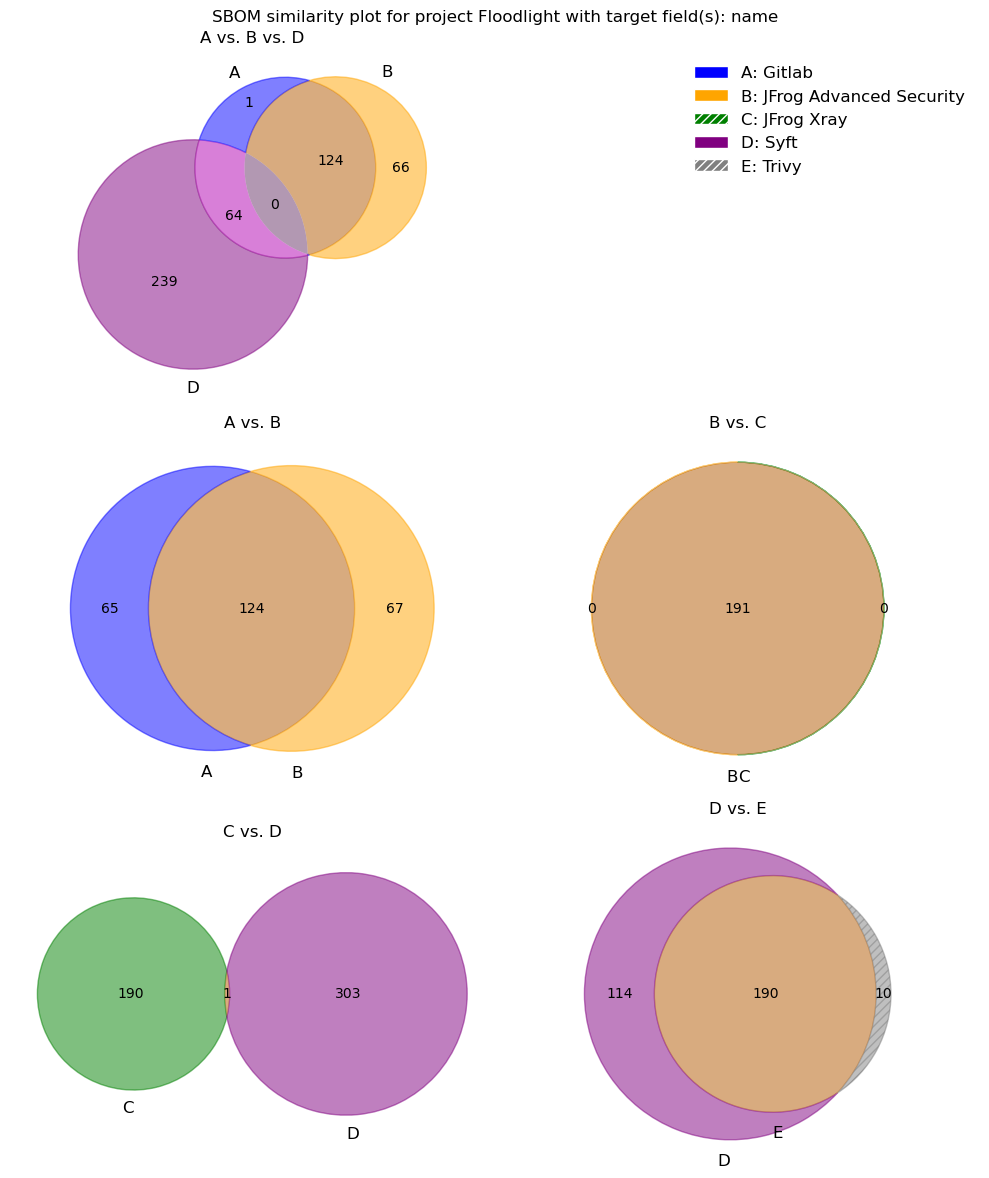

Project: Generator_2


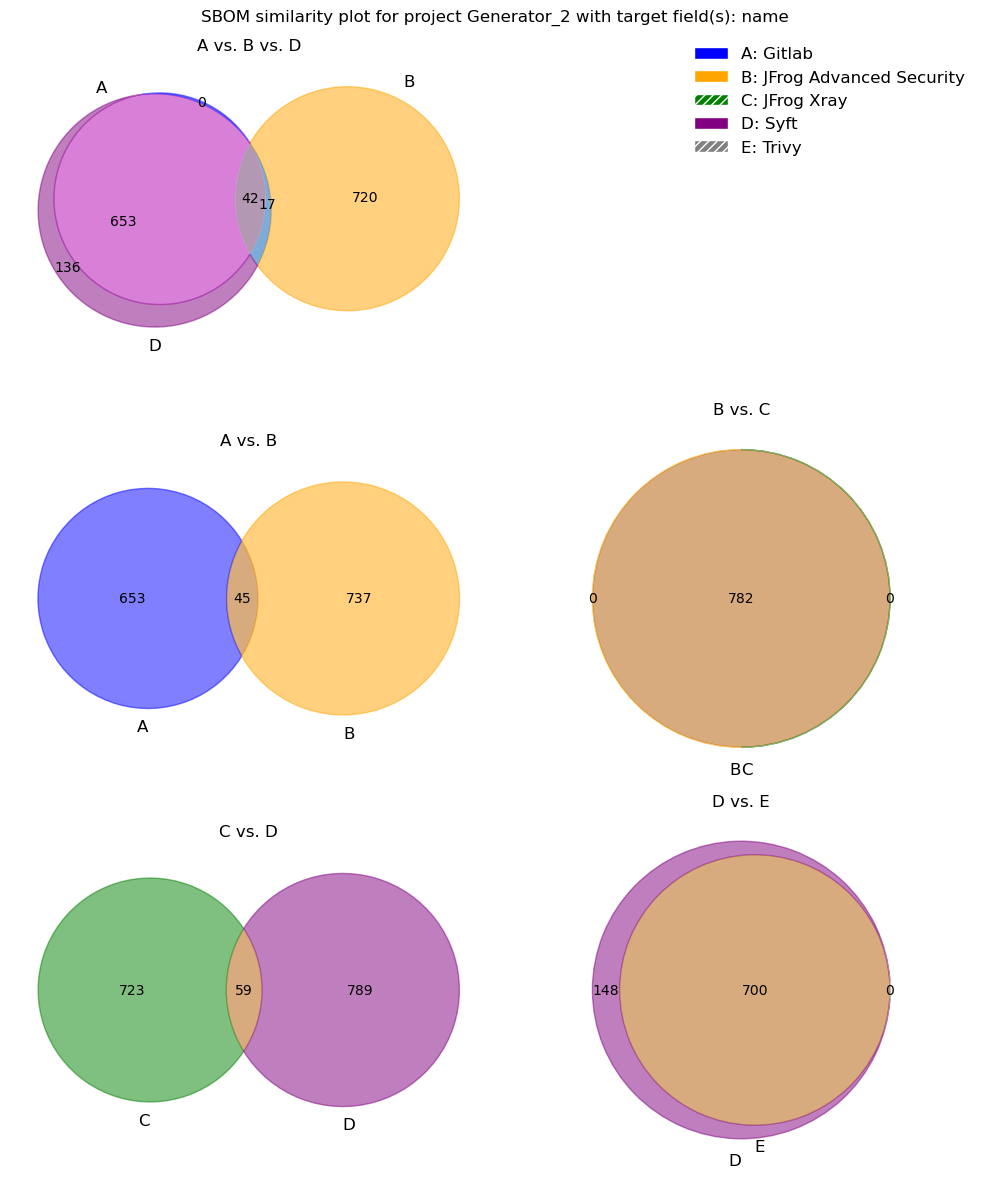

Project: iEdgeMicroService


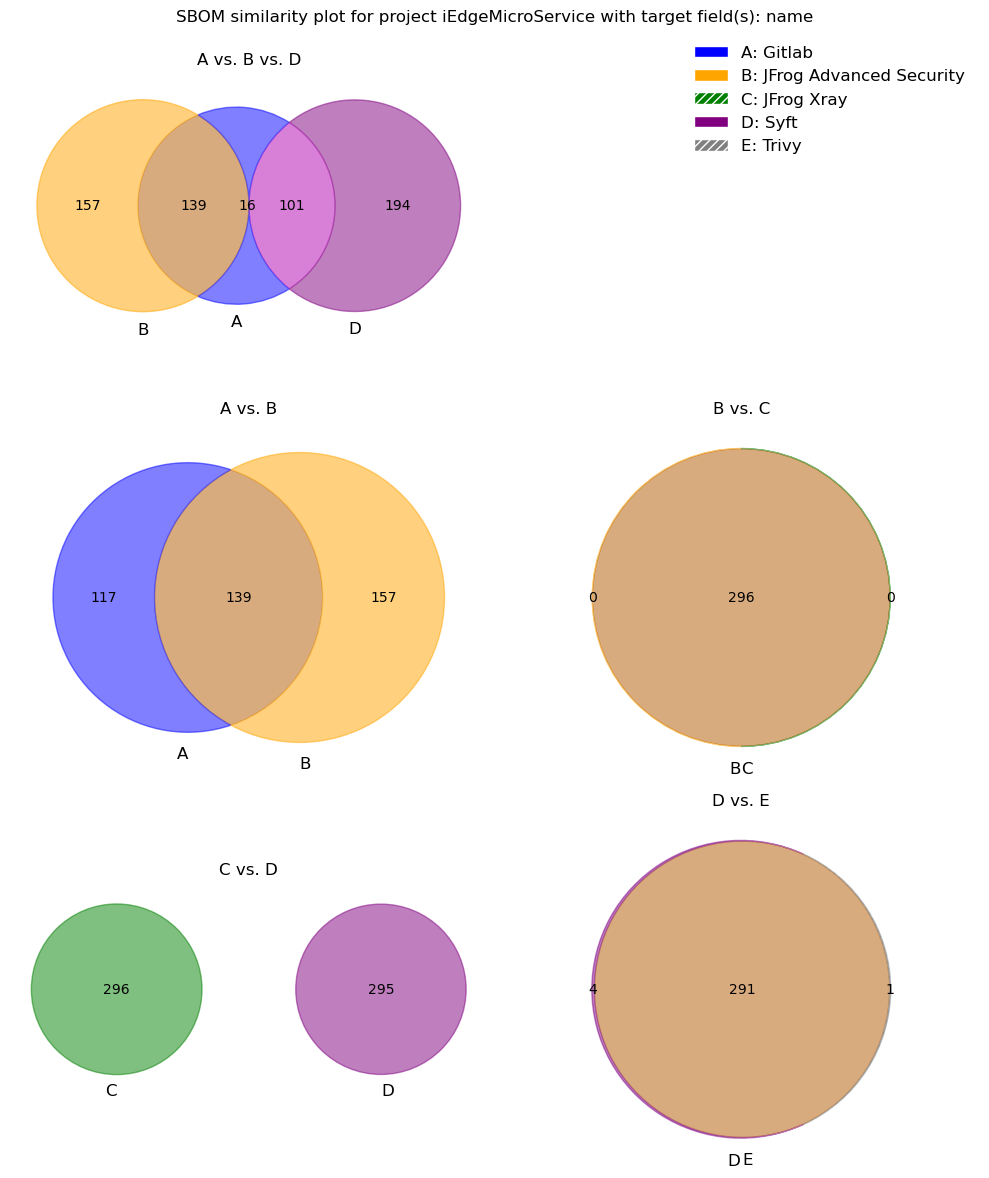

Project: Juice_Shop


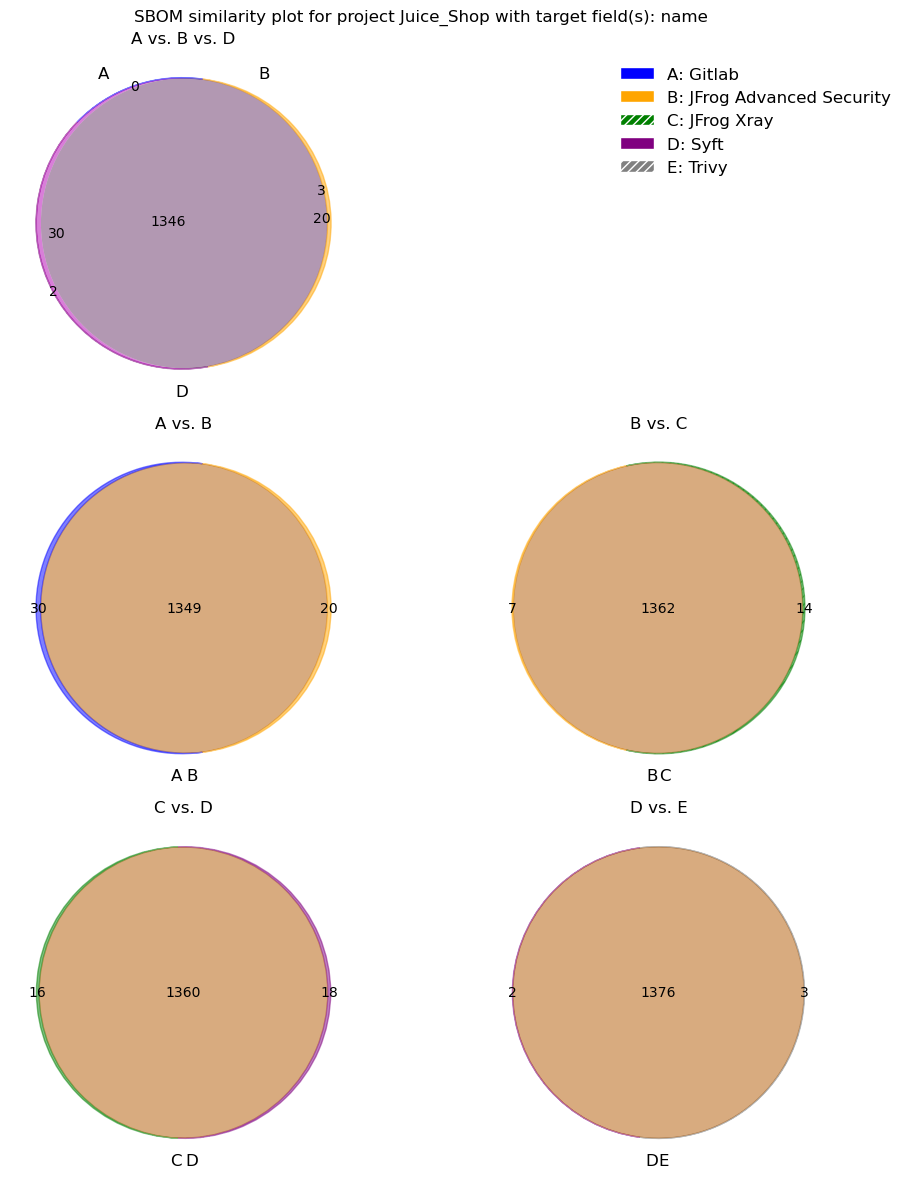

Project: NMP


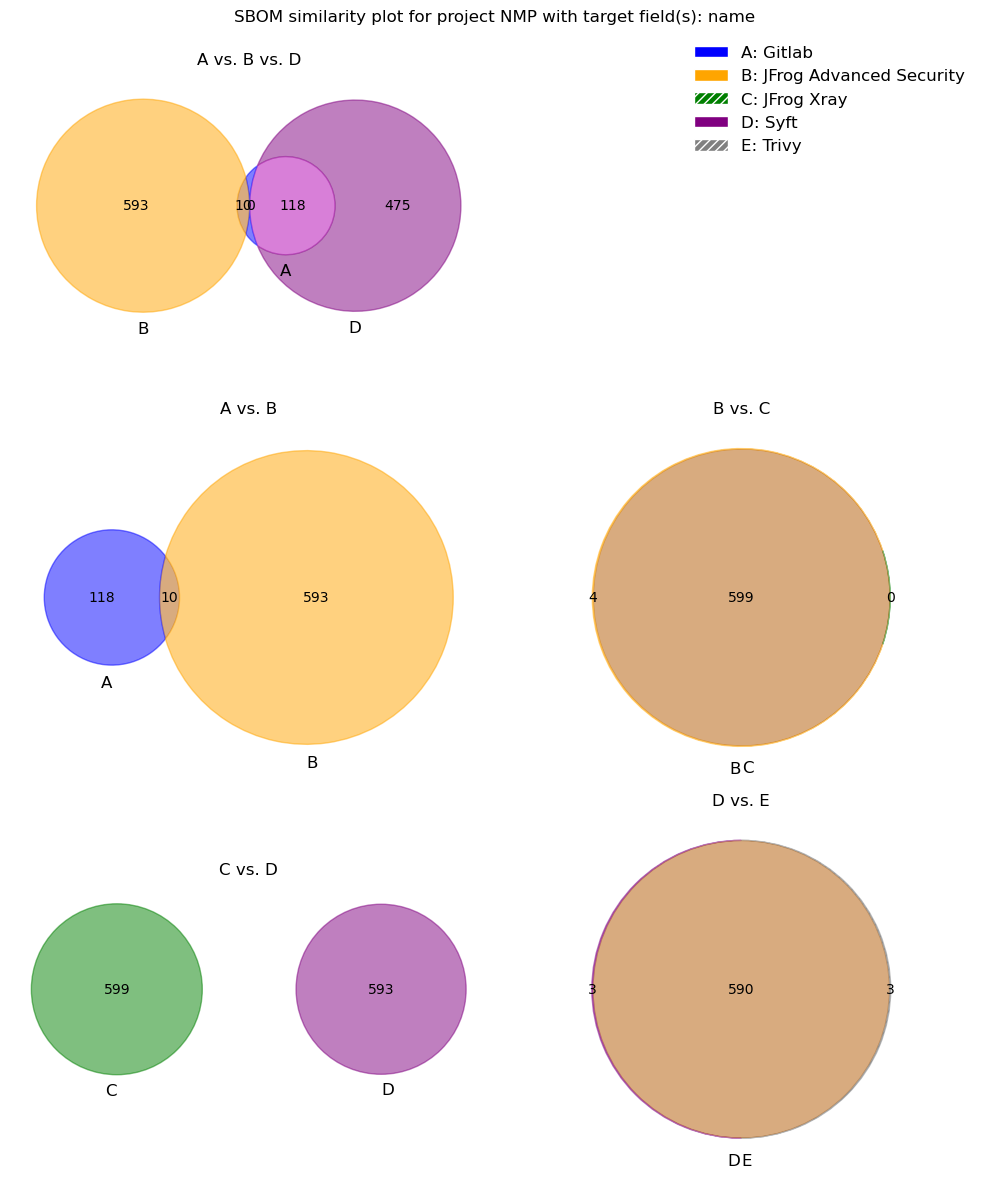

Project: pm-dashboard-frontend


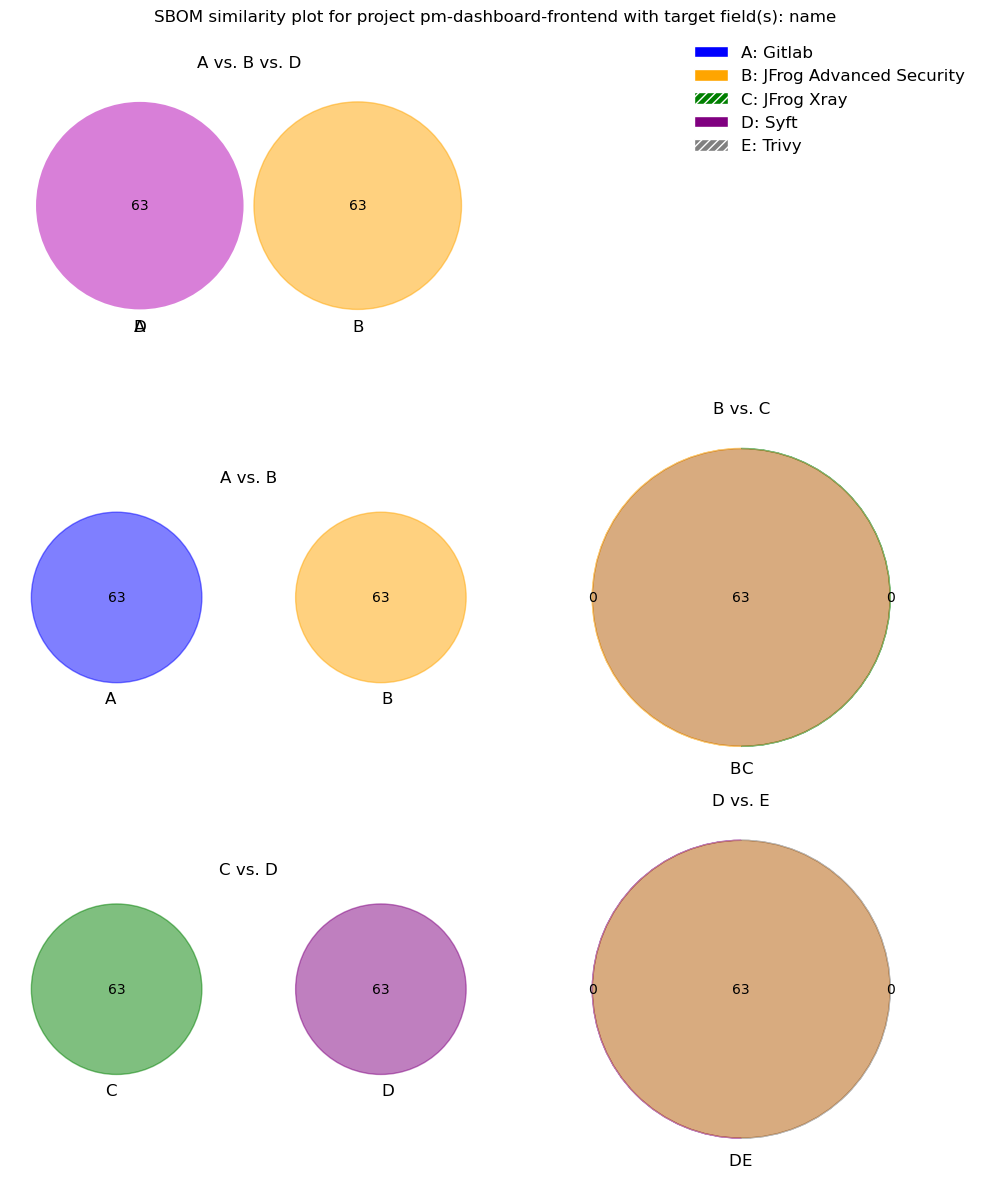

Project: pm-lst-kpi-module


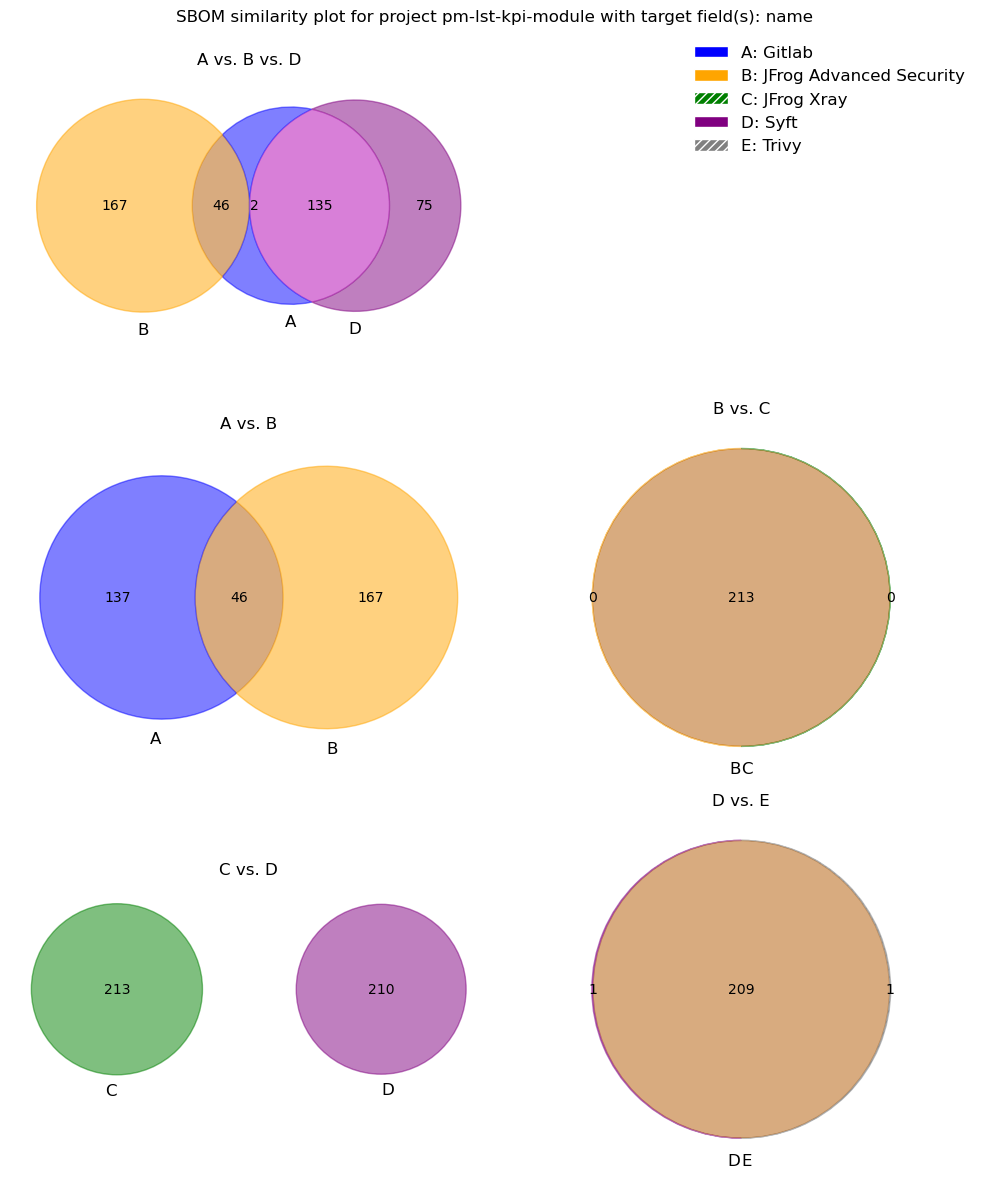

Project: pm-mongo


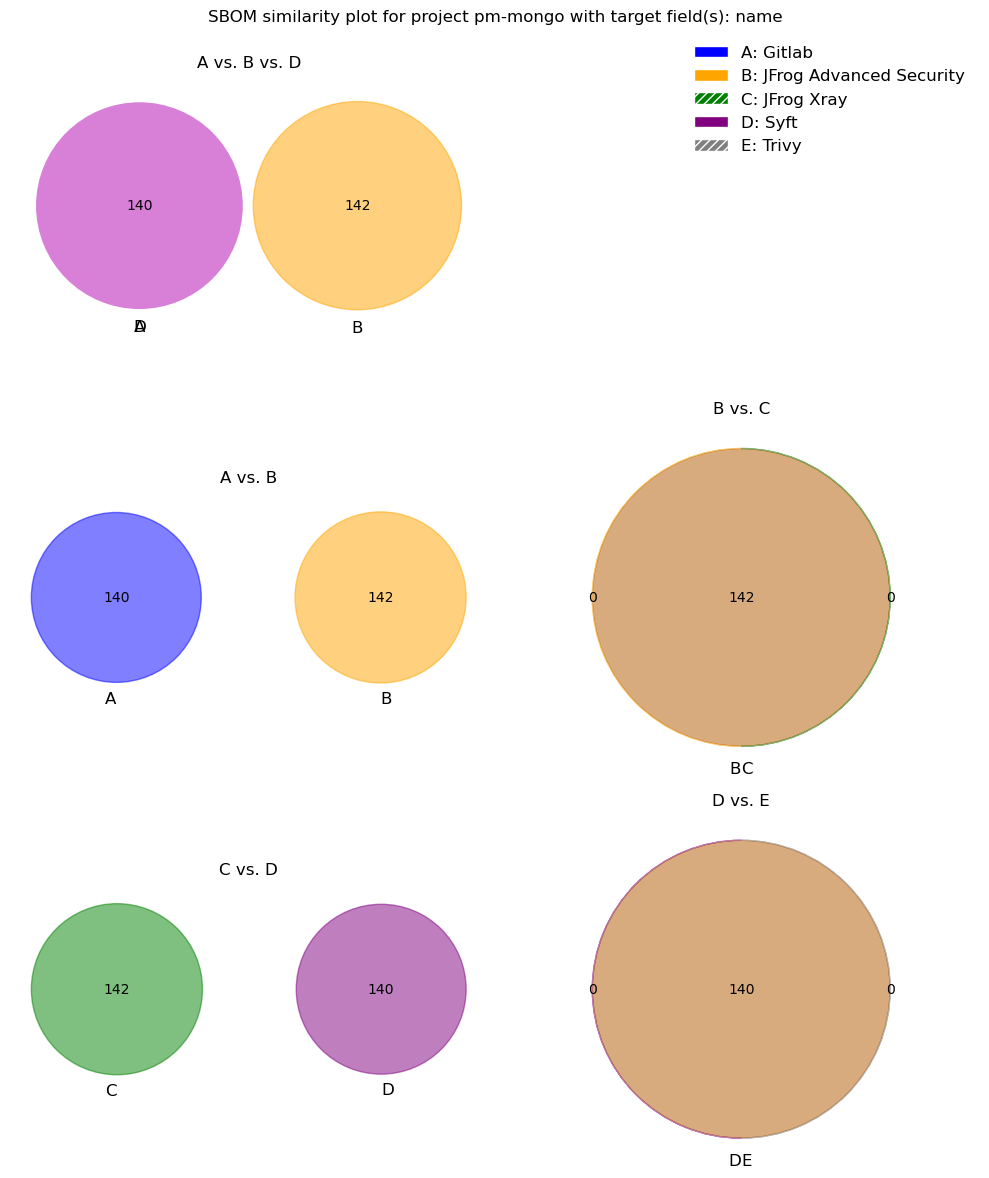

Project: RDCS_RDCP-Client


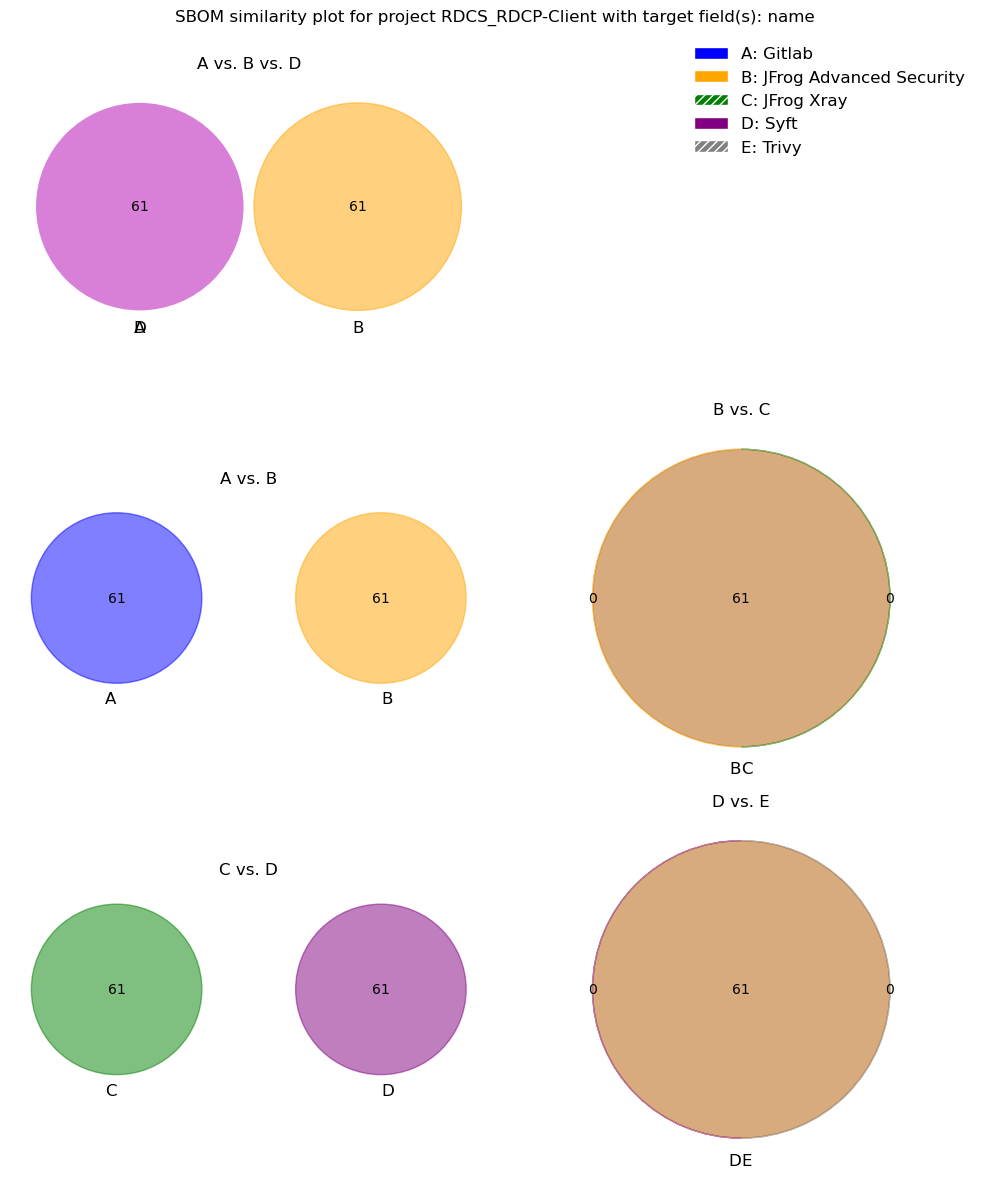

Project: RT-Cosmo


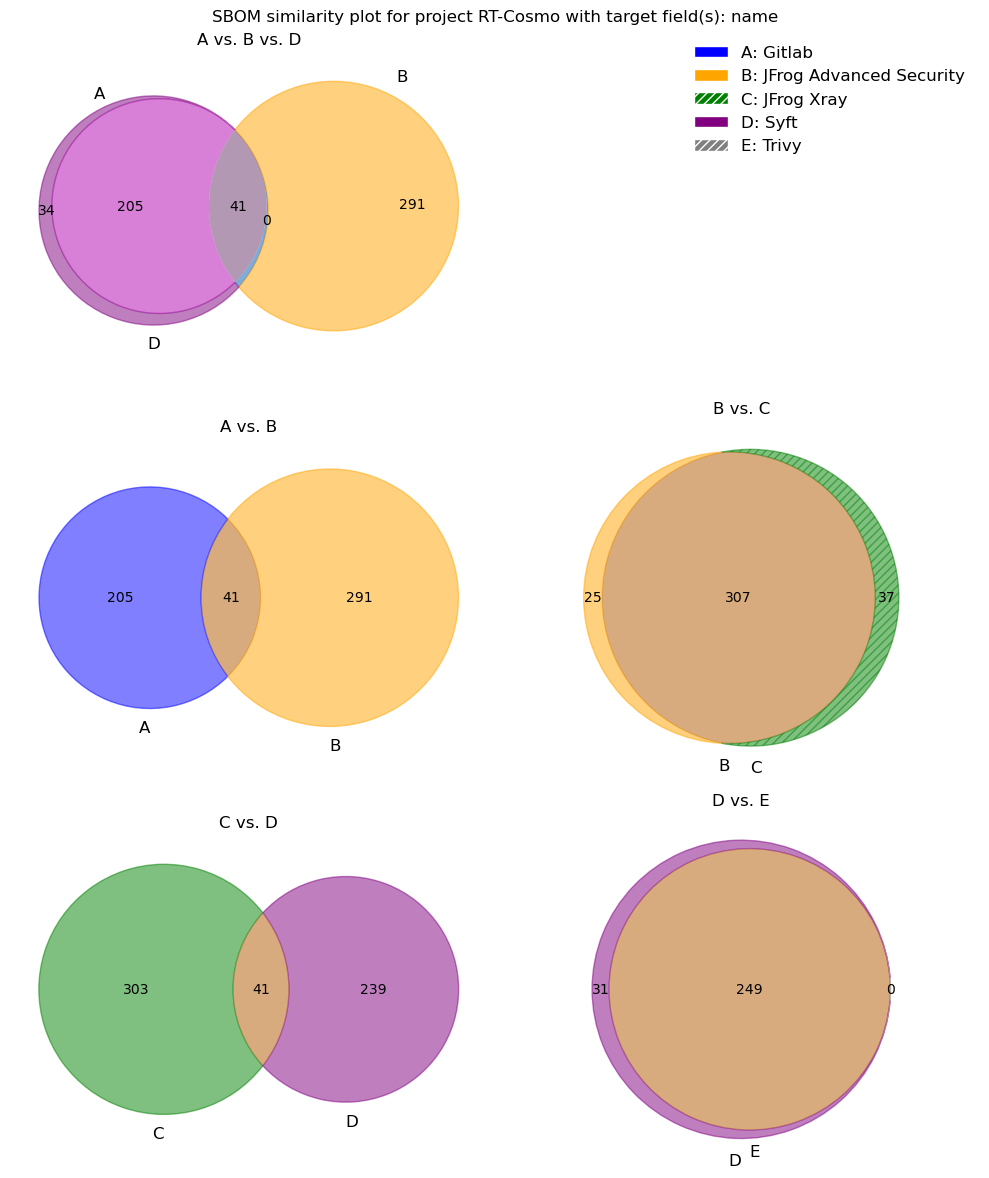

Project: vul_flask_app


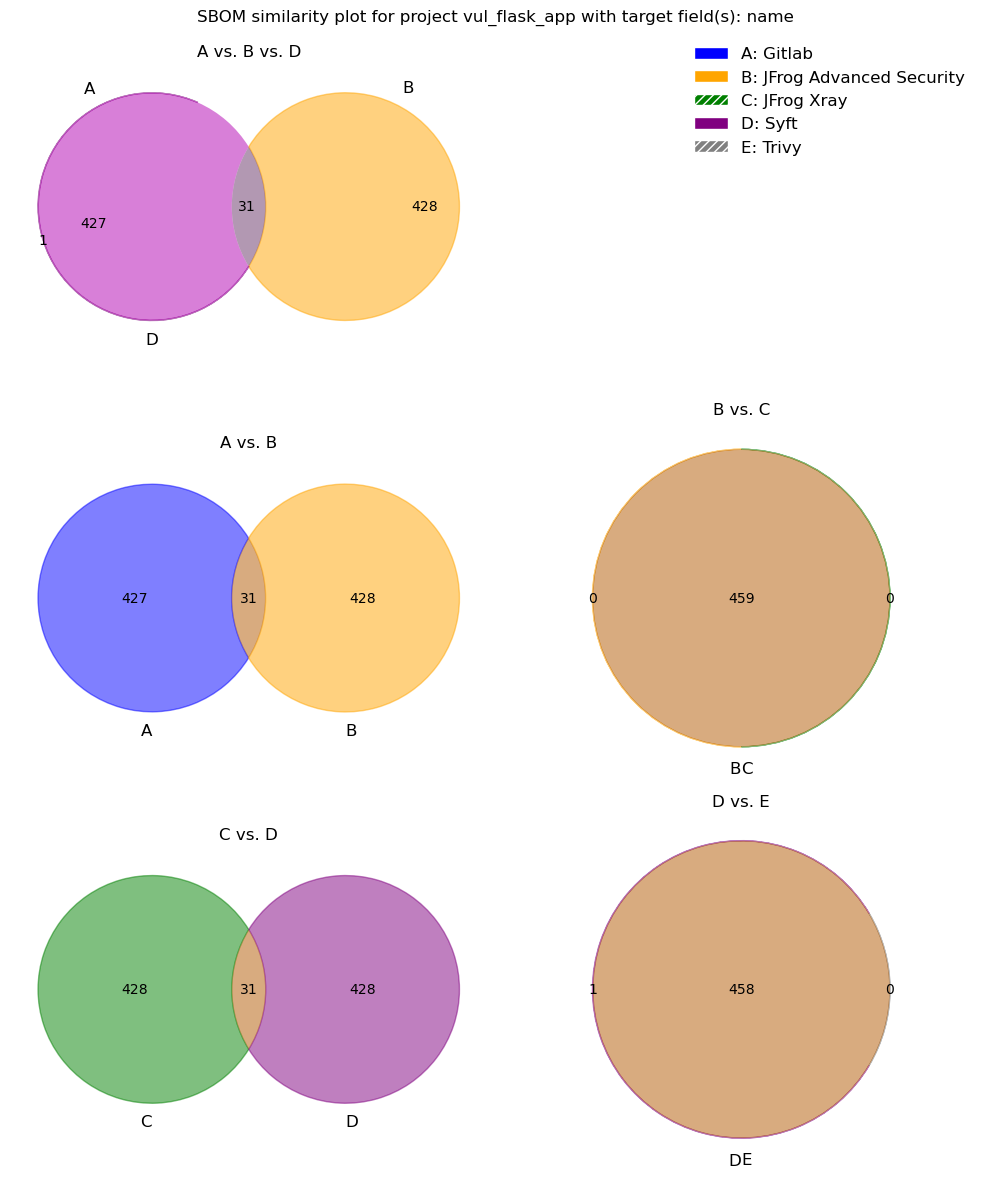

Project: Vulnerable_Flask_App


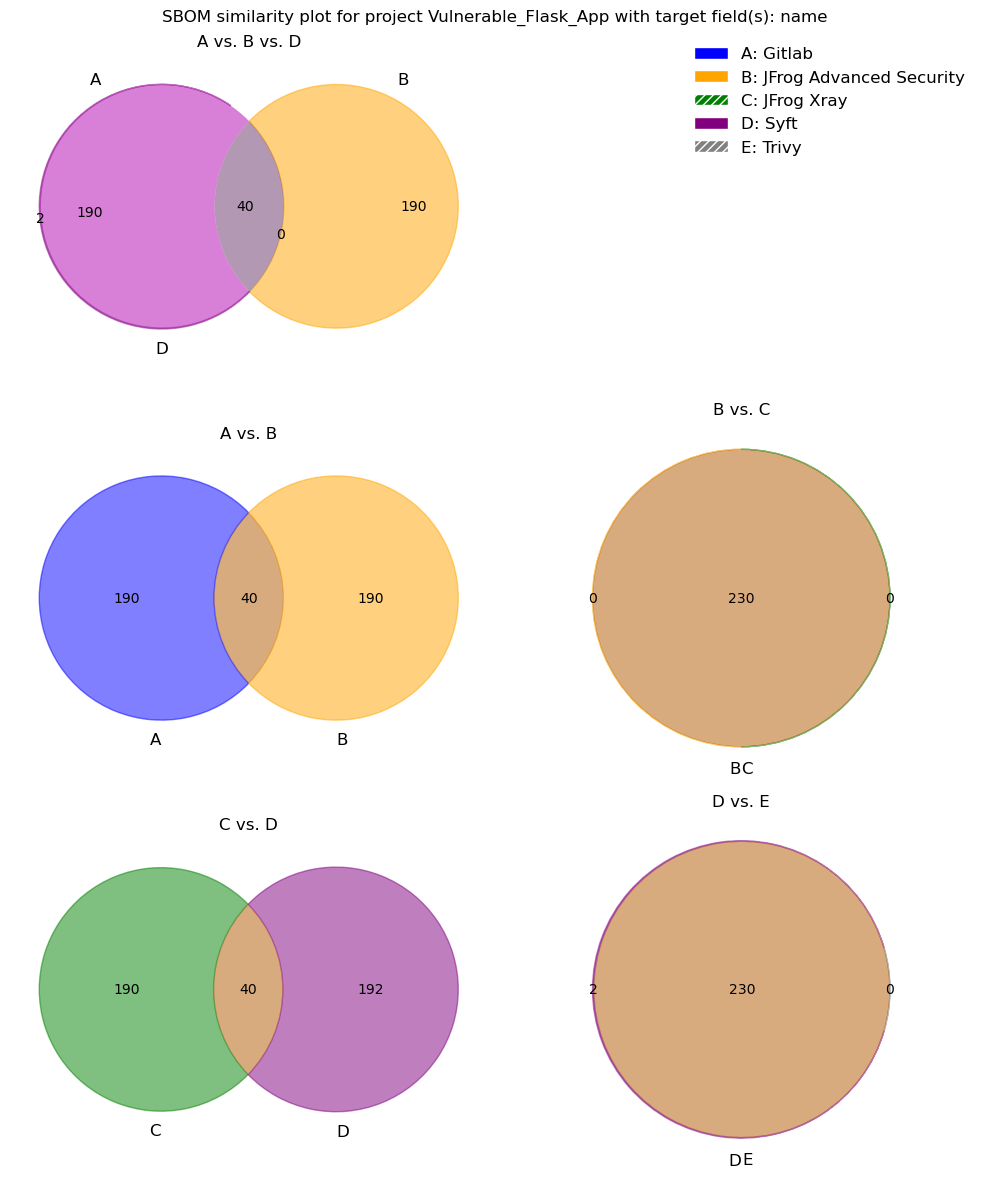

Project: WebGoat


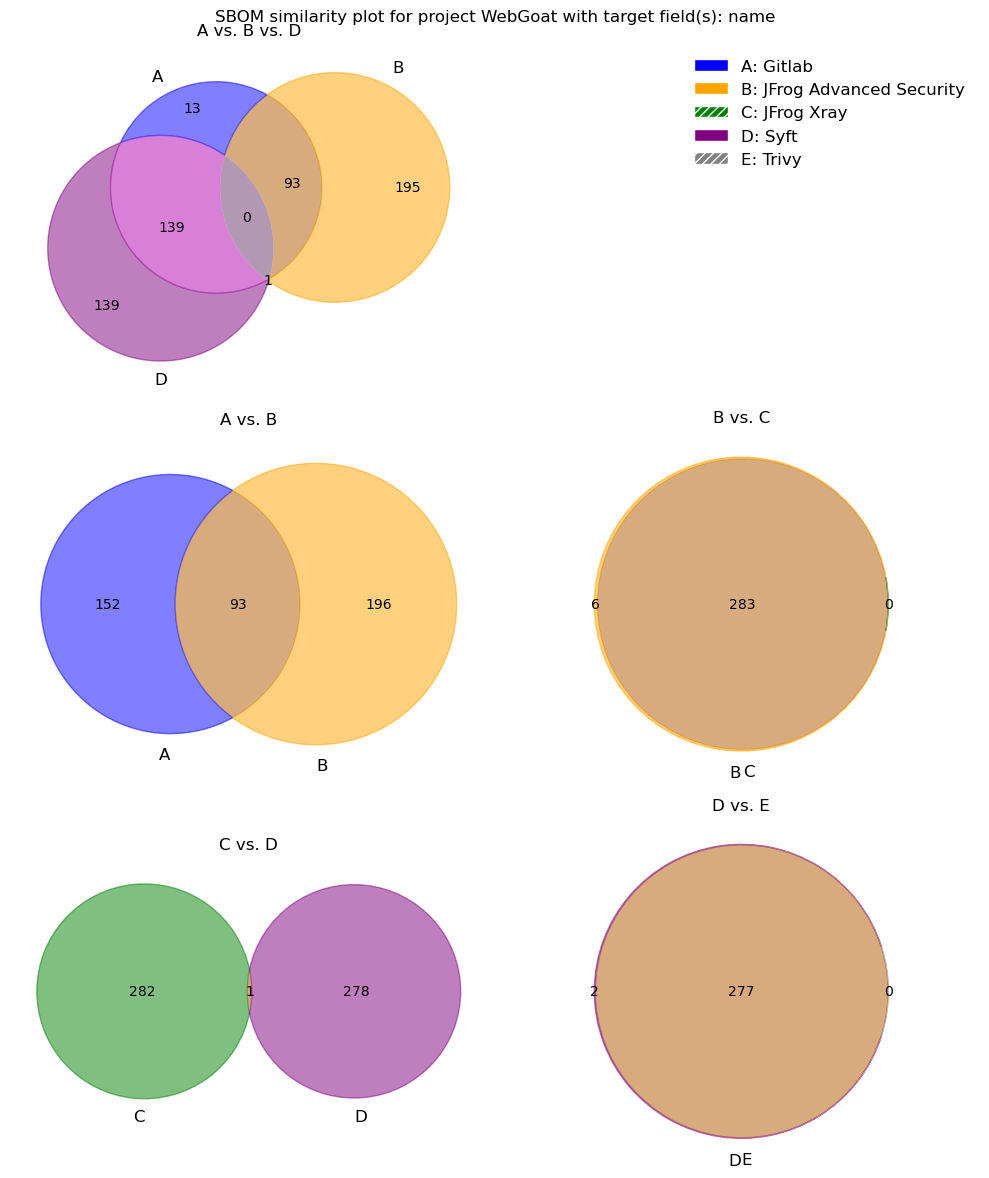

In [4]:
# define project name and target field 
target_field = 'name'

for project_name, project_version in in_scope:

    print(f"Project: {project_name}")
    
    # get project data in data frame
    project_scanner_data = dt_instance.collect_all_scanner_data(project_name, project_version)

    # visualize project scanner data
    target_output_file = f"SBOM_comparison_{project_name}_{target_field}"
    create_SBOM_similarity_plot(project_name, target_field, project_scanner_data, target_output_file)

#### Debug SBOM comparison analysis

### SBOM comparison based on 'p_name' field

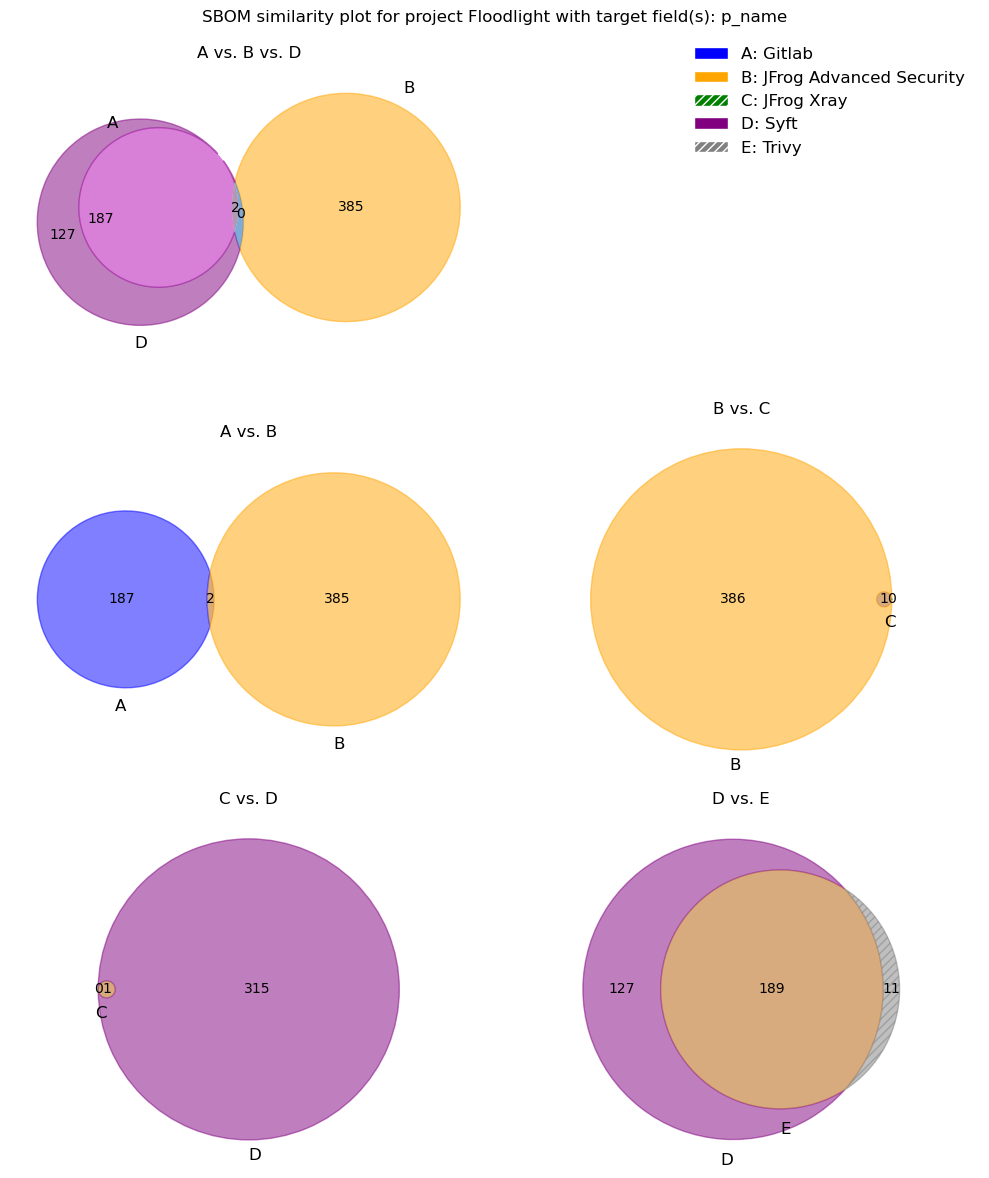

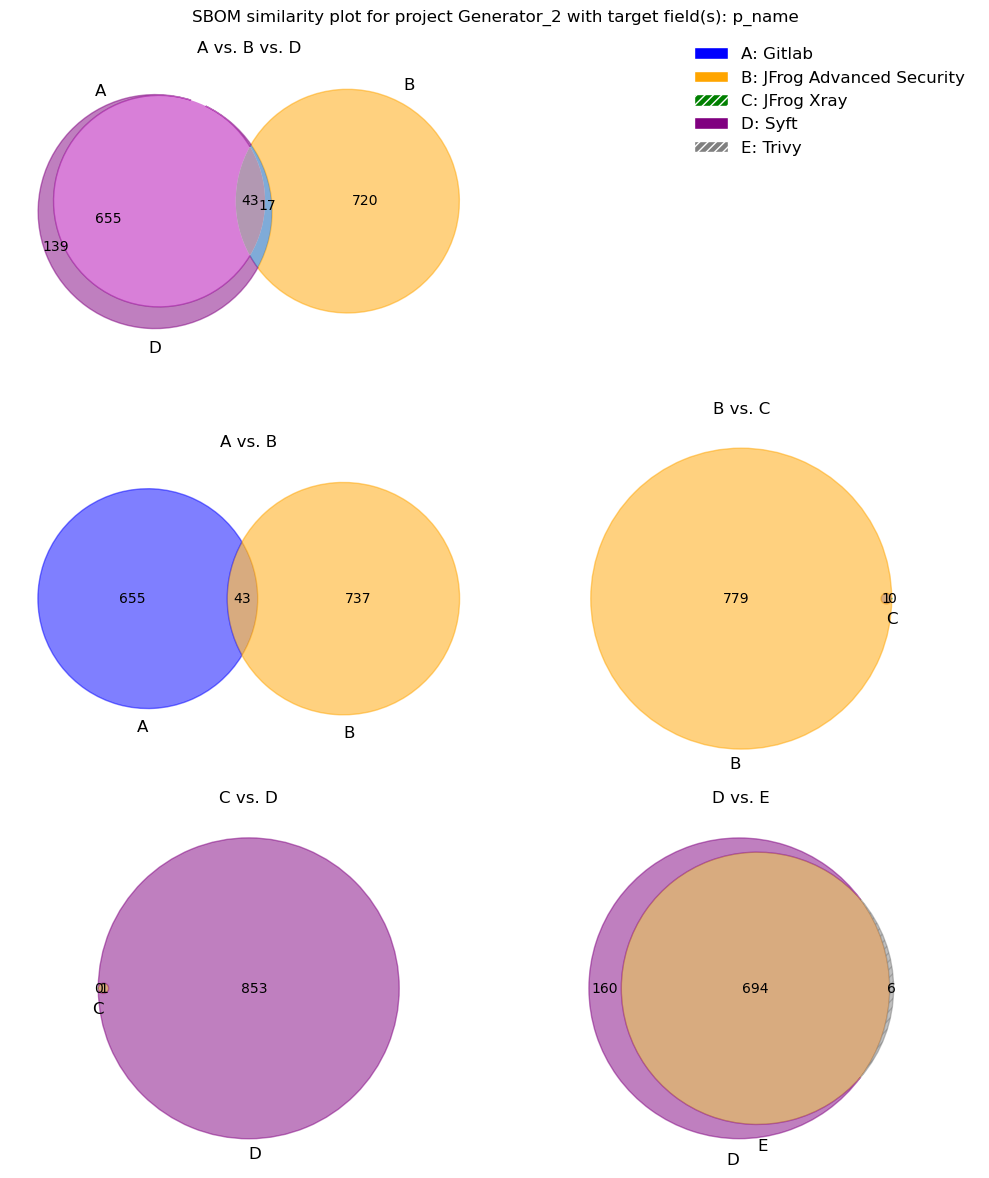

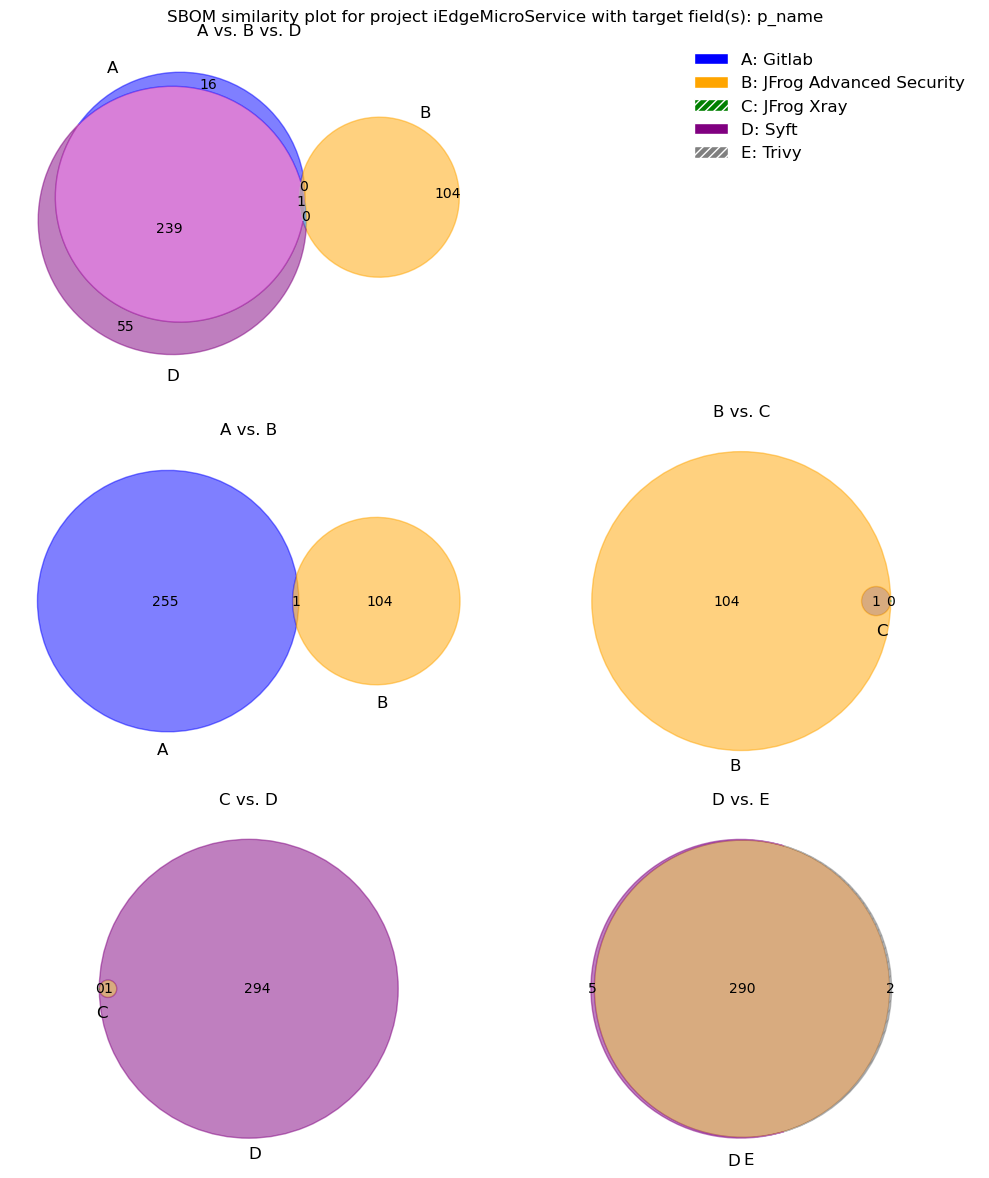

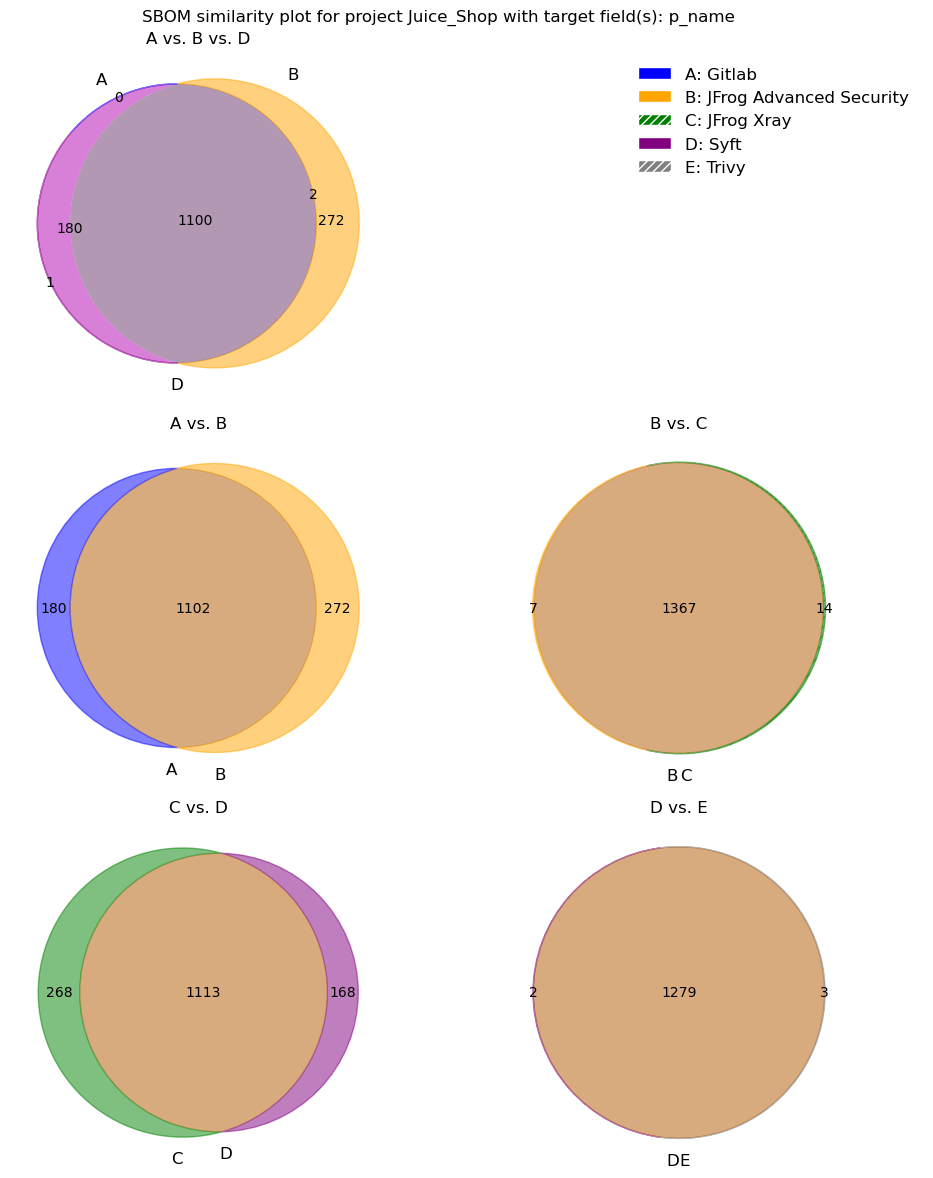

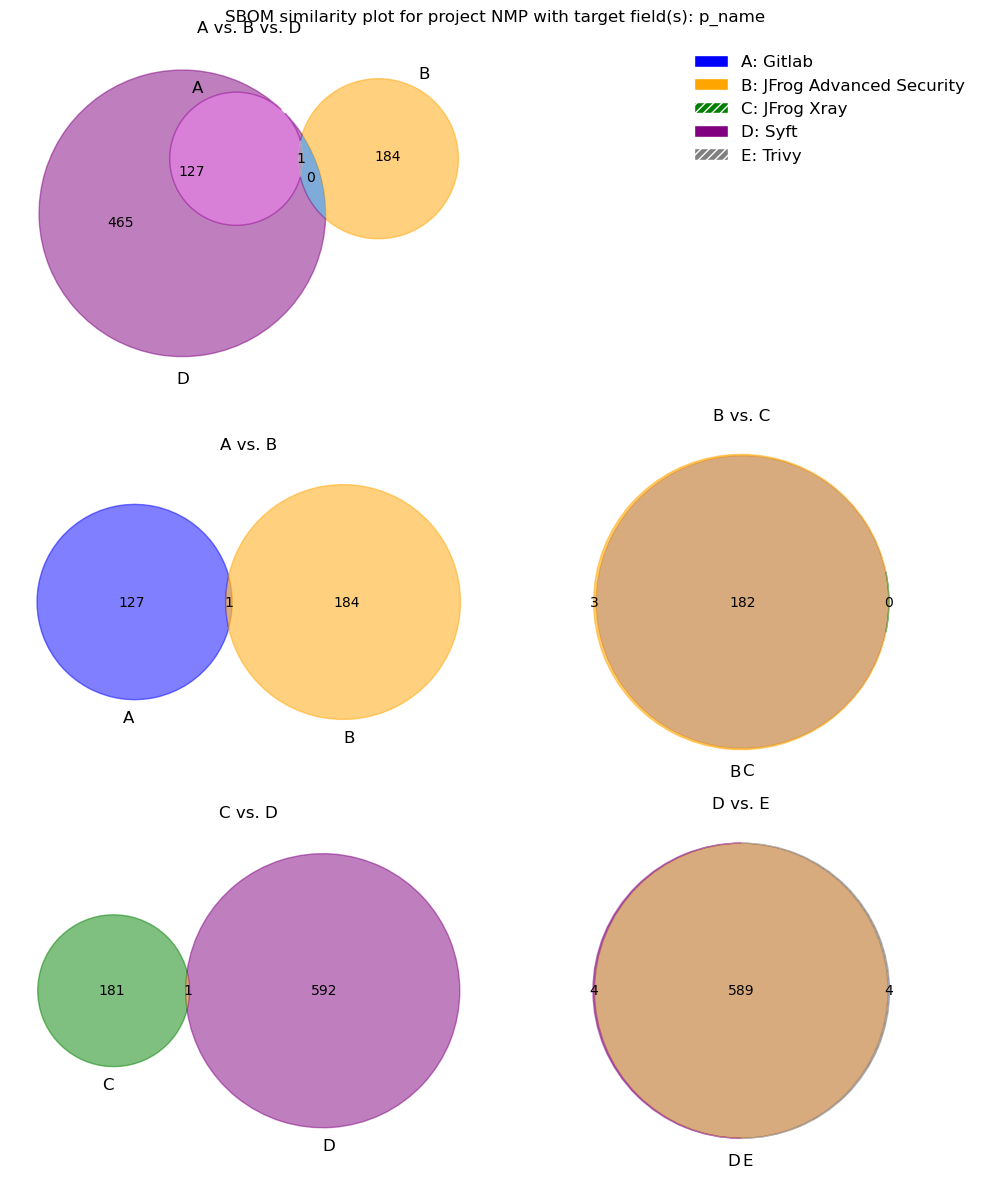

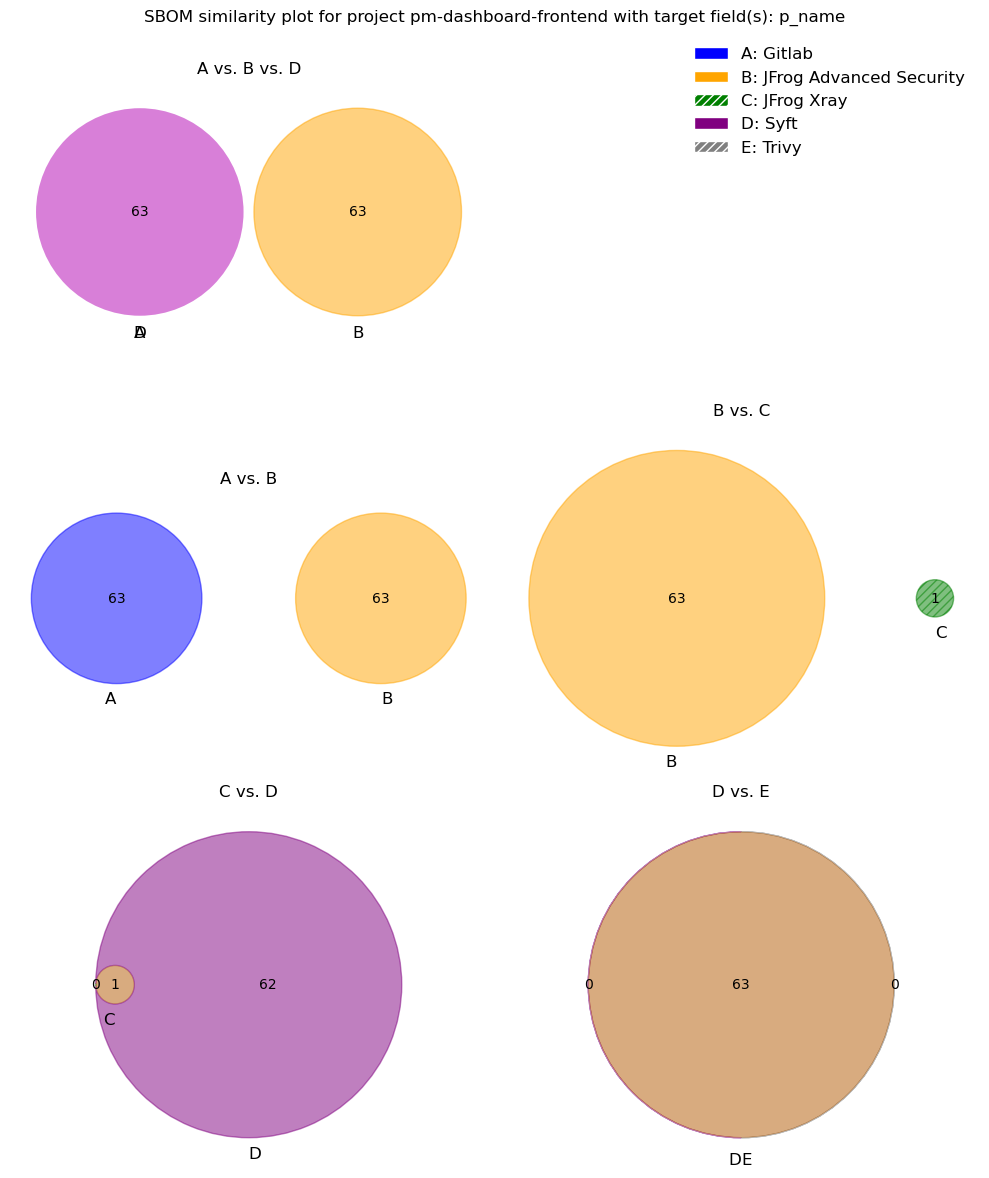

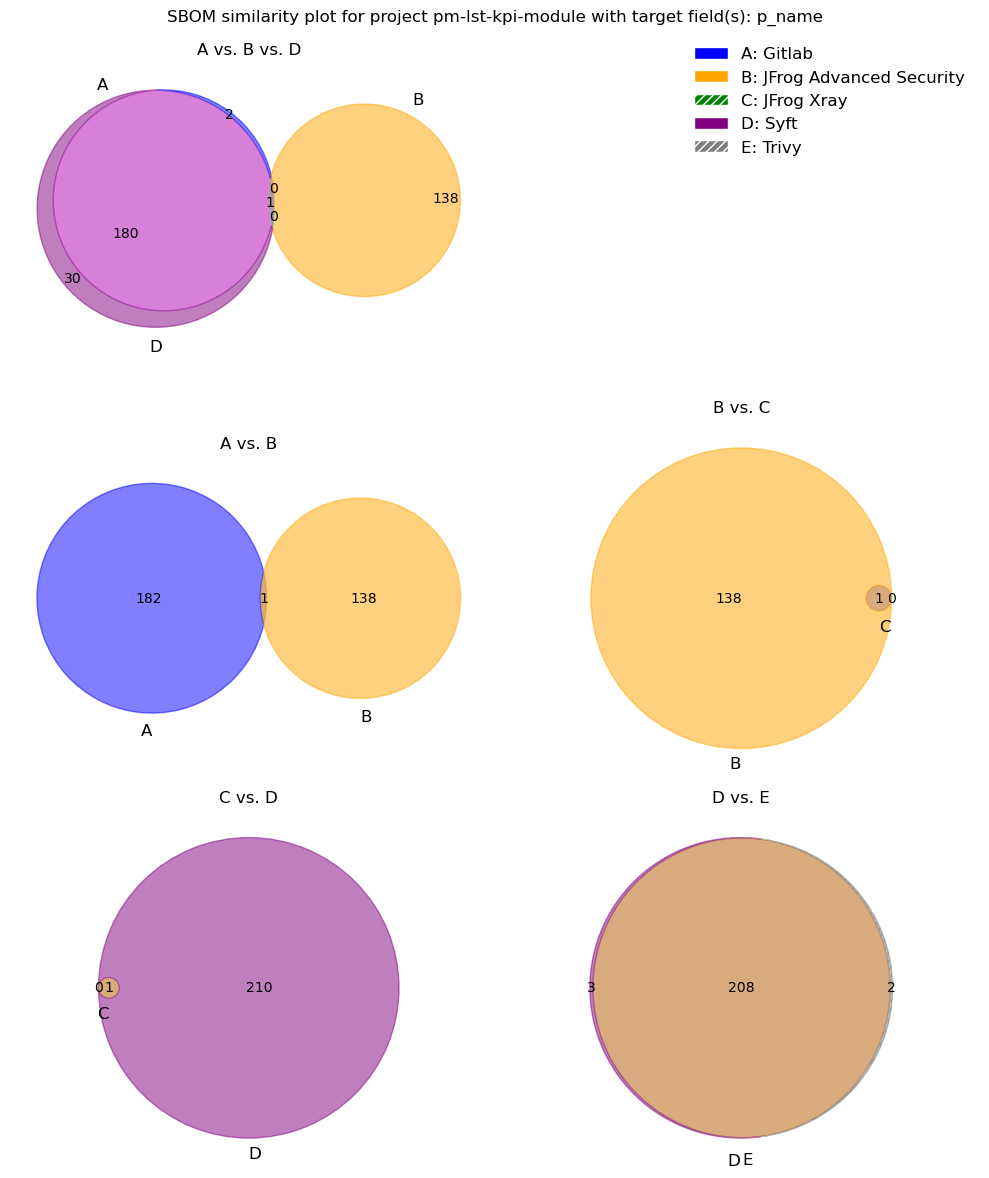

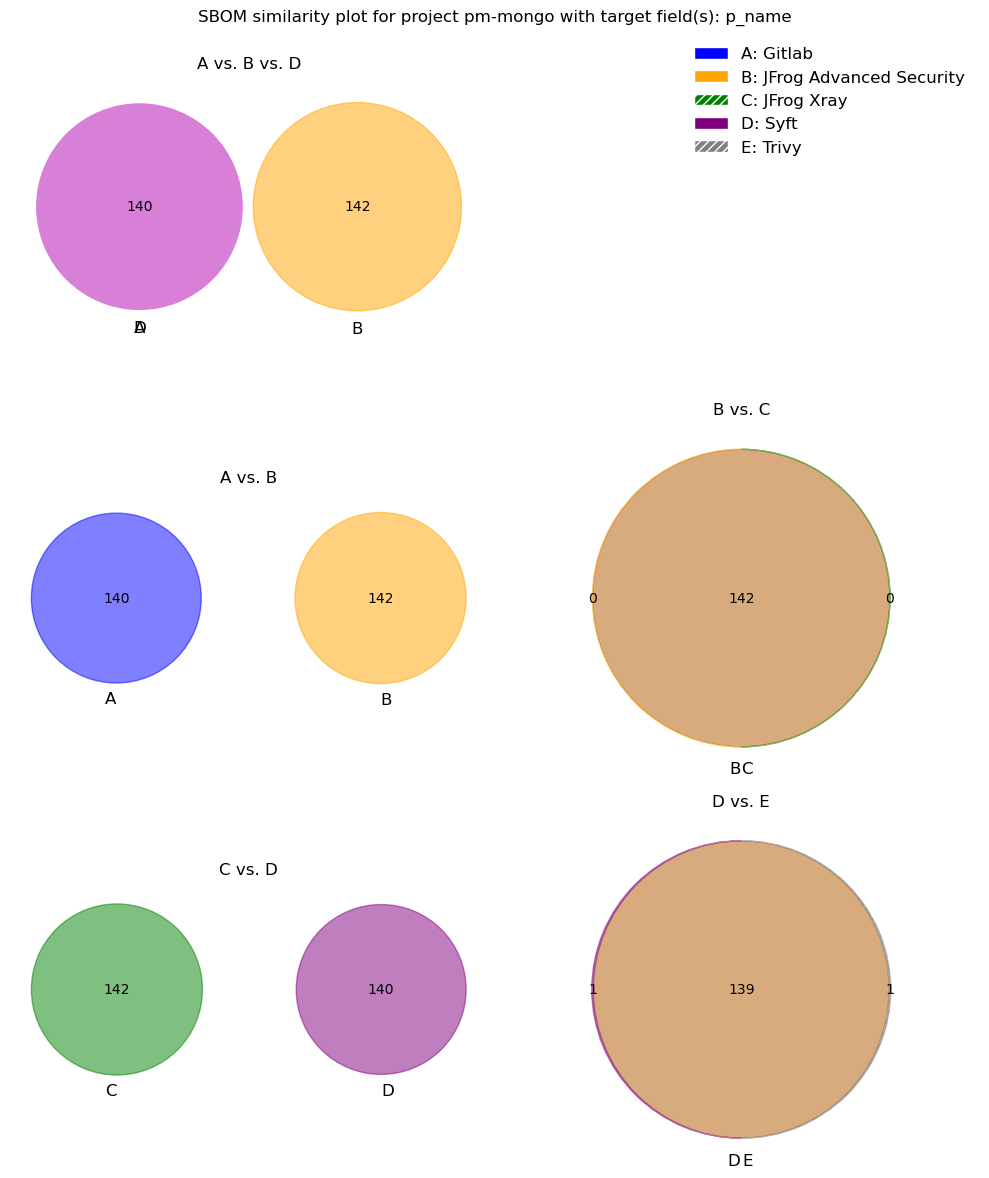

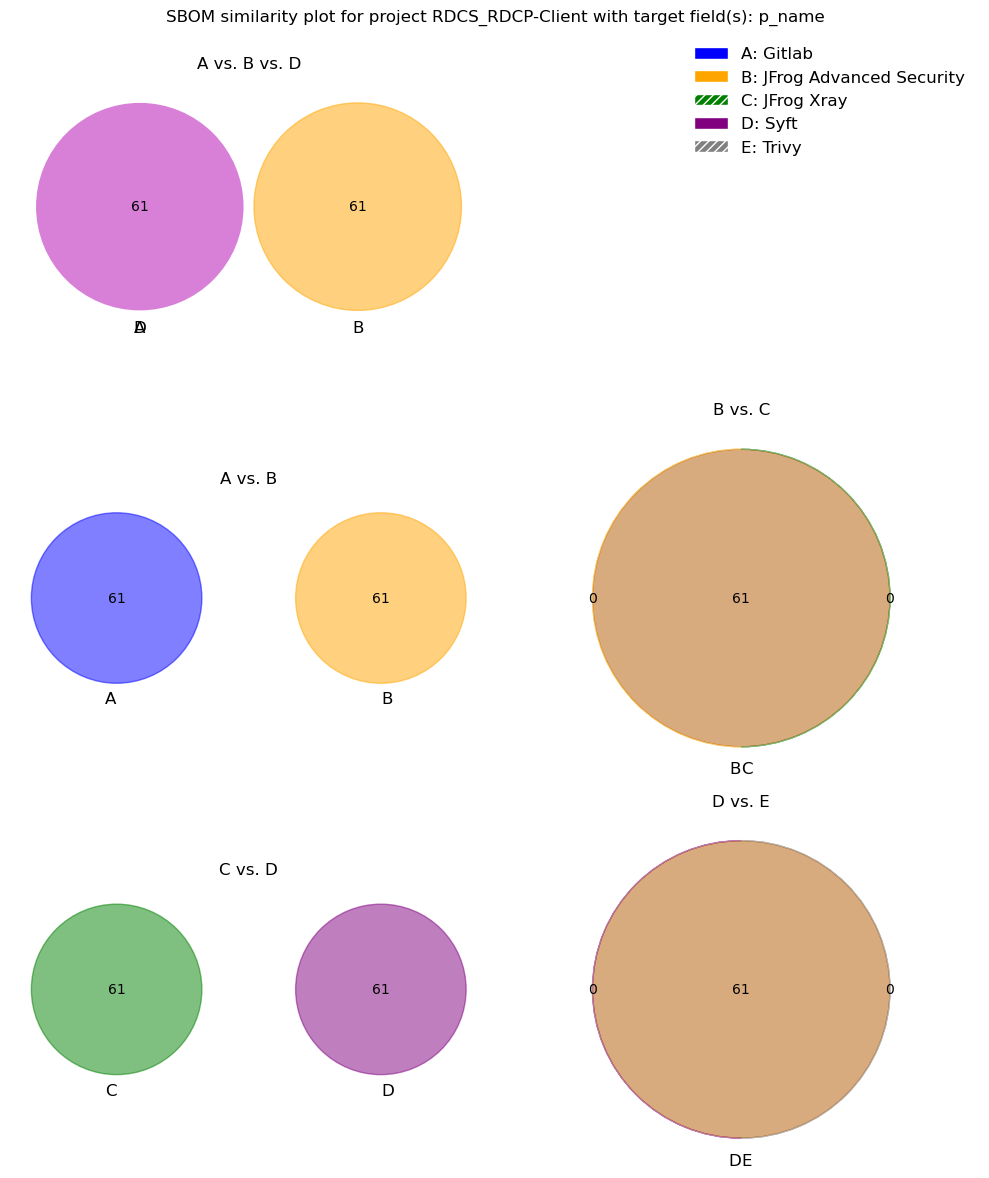

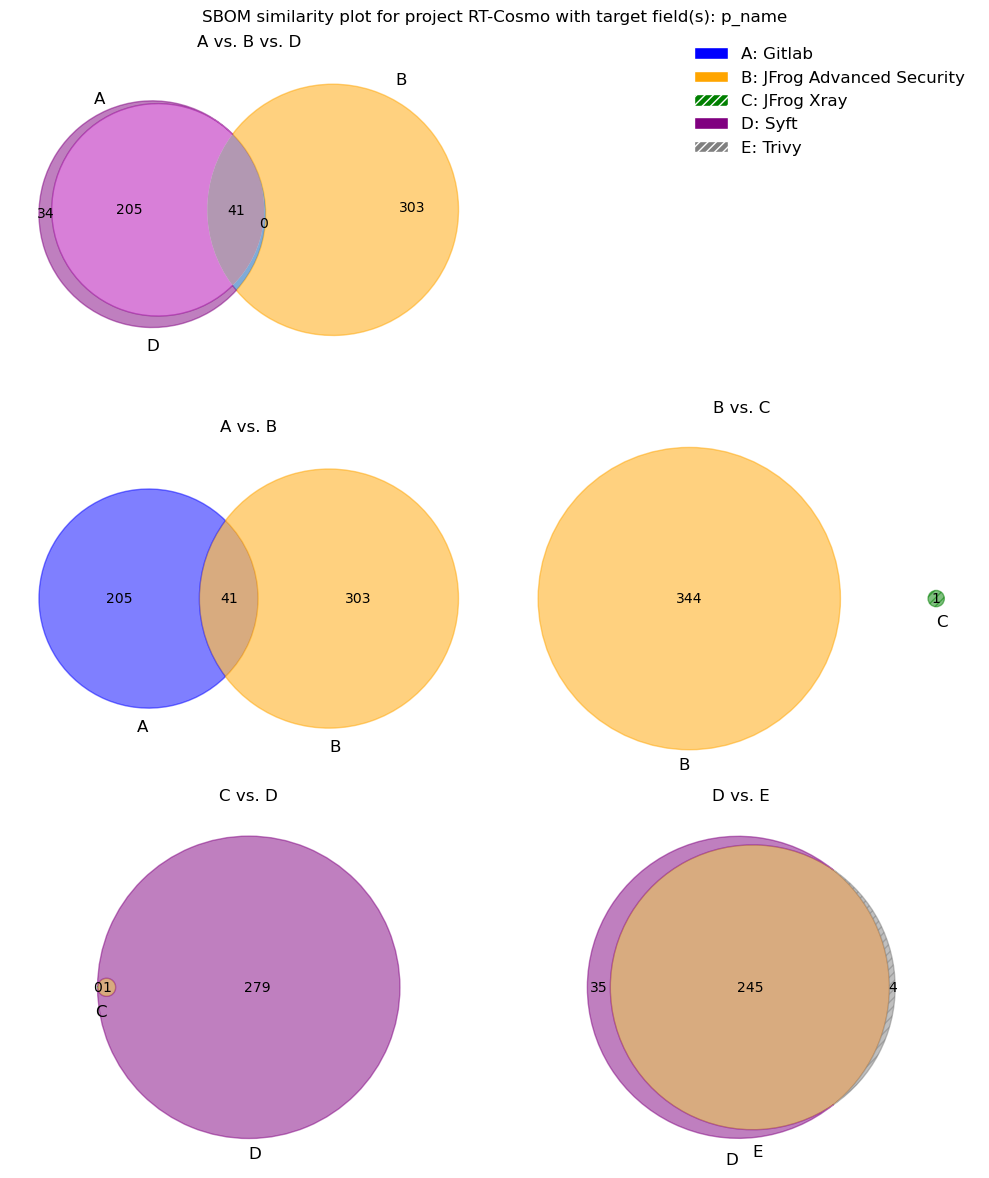

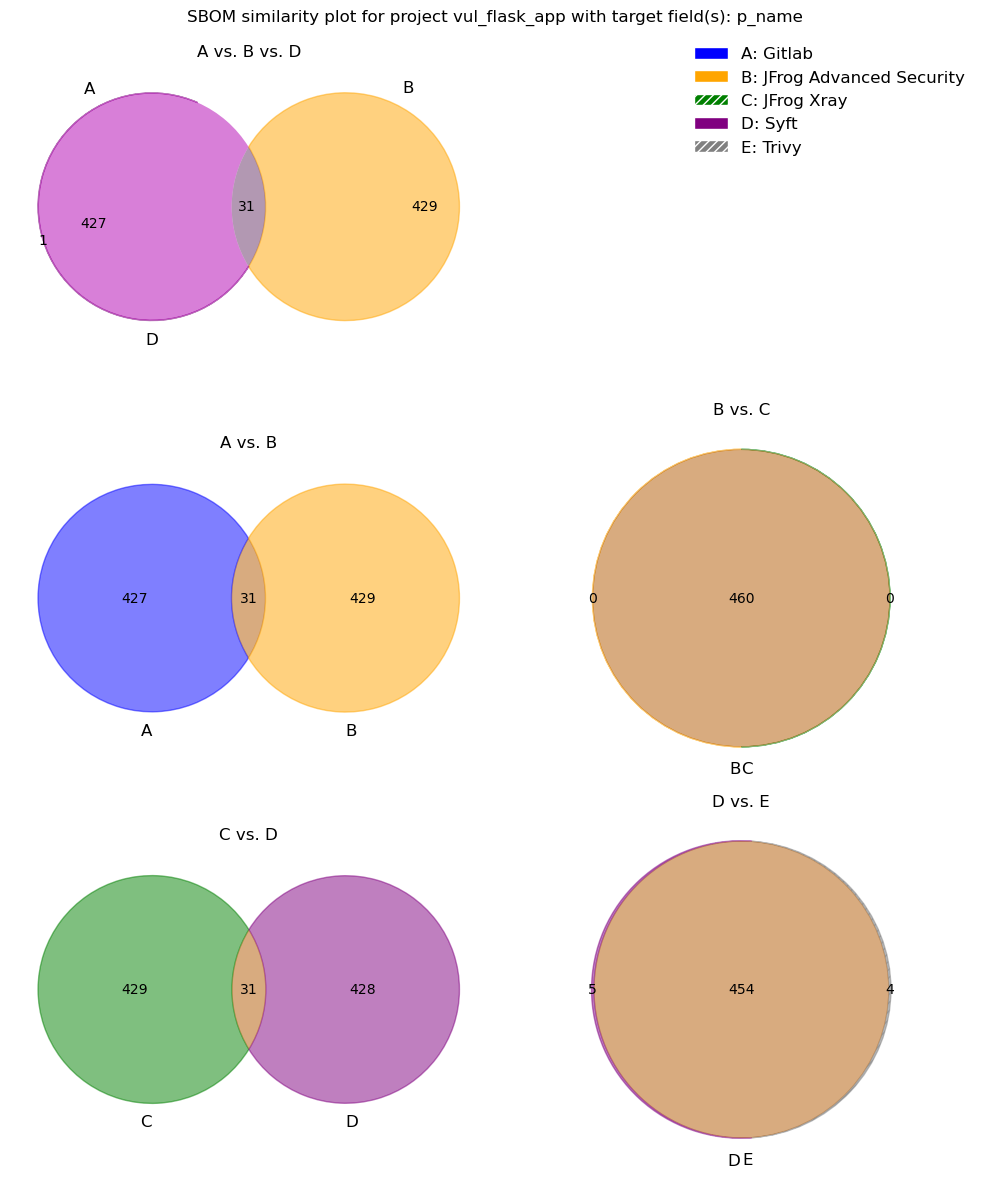

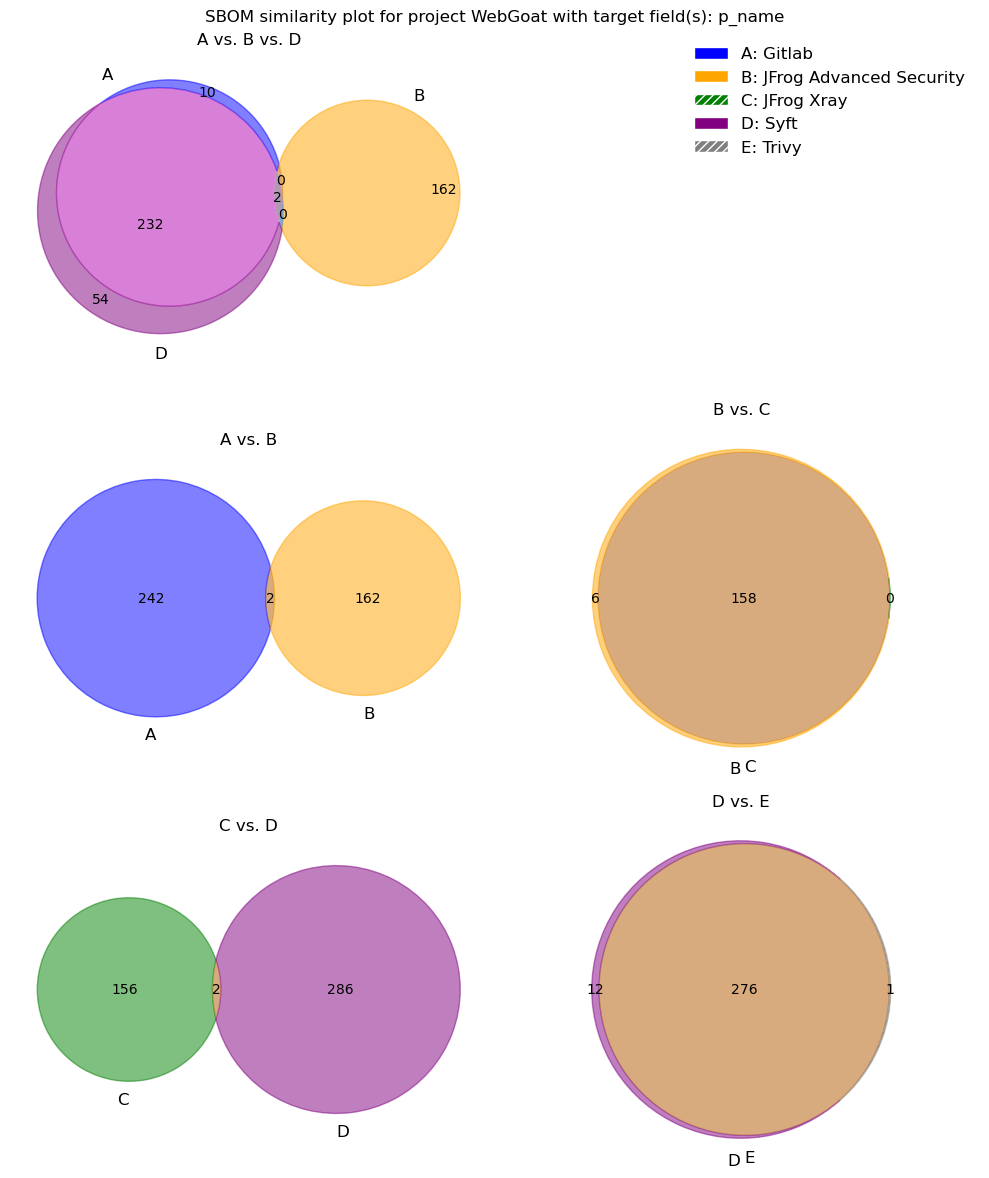

In [8]:
# define project name and target field 
target_field = 'p_name'

for project_name in in_scope:
    # get project data in data frame
    project_scanner_data = dt_instance.collect_all_scanner_data(project_name)

    # visualize project scanner data
    target_output_file = f"SBOM_comparison_{project_name}_{target_field}"
    create_SBOM_similarity_plot(project_name, target_field, project_scanner_data, target_output_file)

### SBOM comparison based on 'name_proc1' field

function proc1 does a split(':') and takes the last part as new name (name_proc1)

Project: Floodlight


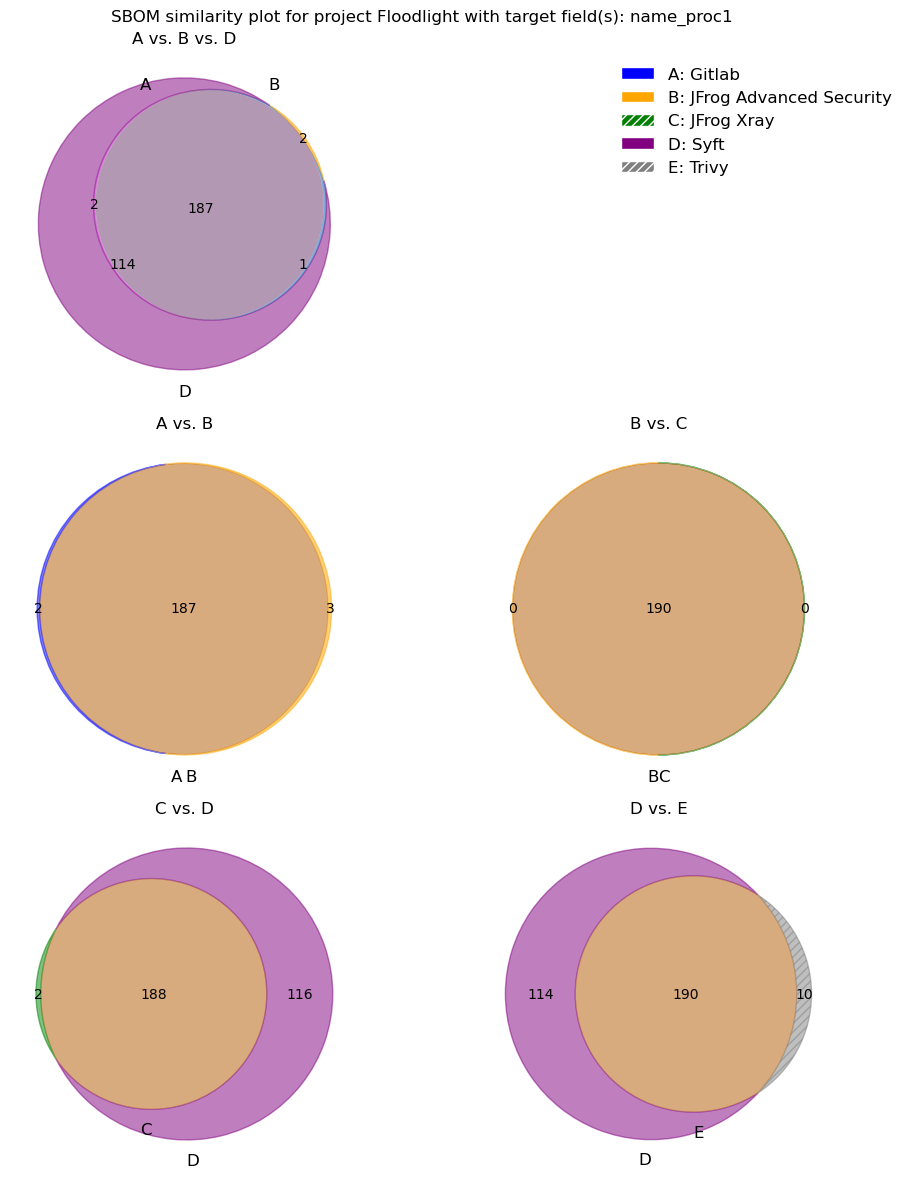

Project: Generator_2


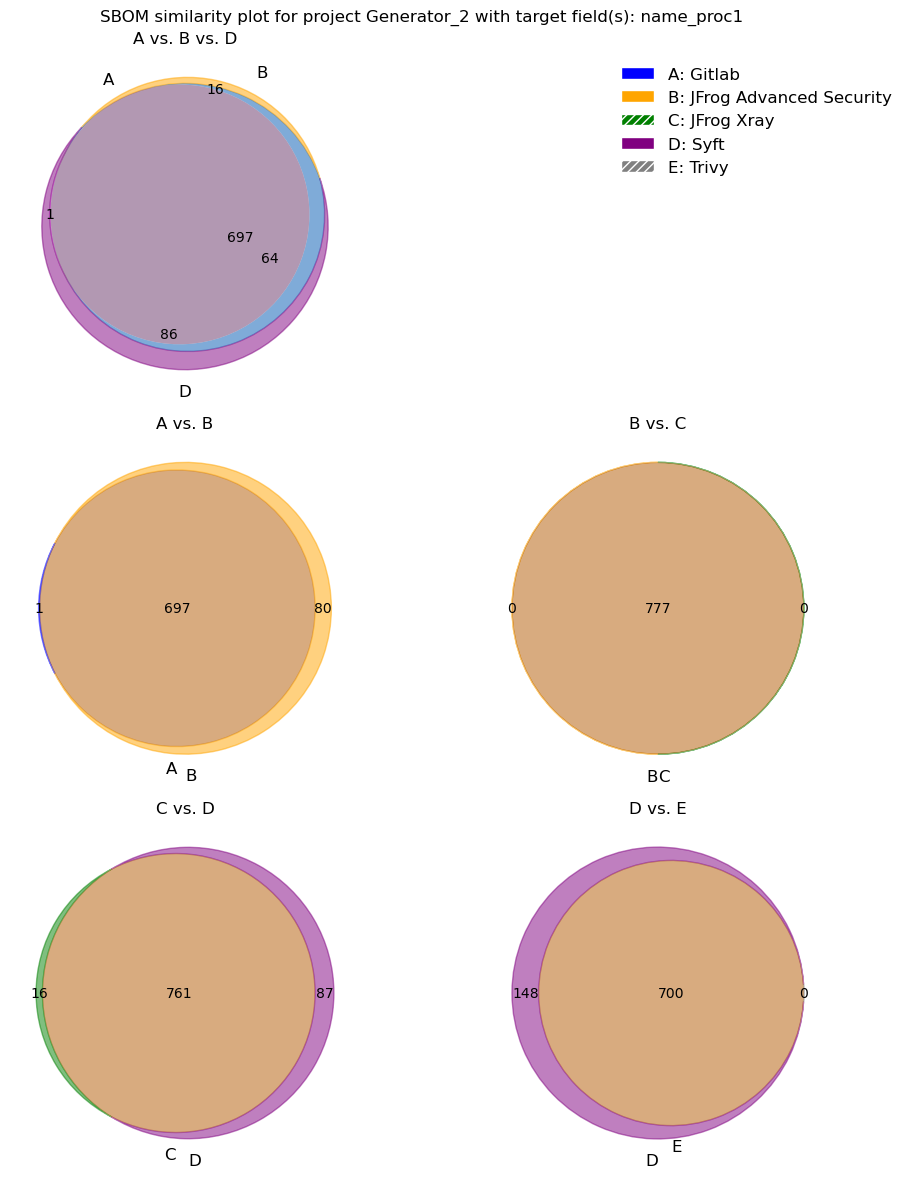

Project: iEdgeMicroService


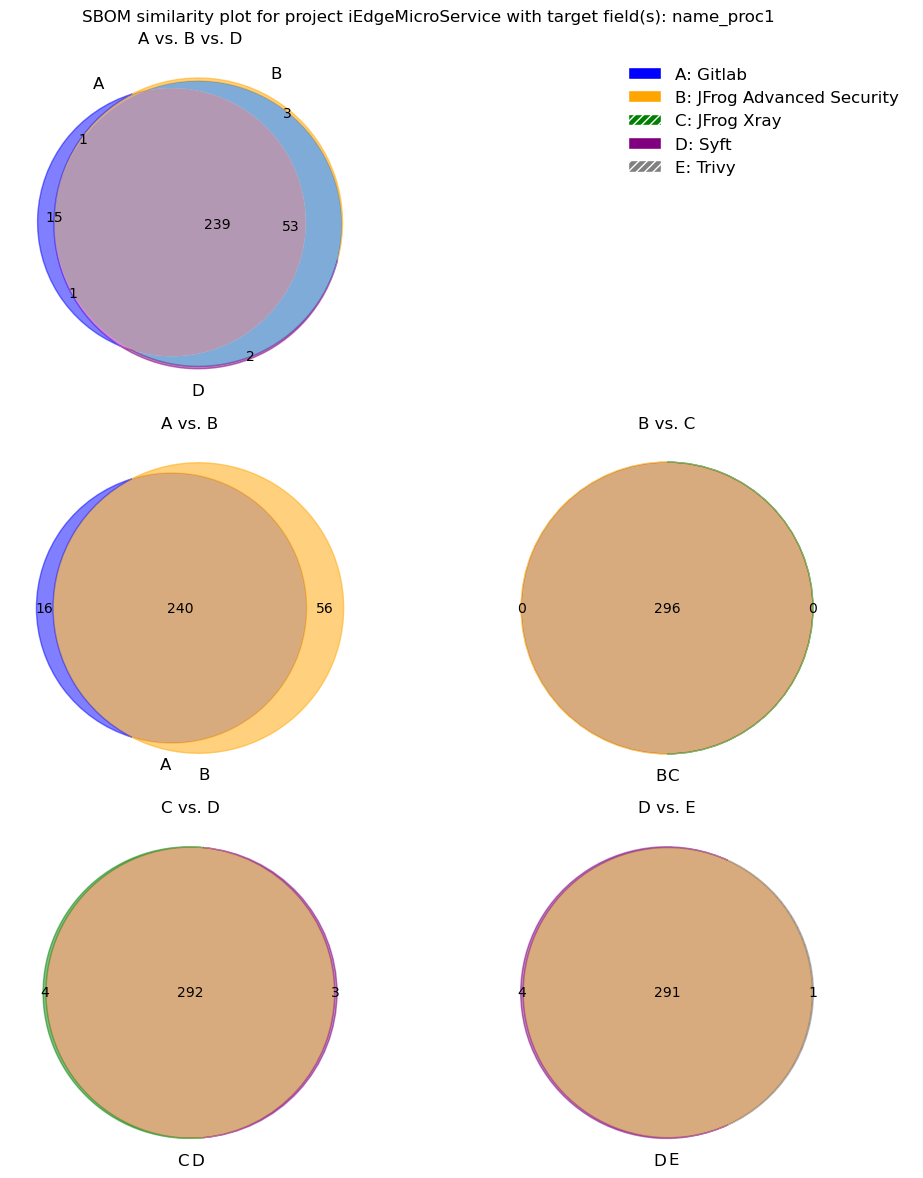

Project: Juice_Shop


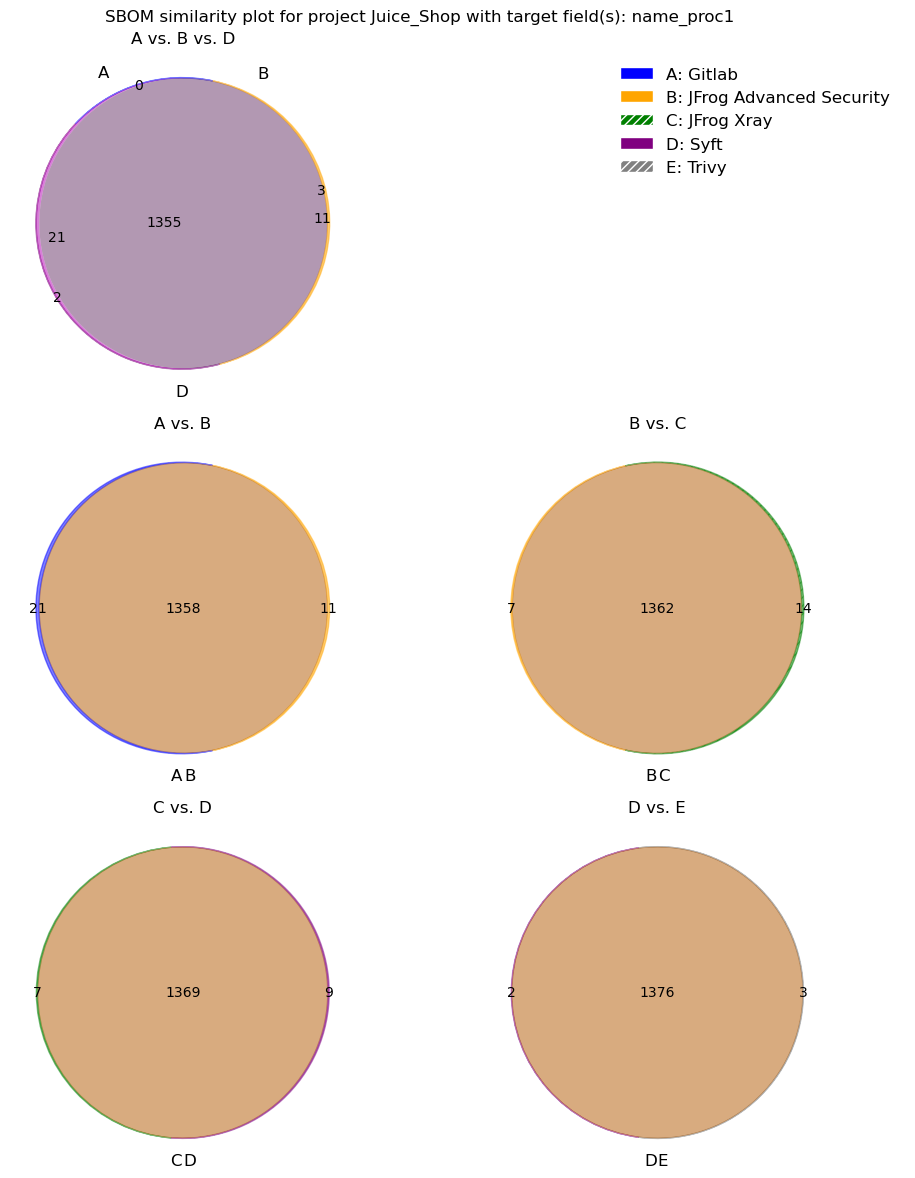

Project: NMP


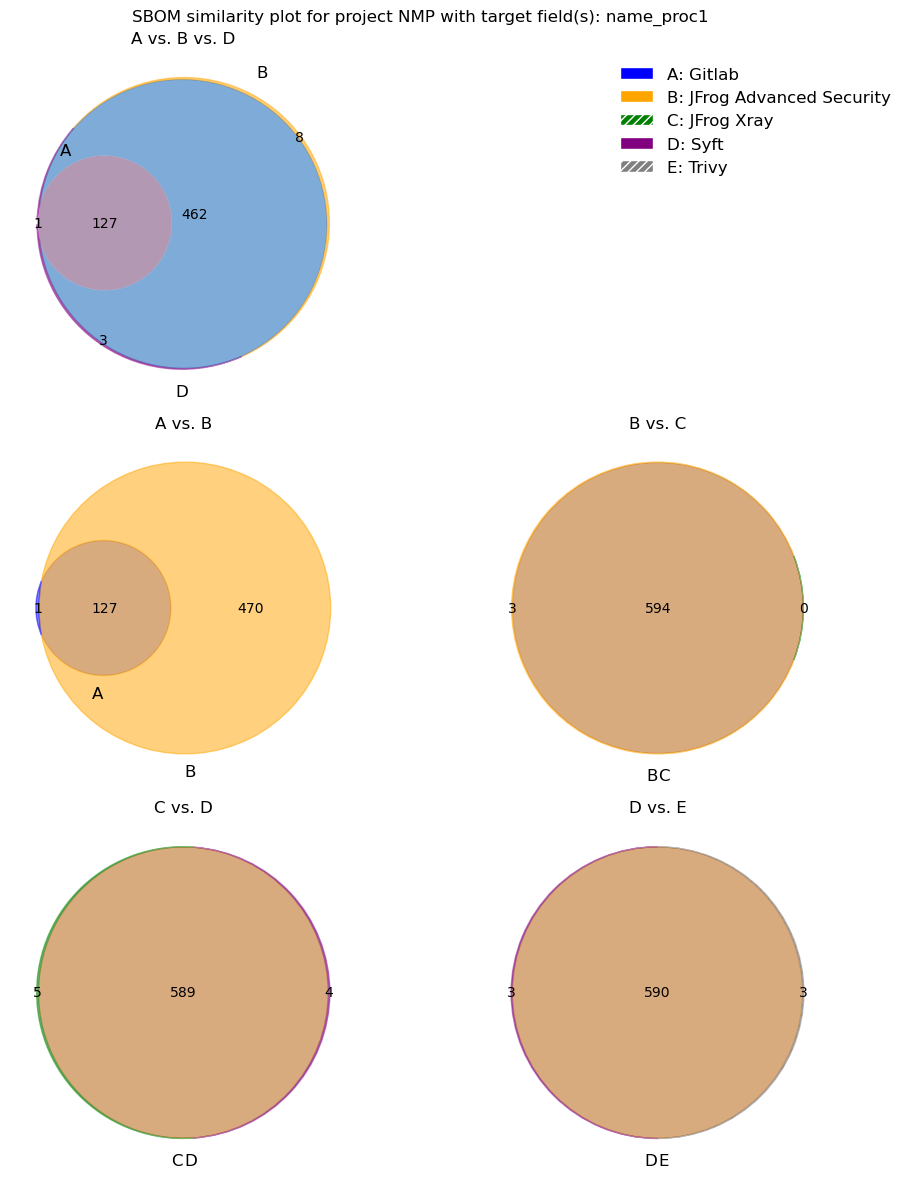

Project: pm-dashboard-frontend


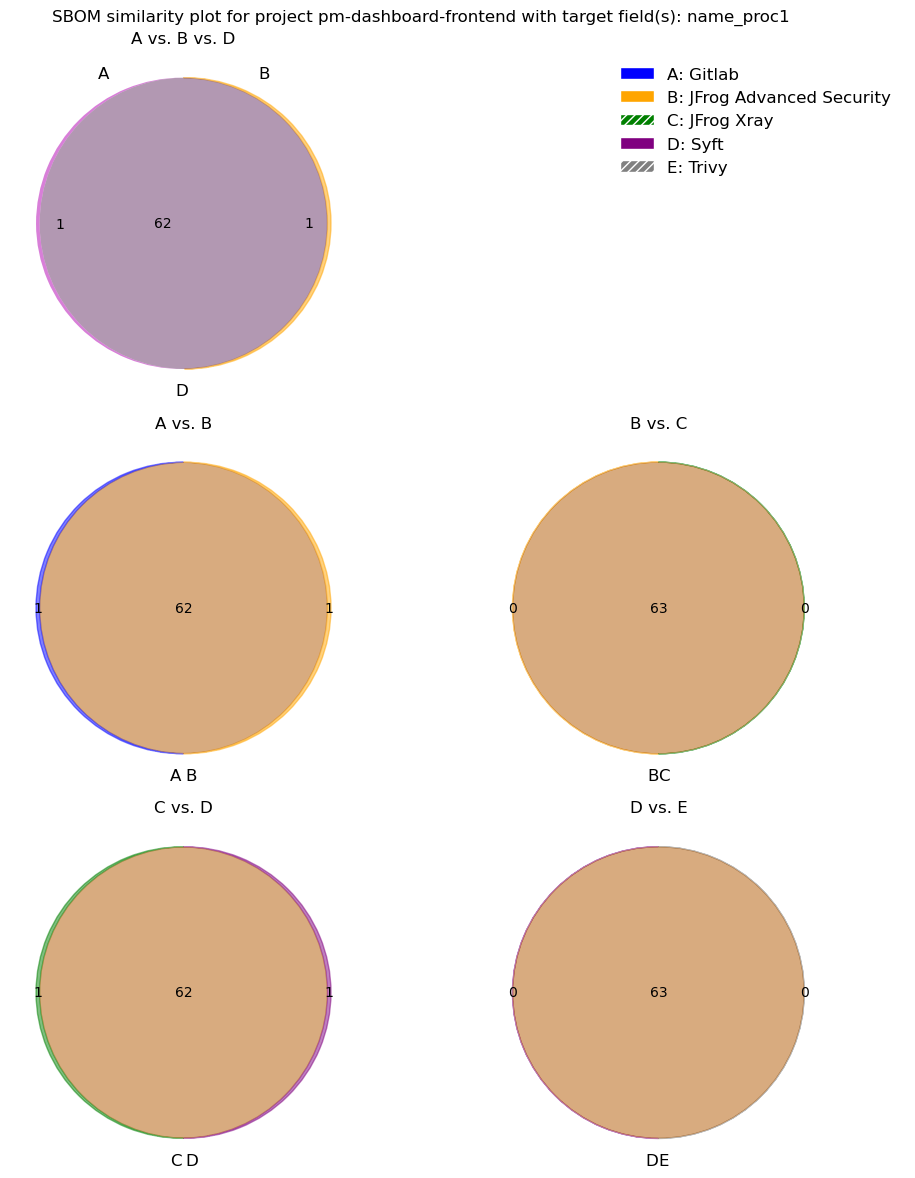

Project: pm-lst-kpi-module


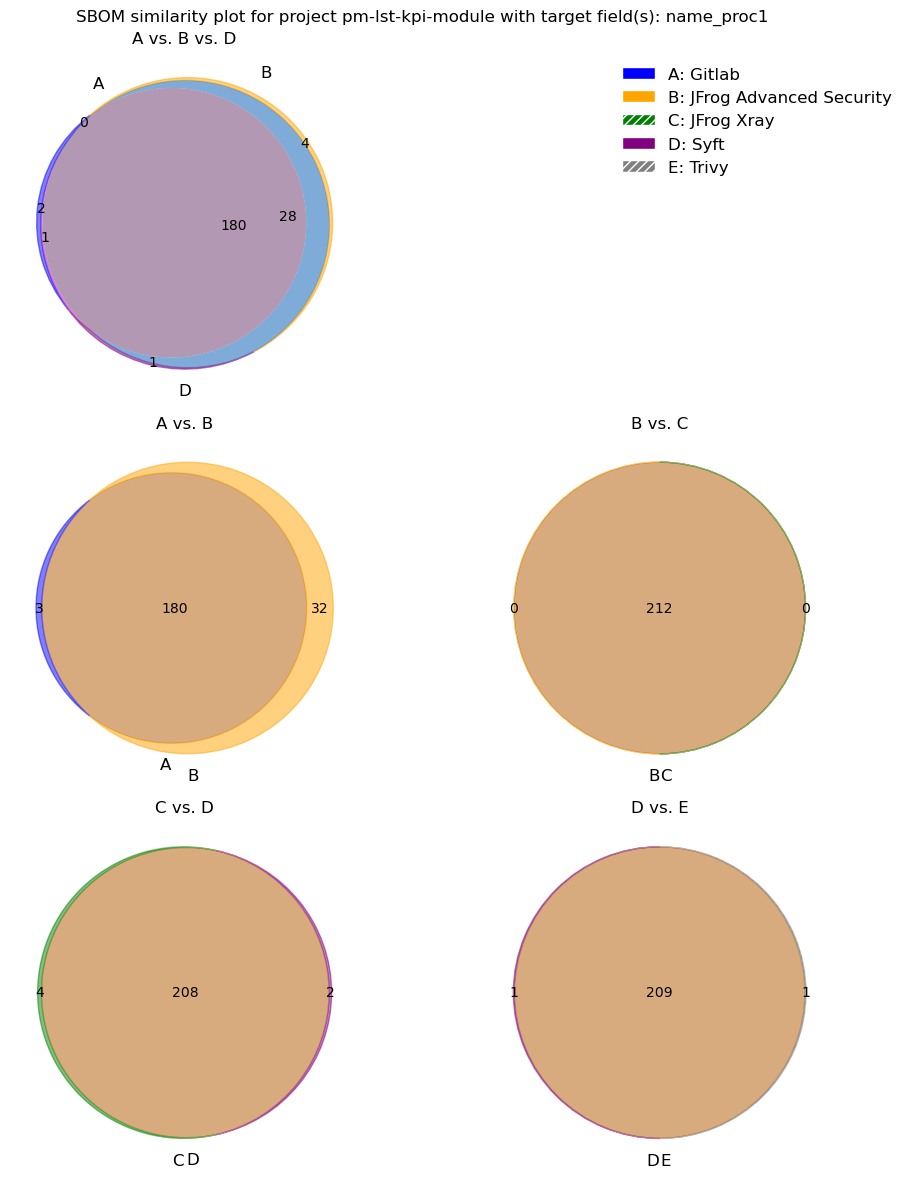

Project: pm-mongo


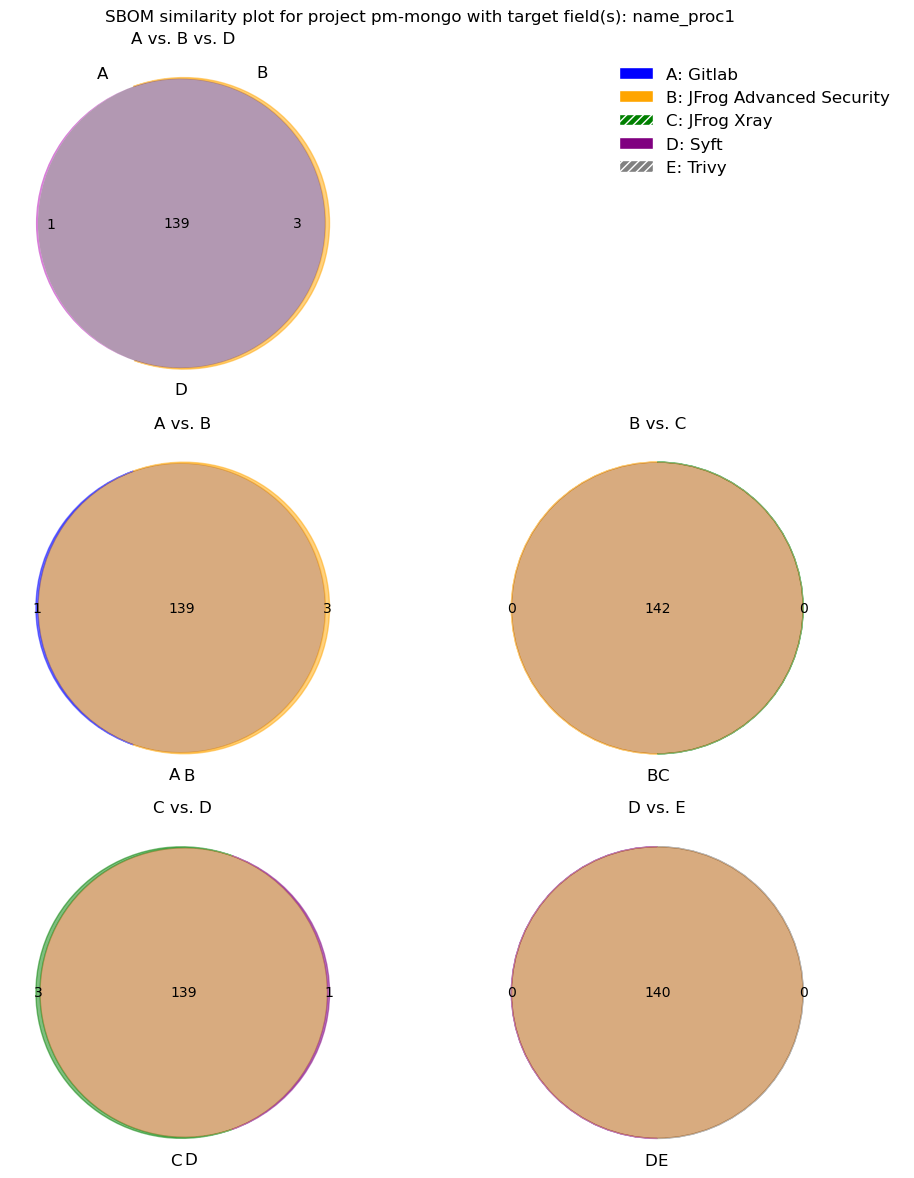

Project: RDCS_RDCP-Client


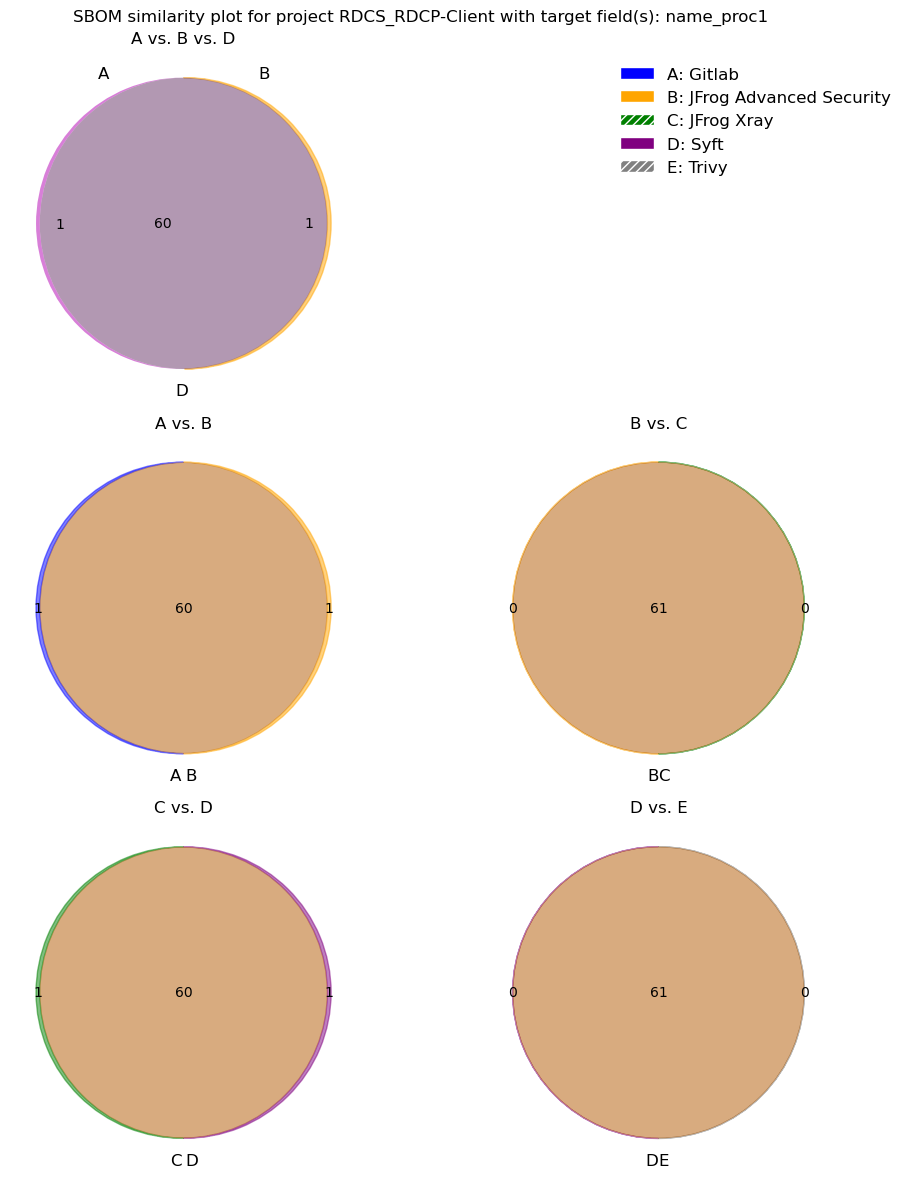

Project: RT-Cosmo


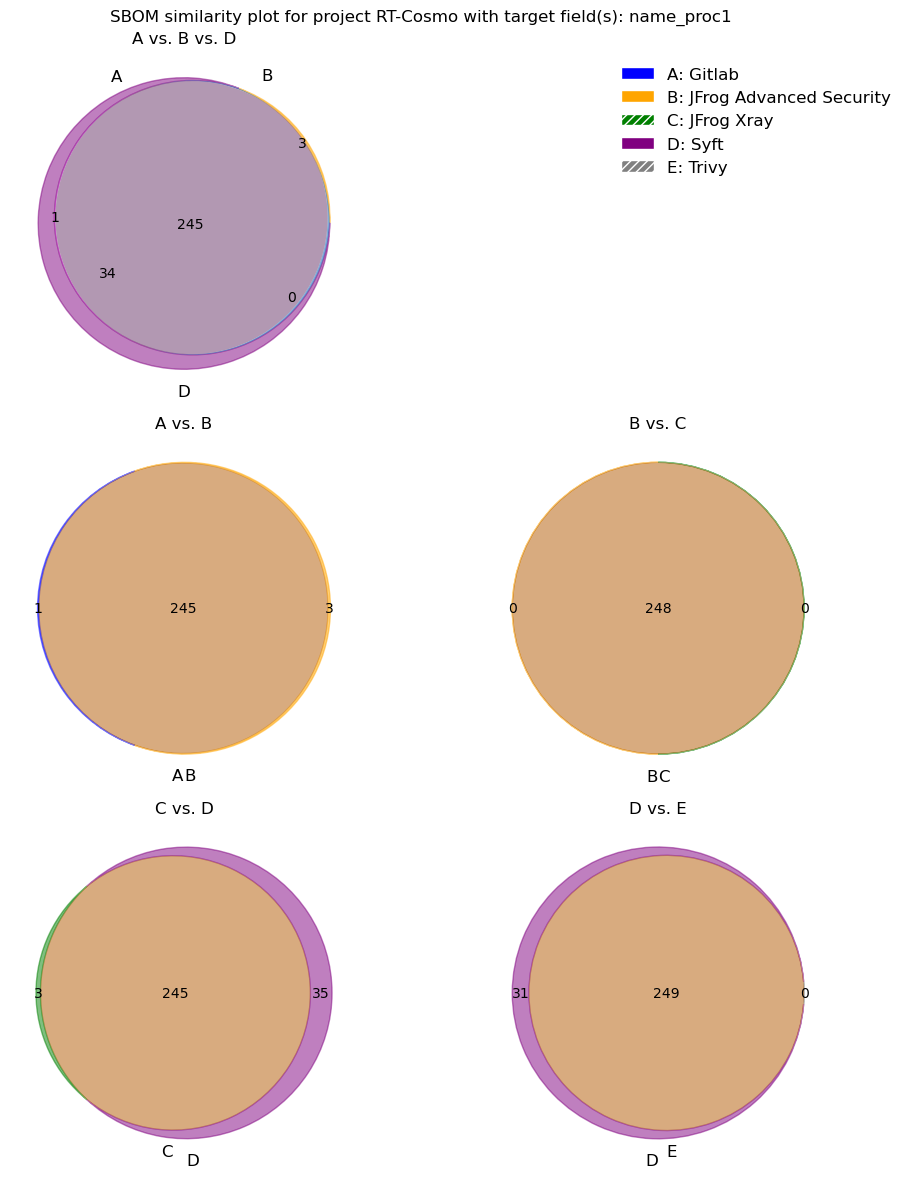

Project: vul_flask_app


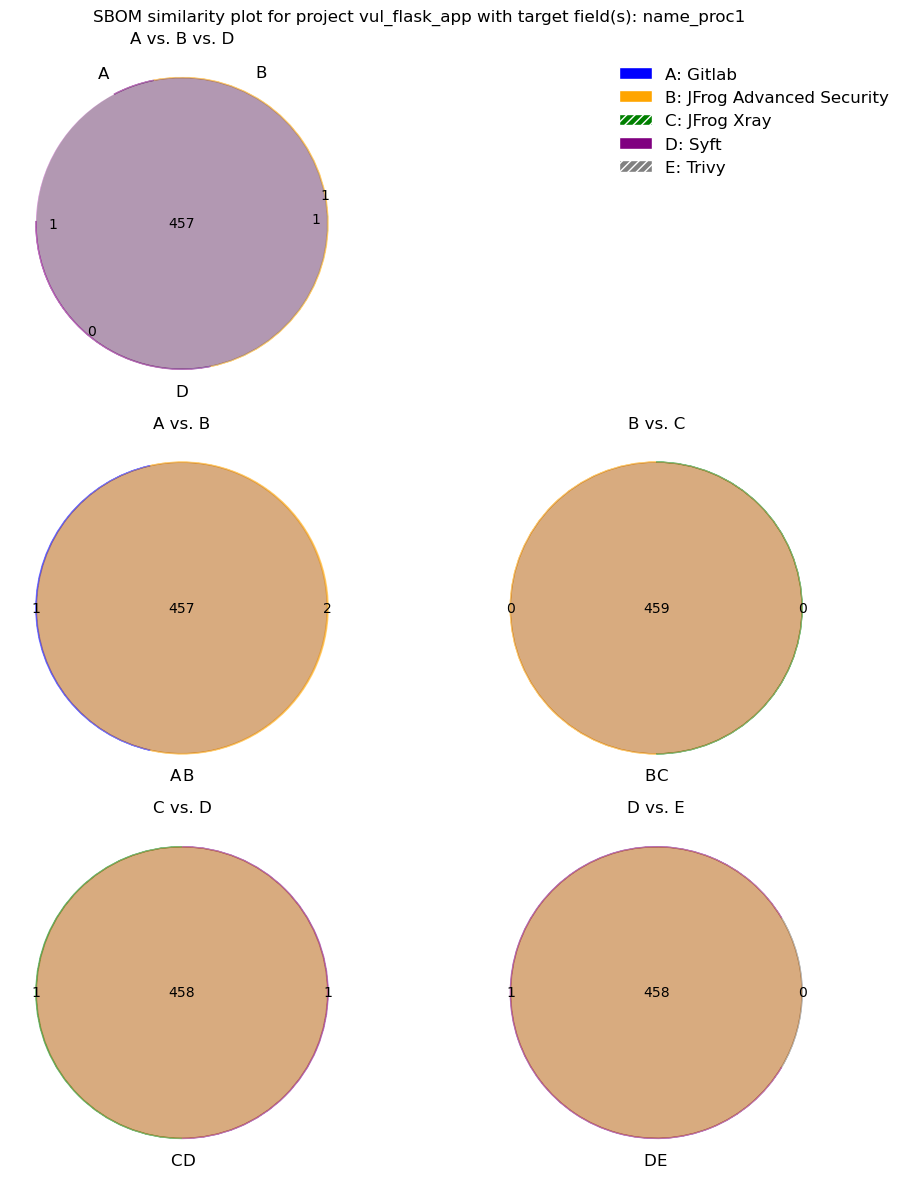

Project: Vulnerable_Flask_App


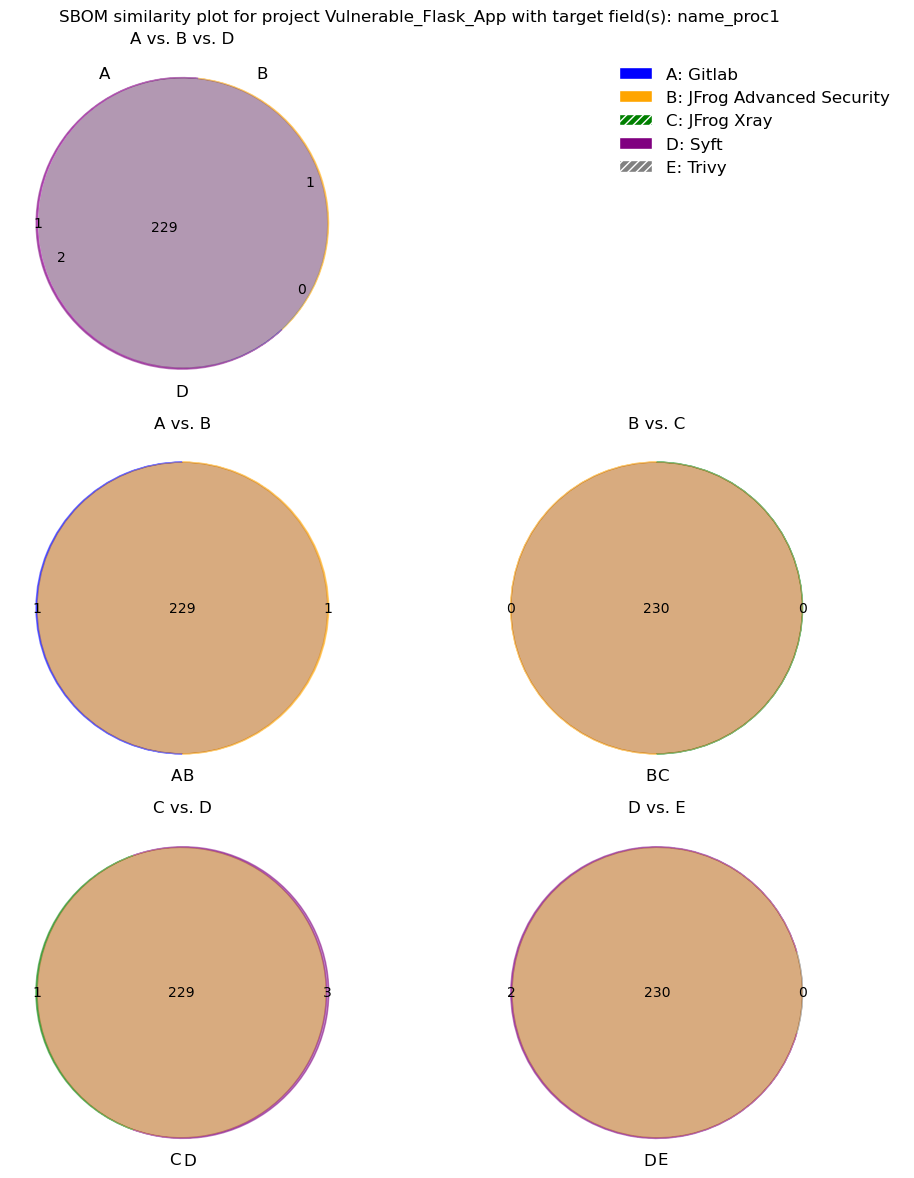

Project: WebGoat


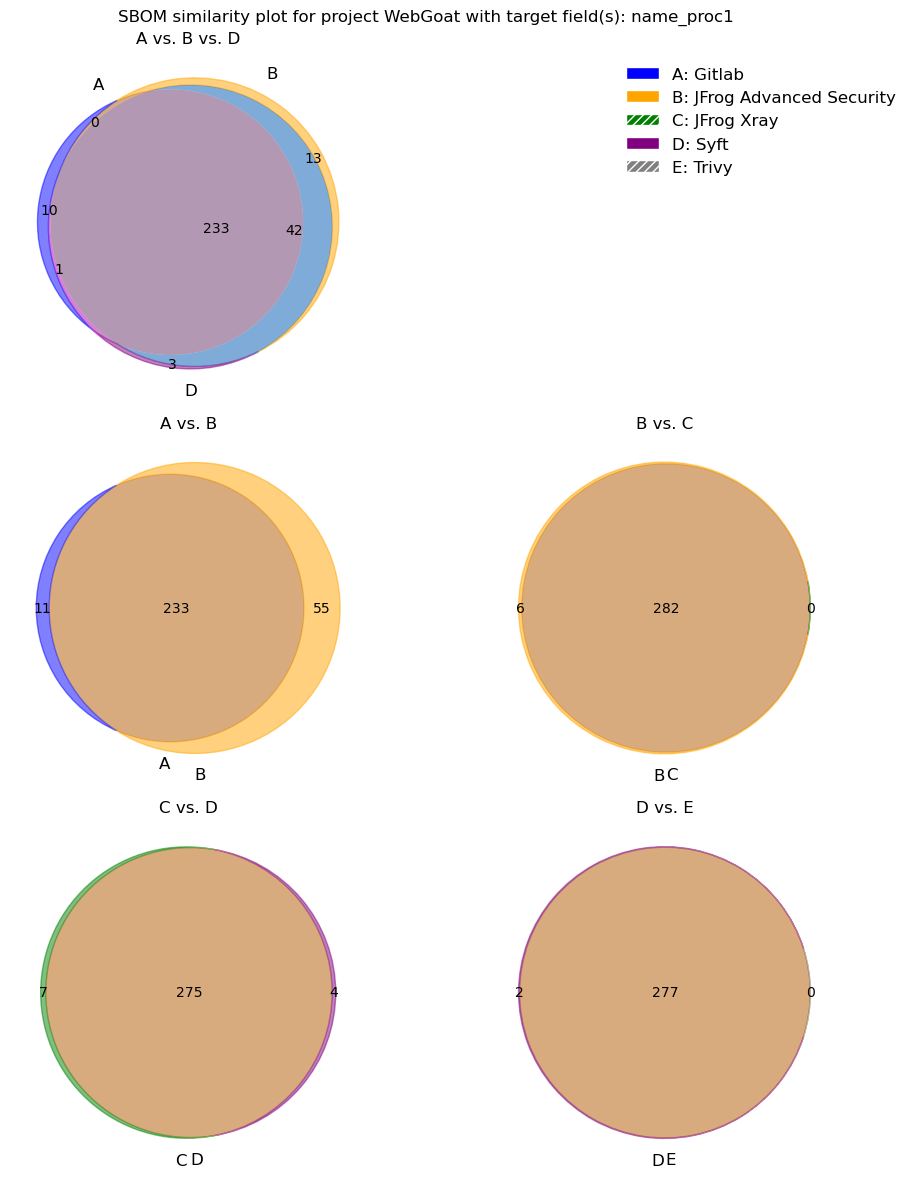

In [18]:
# function to transform column 'name' to content of 'name_proc1'
def proc1(x):
    return x.split(':')[-1]

# define project name and target field 
target_field = 'name_proc1'

for project_name, project_version in in_scope:
    
    print(f"Project: {project_name}")
    
    # get project data in data frame
    project_scanner_data = dt_instance.collect_all_scanner_data(project_name, project_version)


    # Apply the function proc1 to column "name" and add the result as column "name_proc1" using .assign()
    project_scanner_data = {df_name: df.assign(name_proc1=df["name"].apply(proc1)) for df_name, df in project_scanner_data.items()}

    # visualize project scanner data
    target_output_file = f"SBOM_comparison_{project_name}_{target_field}"
    create_SBOM_similarity_plot(project_name, target_field, project_scanner_data, target_output_file)

### SBOM comparison base on 'name_proc1+version'

'scanner_name'
'name', 
'version', 
'purl', 
'bom-ref', 
'hashes',
 'p_type',
 'p_namespace'
 'p_name',
 'p_version',
 'p_qualifiers', 'p_subpath'




In [192]:
for scanner in project_scanner_data.keys():
    print(f"{scanner}: {set(project_scanner_data[scanner]['p_type'])}")

gitlab_cont: {None, 'maven', 'deb'}
jfrog_advanced_security_cont: {'docker', 'npm', 'generic', None, 'deb'}
jfrog_cont: {None, 'deb', 'docker', 'generic'}
syft_cont: {None, 'maven', 'deb'}
trivy_cont: {None, 'maven', 'deb'}


In [191]:
for scanner in project_scanner_data.keys():
    print(f"{scanner}: {len(set(project_scanner_data[scanner]['p_namespace']))}")

gitlab_cont: 11
jfrog_advanced_security_cont: 1
jfrog_cont: 1
syft_cont: 244
trivy_cont: 186


In [221]:
for scanner in project_scanner_data.keys():
    list_of_dicts = project_scanner_data[scanner]['p_qualifiers'].tolist()
    set_size = len(set([f"{key}-{value}" for dct in list_of_dicts if dct is not None for key, value in dct.items()]))
    print(f"{scanner}: {set_size}")

gitlab_cont: 1
jfrog_advanced_security_cont: 0
jfrog_cont: 0
syft_cont: 58
trivy_cont: 5


gitlab_cont: {None}
jfrog_advanced_security_cont: {None}
jfrog_cont: {None}
syft_cont: {None}
trivy_cont: {None}


In [222]:
project_scanner_data['gitlab_cont']['p_subpath']

0      None
1      None
2      None
3      None
4      None
       ... 
123    None
124    None
125    None
126    None
127    None
Name: p_subpath, Length: 128, dtype: object

In [185]:
# Convert the dictionaries to strings in the format "key-value"
key_value_strings = [f"{key}-{value}" for dct in list_of_dicts for key, value in dct.items()]

# Convert the list of strings to a set
key_value_set = set(key_value_strings)

{None, 'maven', 'deb'}

Project: Floodlight


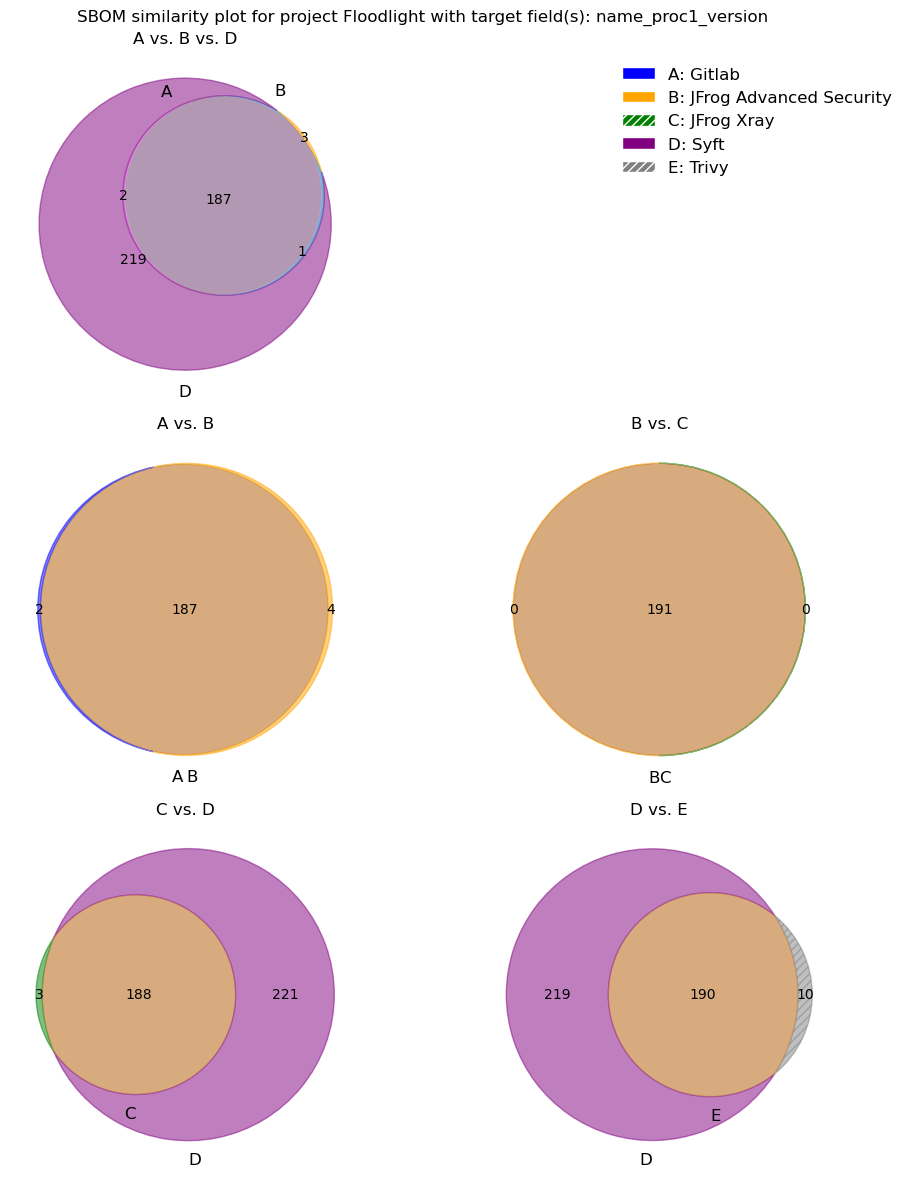

Project: Generator_2


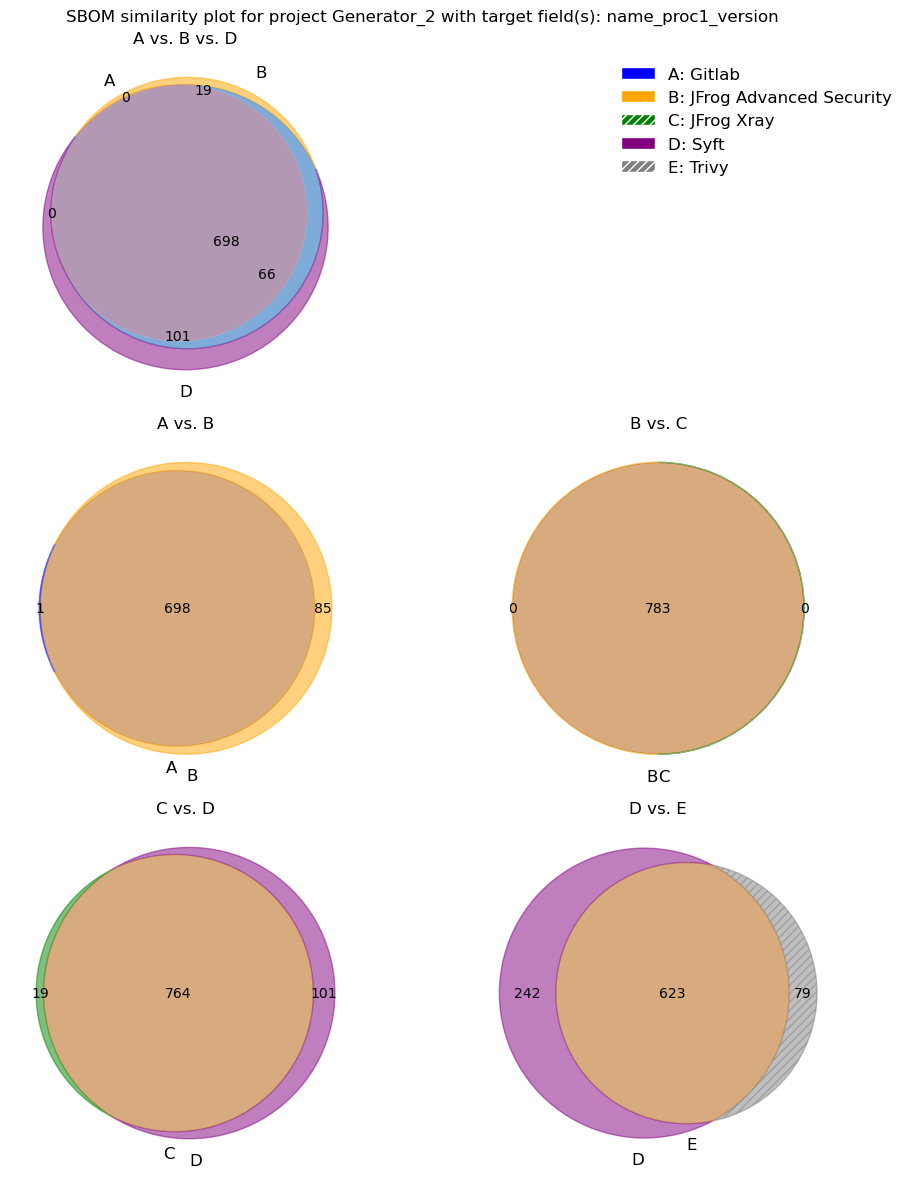

Project: iEdgeMicroService


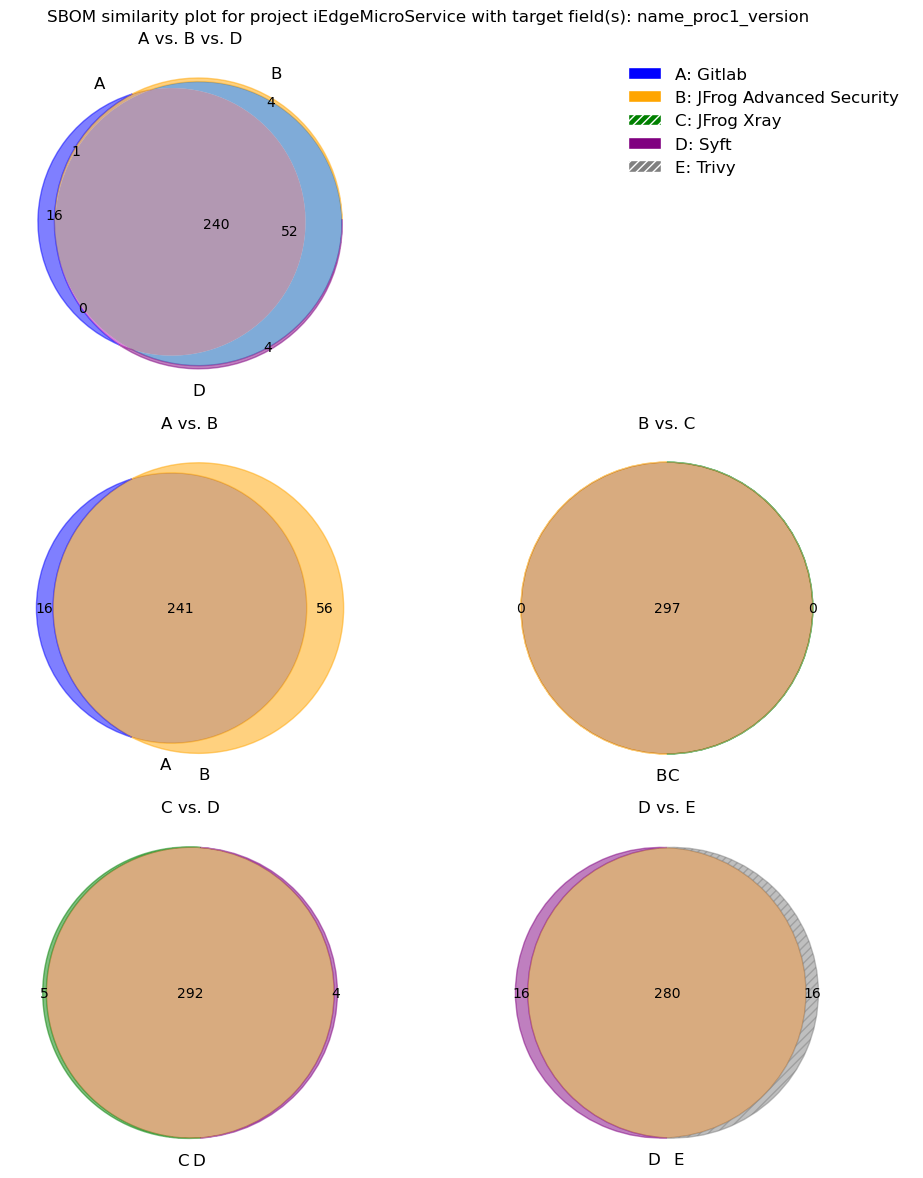

Project: Juice_Shop


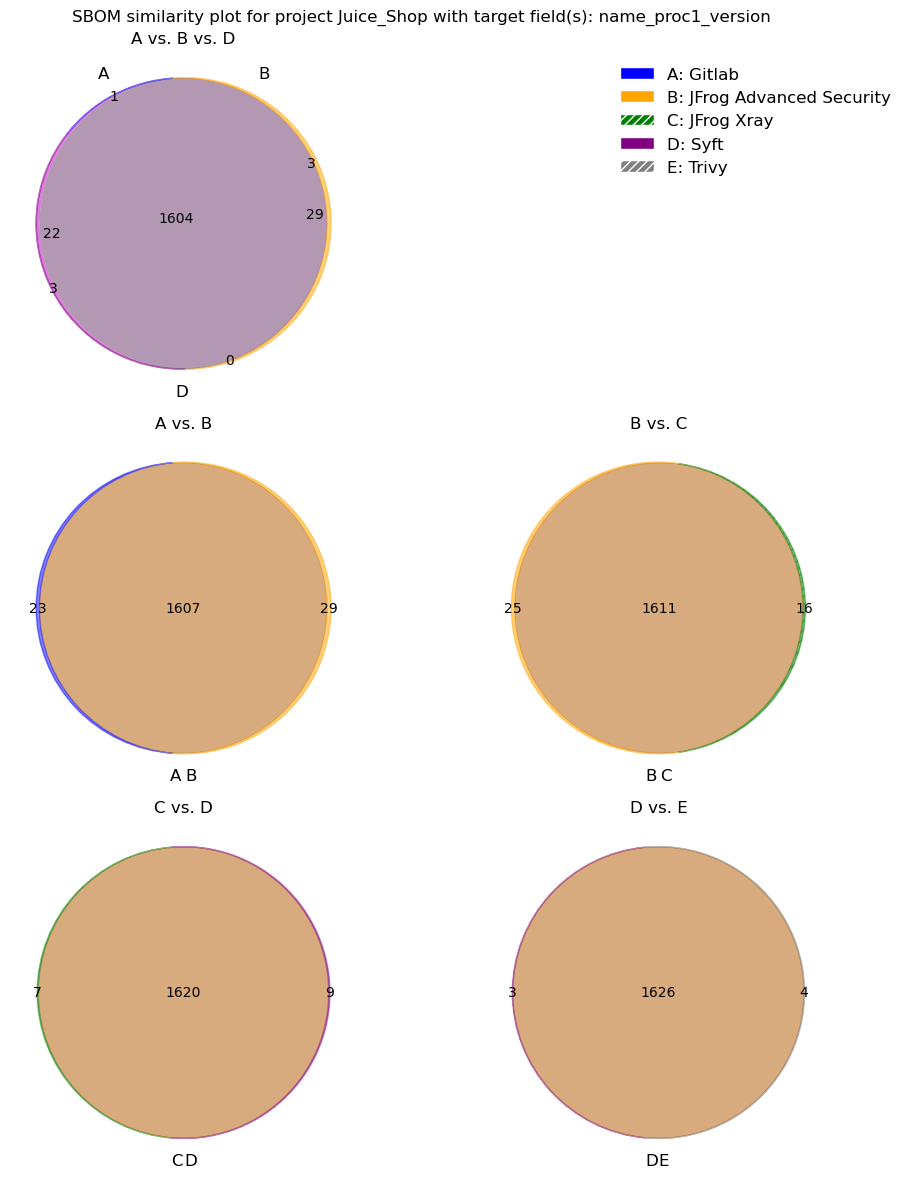

Project: NMP


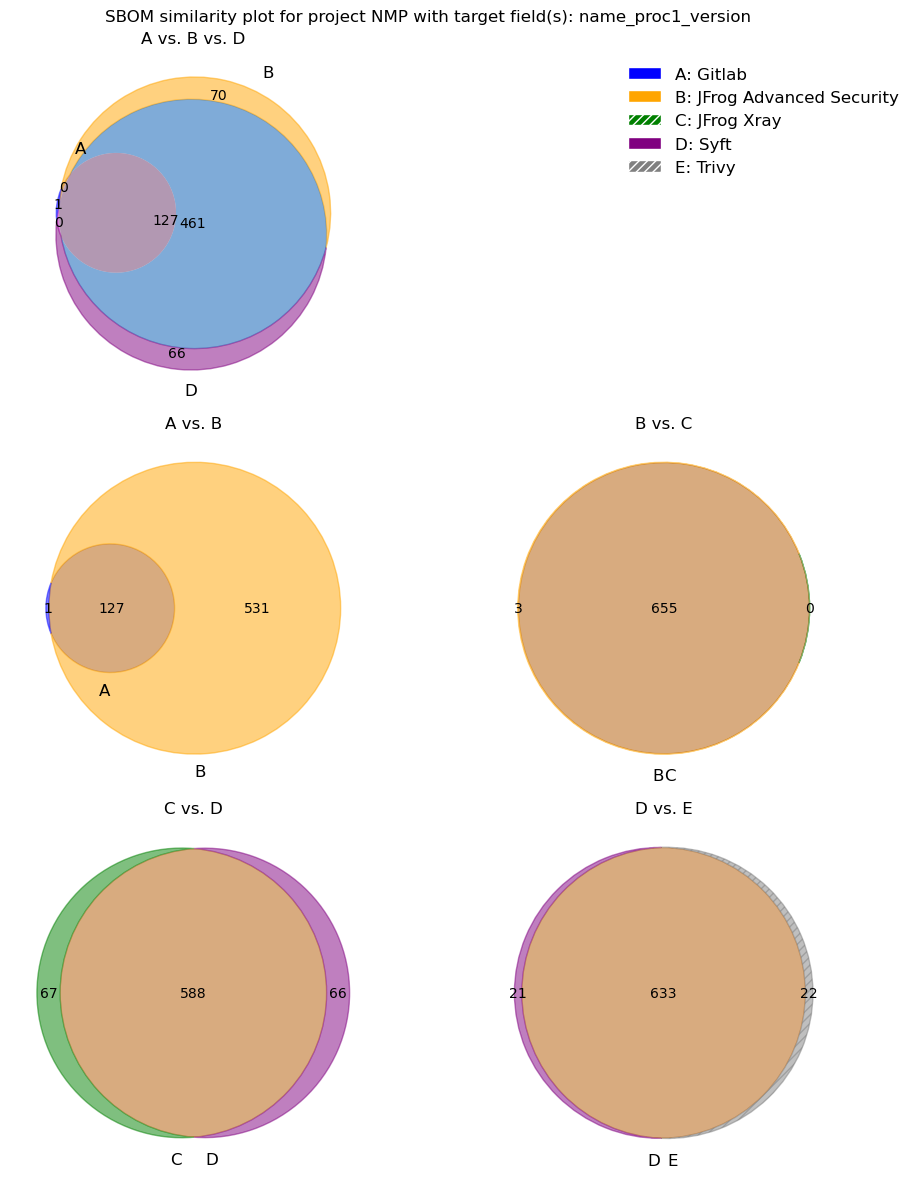

Project: pm-dashboard-frontend


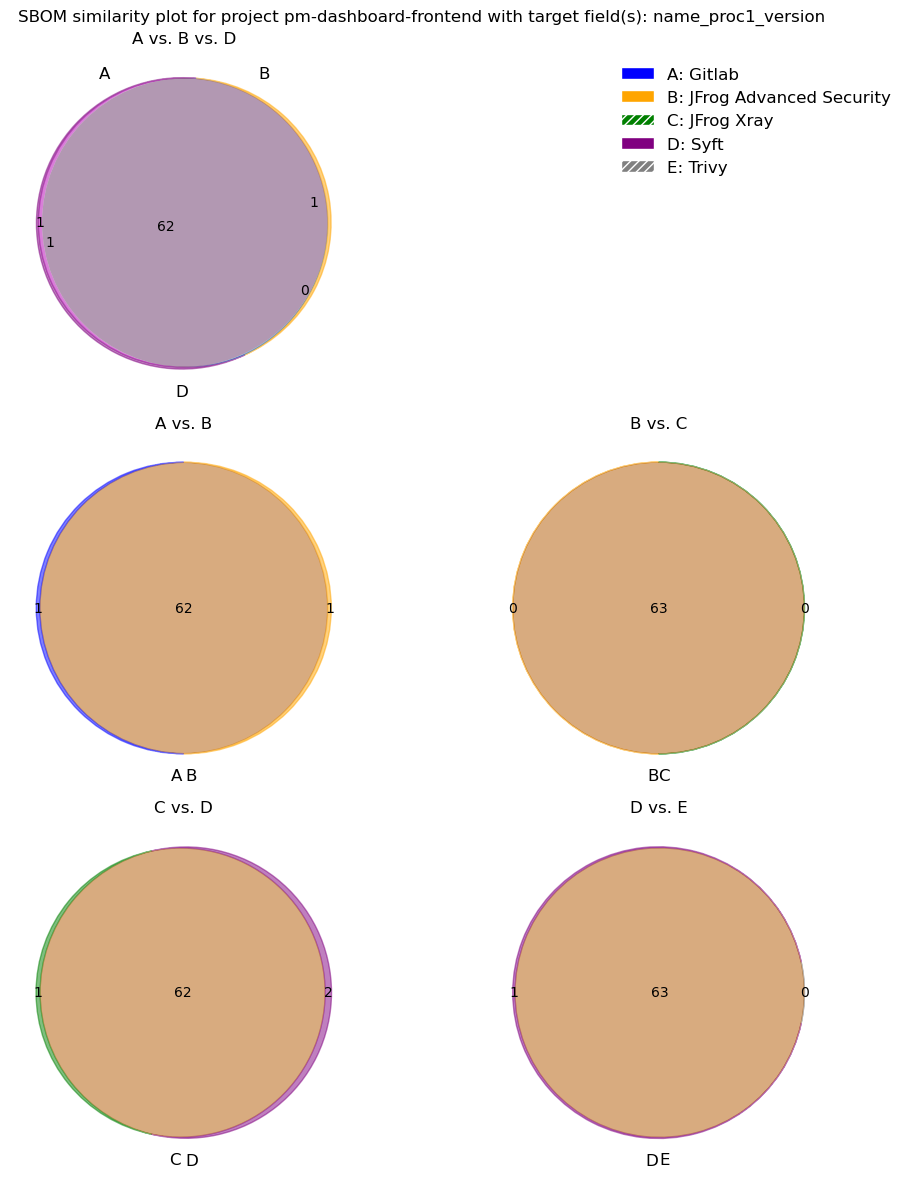

Project: pm-lst-kpi-module


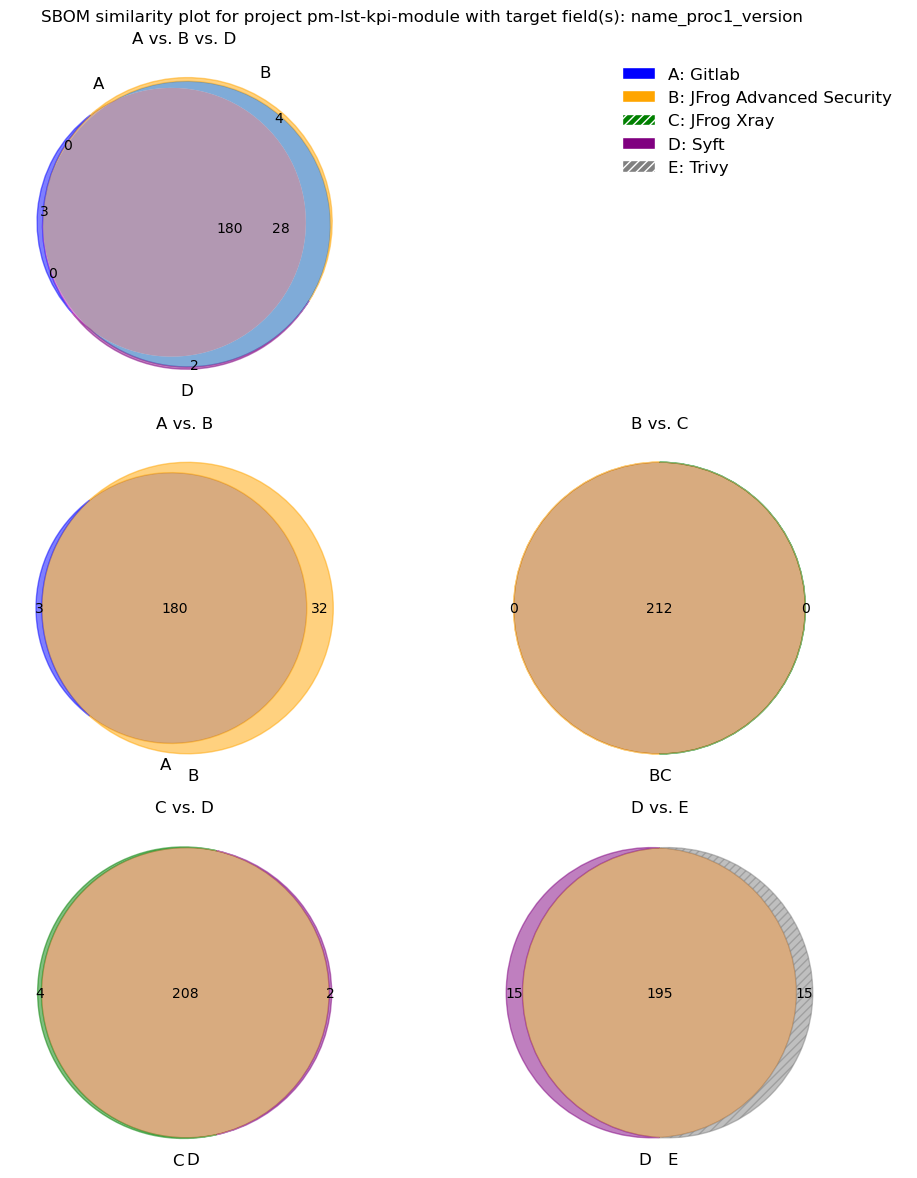

Project: pm-mongo


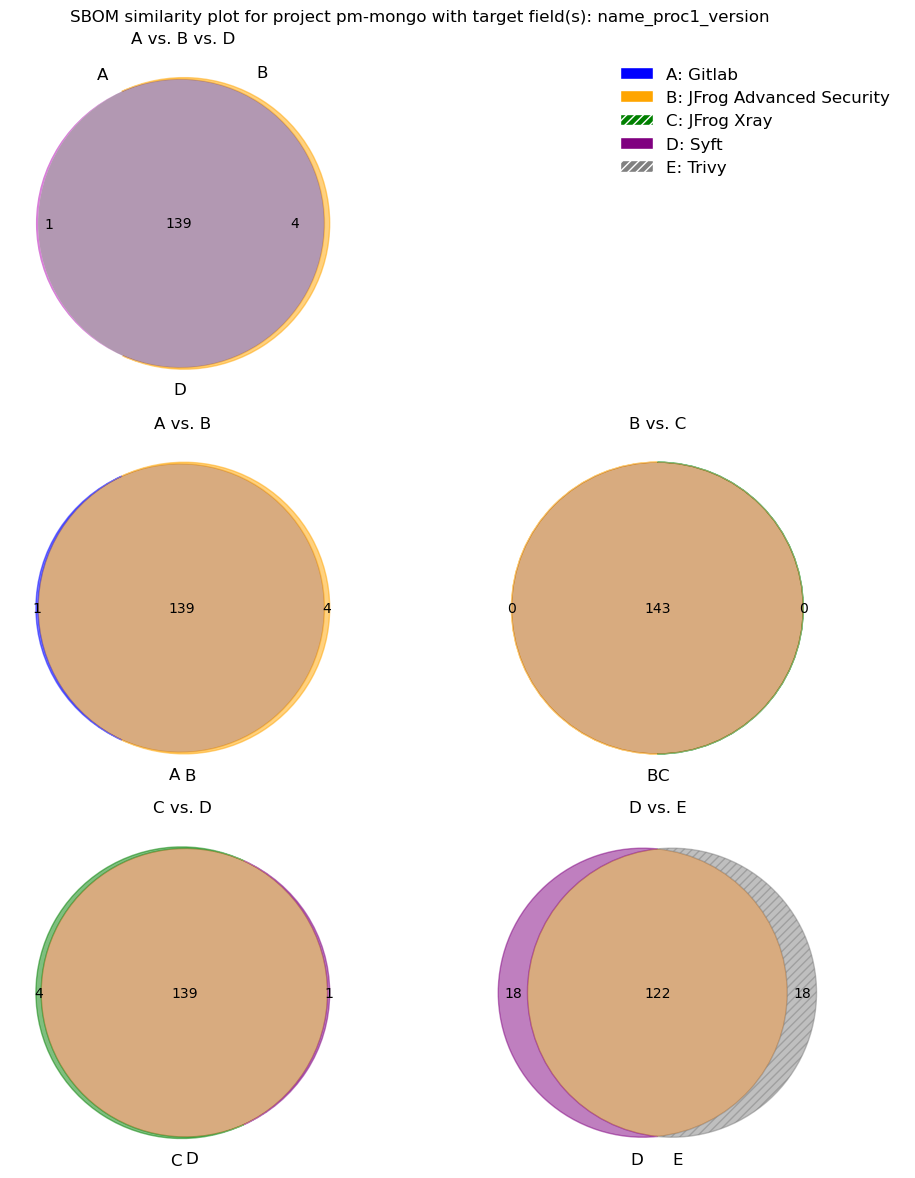

Project: RDCS_RDCP-Client


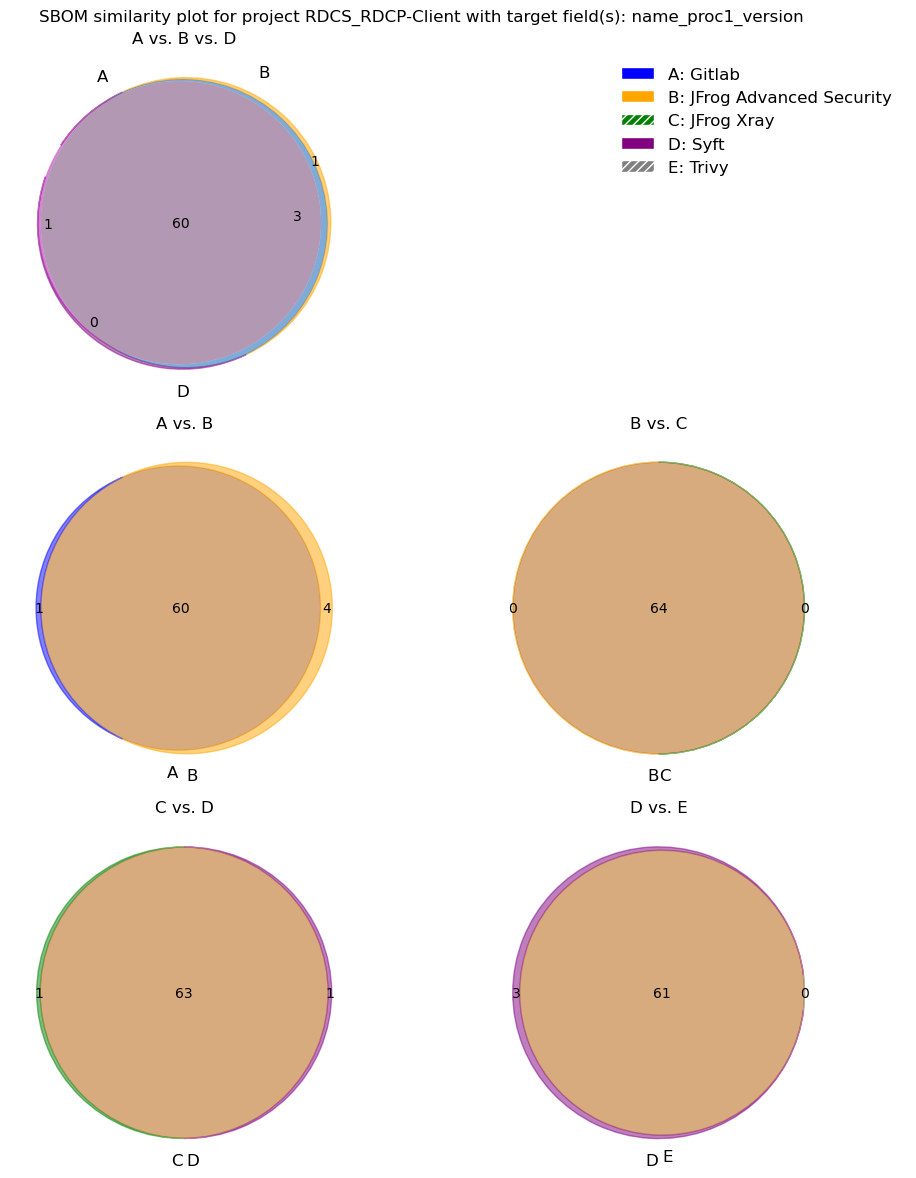

Project: RT-Cosmo


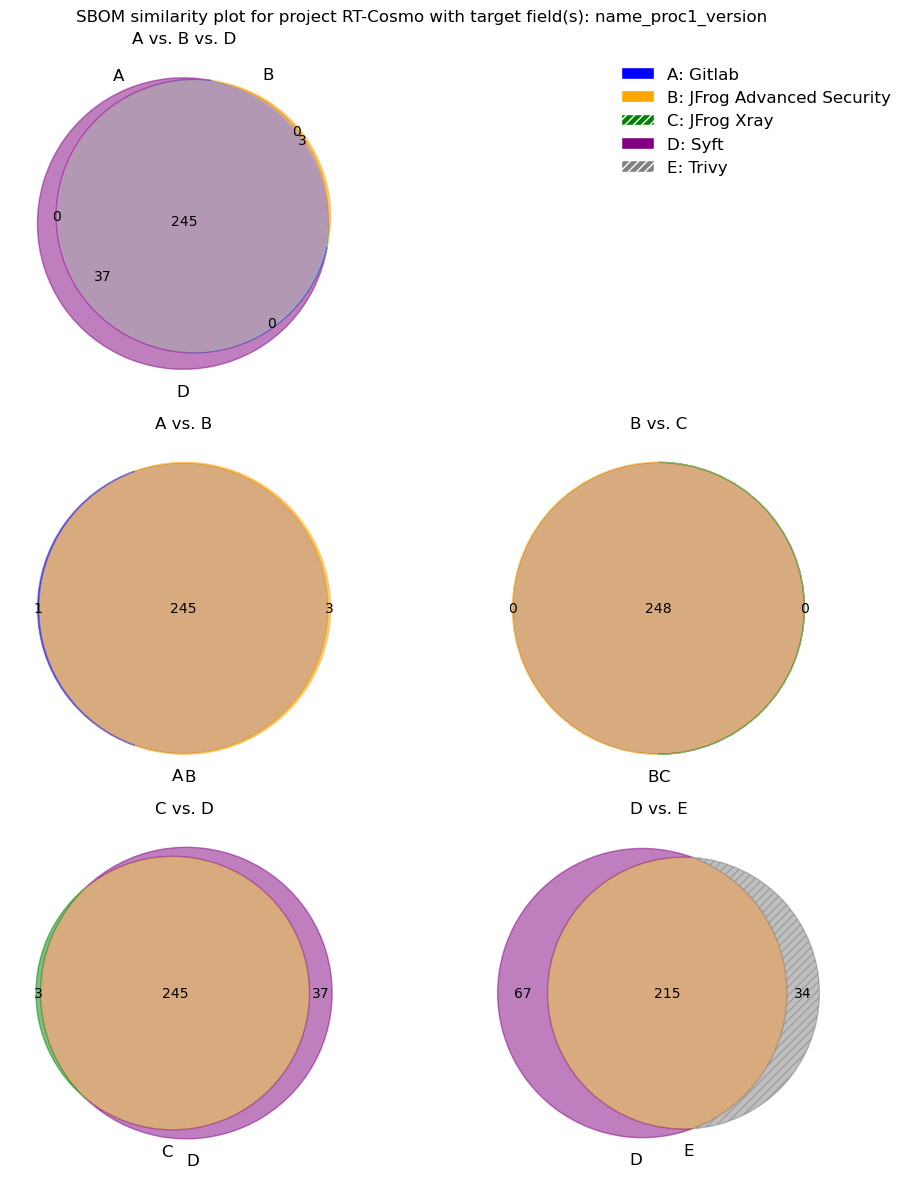

Project: vul_flask_app


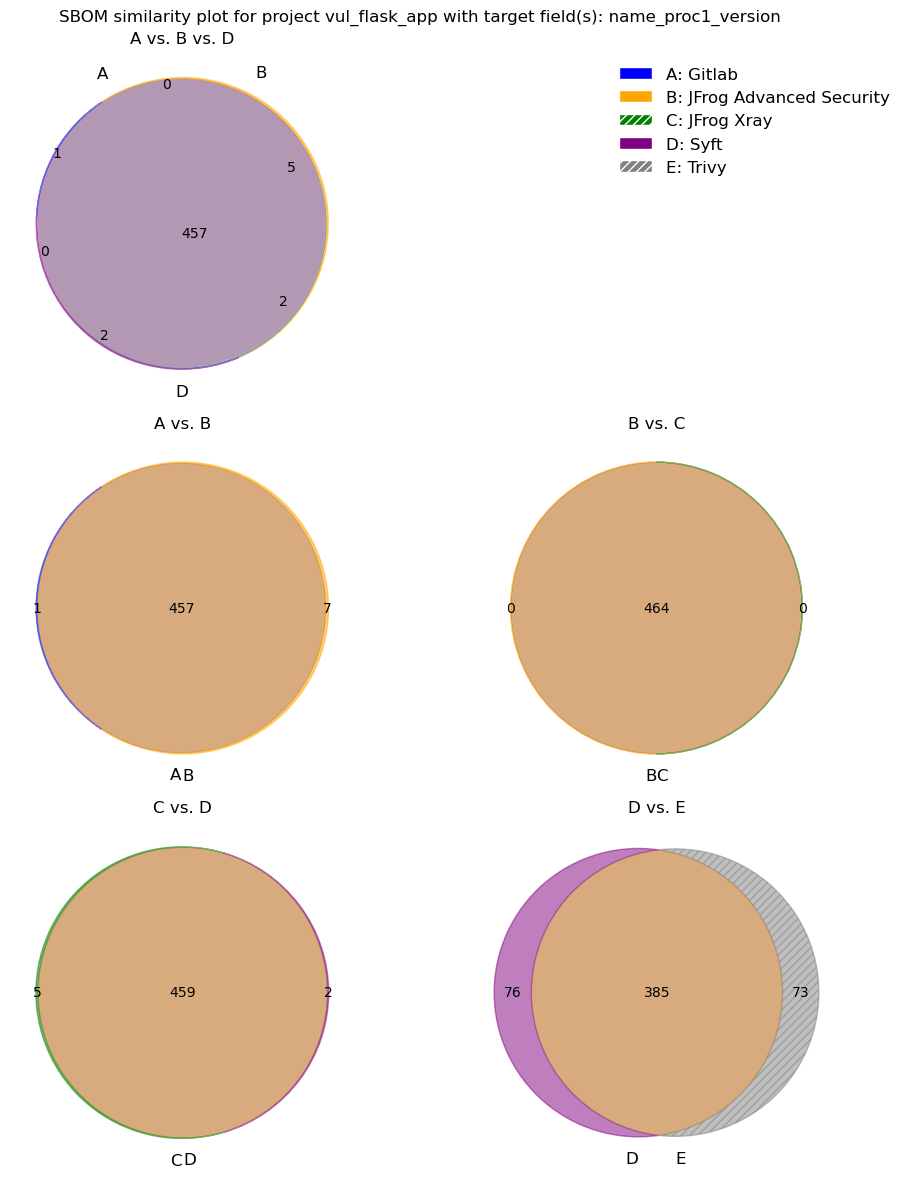

Project: Vulnerable_Flask_App


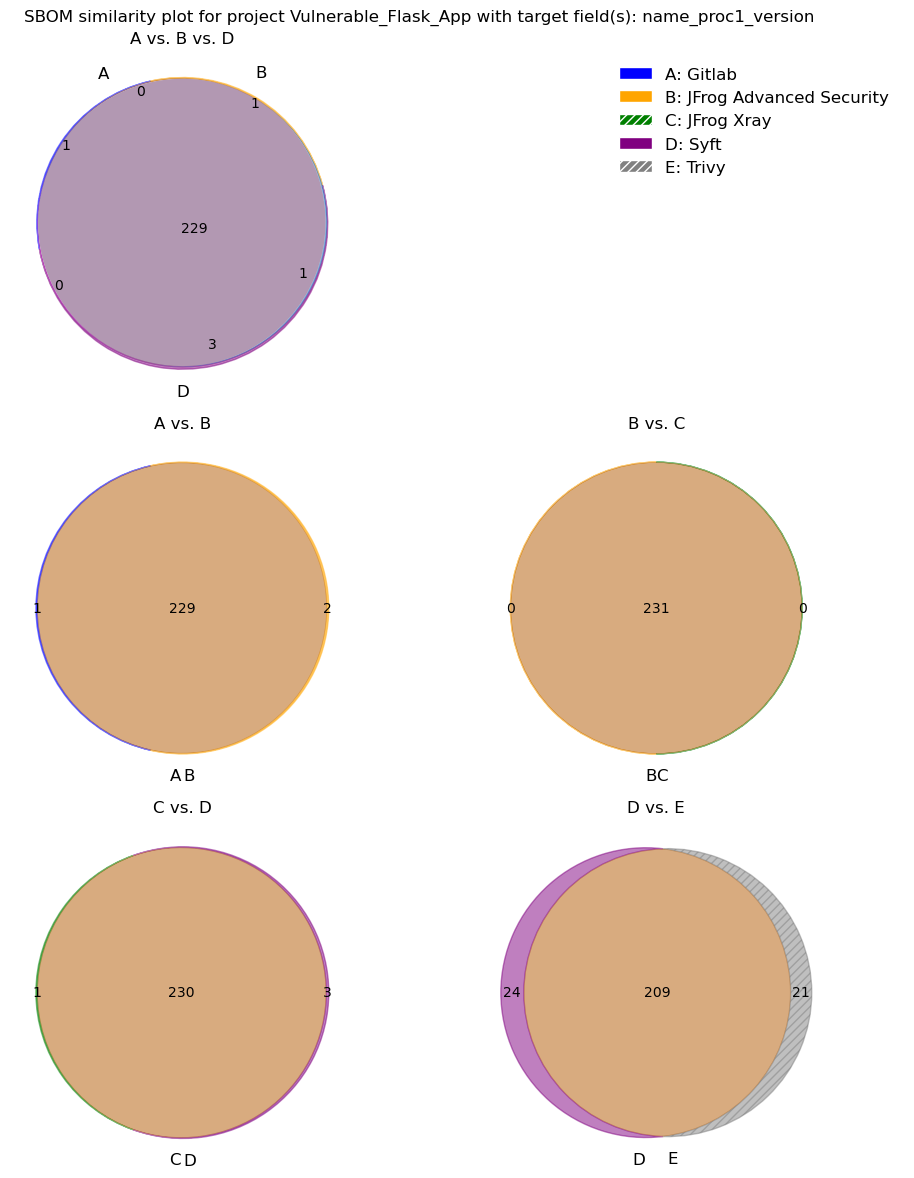

Project: WebGoat


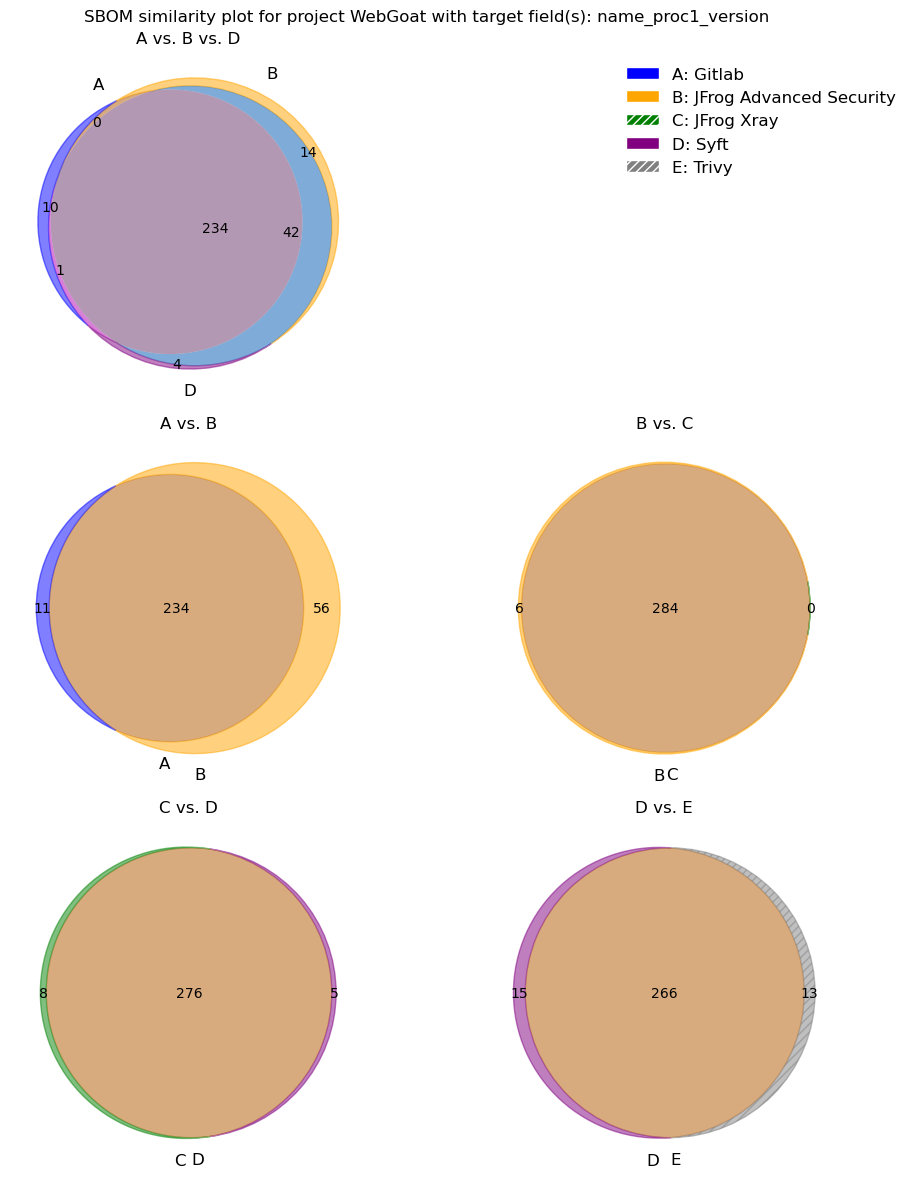

In [52]:
# function to transform column 'name'
def proc1(x):
    return x.split(':')[-1]

# define project name and target field 
DISPLAY = False
target_field = 'name_proc1_version'

# Initialize an empty list to hold the concatenated DataFrames
combined_dfs = []

for project_name, project_version in in_scope:
    
    print(f"Project: {project_name}")
    
    # get project data in data frame
    project_scanner_data = dt_instance.collect_all_scanner_data(project_name, project_version)

    # Dictionary to store the counted values
    counted_values = {}

    # # Iterate through the dictionary values (DataFrames) and add to list of dfs
    for df in project_scanner_data.values():
        df['project_name'] = project_name
        combined_dfs.append(df)
  
    # Create data frame
    counted_df = pd.DataFrame(counted_values).T
    if DISPLAY == True:
        # Print the project name
        print("Project Name:", project_name)
 
        display(counted_df)
    else:
        # Check if output folder exists
        output_folder = f"../output/{project_name}"
        if not os.path.exists(output_folder):
            os.makedirs(output_folder)
        # Save the DataFrame as a CSV file
        csv_filename = f"../output/{project_name}/Counts_{project_name}_{target_field}.csv"
        counted_df.to_csv(csv_filename, index=False)
        
    # Apply the function proc1 to column "name" and add the result as column "name_proc1" using .assign()
#    df['name'].apply(proc1).astype(str) + ':' + df['p_version'].fillna('').astype(str)
    project_scanner_data = {df_name: df.assign(name_proc1_version=(df["name"].apply(proc1).astype(str) + ':' + 
                                                                   df['version'].fillna('').astype(str)))  
                            for df_name, df in project_scanner_data.items()}

    # visualize project scanner data
    target_output_file = f"SBOM_comparison_{project_name}_{target_field}"
    create_SBOM_similarity_plot(project_name, target_field, project_scanner_data, target_output_file)


# Concatenate the DataFrames along the rows (vertically)
scanner_data_agg_df = pd.concat(combined_dfs, ignore_index=True)
scanner_data_agg_df.reset_index(drop=True, inplace=True)

#### Debug

In [54]:
scanner_data_agg_df.columns

Index(['scanner_name', 'name', 'version', 'purl', 'bom-ref', 'hashes',
       'p_type', 'p_namespace', 'p_name', 'p_version', 'p_qualifiers',
       'p_subpath', 'project_name'],
      dtype='object')

In [57]:
cols = ['scanner_name', 'name', 'version',  'bom-ref', 'p_type', 'p_namespace', 'p_name', 'p_version', 'p_qualifiers', 'p_subpath', 'project_name']
df = scanner_data_agg_df[cols]

In [58]:
df.columns

Index(['scanner_name', 'name', 'version', 'bom-ref', 'p_type', 'p_namespace',
       'p_name', 'p_version', 'p_qualifiers', 'p_subpath', 'project_name'],
      dtype='object')

In [62]:
df = scanner_data_agg_df
df.groupby(['project_name','scanner_name']).agg({'name': 'nunique', 
                                                 'version': 'nunique' , 
                                                 'purl': 'nunique', 
                                                 'bom-ref': 'nunique', 
                                                 'hashes': 'nunique', 
                                                 'p_type': 'nunique', 
                                                 'p_namespace': 'nunique', 
                                                 'p_name': 'nunique', 
                                                 'p_version': 'nunique', 
                                                 'p_qualifiers': 'nunique',
                                                 'p_subpath': 'nunique'
                                                })

TypeError: unhashable type: 'list'

In [96]:
df = scanner_data_agg_df
df.groupby(['project_name','scanner_name']).agg({'name': 'nunique', 
                                                 'version': 'nunique' , 
                                                 'purl': 'nunique',
                                                 'p_type': 'nunique', 
                                                 'p_namespace': 'nunique', 
                                                 'p_name': 'nunique', 
                                                 'p_qualifiers': 'size',
                                                 'p_version': 'nunique', 
                                                 'p_subpath': 'nunique'
                                                })
       

name  version  purl  p_type  \
project_name  scanner_name                                                
Floodlight    gitlab_cont                    189      123   188       2   
              jfrog_advanced_security_cont   191      124    64       2   
              jfrog_cont                     191      124     0       0   
              syft_cont                      304      276   407       3   
              trivy_cont                     200      125   199       2   
...                                          ...      ...   ...     ...   
vul_flask_app gitlab_cont                    458      231   457       2   
              jfrog_advanced_security_cont   459      237   464       4   
              jfrog_cont                     459      237   464       4   
              syft_cont                      459      234   460       3   
              trivy_cont                     458      228   457       2   

                                            p_namespace  p_name  p_qualifiers  \
project_name  scanner_name                                                      
Floodlight    gitlab_cont                            49     188           189   
              jfrog_advanced_security_cont            0      64           191   
              jfrog_cont                              0       0           191   
              syft_cont                             293     303           409   
              trivy_cont                             58     199           200   
...                                                 ...     ...           ...   
vul_flask_app gitlab_cont                             1     457           458   
              jfrog_advanced_security_cont            0     459           464   
              jfrog_cont                              0     459           464   
              syft_cont                               1     458           461   
              trivy_cont                              1     457           458   

                                            p_version  p_subpath  
project_name  scanner_name                                        
Floodlight    gitlab_cont                         122          0  
              jfrog_advanced_security_cont         55          0  
              jfrog_cont                            0          0  
              syft_cont                           274          0  
              trivy_cont                          124          0  
...                                               ...        ...  
vul_flask_app gitlab_cont                         230          0  
              jfrog_advanced_security_cont        237          0  
              jfrog_cont                          237          0  
              syft_cont                           233          0  
              trivy_cont                          227          0  

[65 rows x 9 columns]

In [94]:
df.groupby(['project_name','scanner_name'])['p_qualifiers'].apply(len)

project_name   scanner_name                
Floodlight     gitlab_cont                     189
               jfrog_advanced_security_cont    191
               jfrog_cont                      191
               syft_cont                       409
               trivy_cont                      200
                                              ... 
vul_flask_app  gitlab_cont                     458
               jfrog_advanced_security_cont    464
               jfrog_cont                      464
               syft_cont                       461
               trivy_cont                      458
Name: p_qualifiers, Length: 65, dtype: int64

In [98]:
xx = df['p_qualifiers']
xx.iloc[50:100]

50                    None
51                    None
52                    None
53                    None
54                    None
55                    None
56                    None
57                    None
58                    None
59                    None
60    {'distro': '3.17.0'}
61    {'distro': '3.17.0'}
62    {'distro': '3.17.0'}
63    {'distro': '3.17.0'}
64    {'distro': '3.17.0'}
65                    None
66                    None
67                    None
68                    None
69                    None
70                    None
71                    None
72                    None
73                    None
74                    None
75                    None
76                    None
77                    None
78                    None
79                    None
80                    None
81                    None
82                    None
83                    None
84                    None
85                    None
86                    None
8

In [75]:
xx.items()

dict_items([('distro', '3.17.0')])

In [82]:
list(df['p_qualifiers'].iloc[26021].items())

[('arch', 'amd64'), ('distro', 'ubuntu-20.04'), ('epoch', '1')]

In [84]:
df['p_qualifiers'].iloc[26021]

{'arch': 'amd64', 'distro': 'ubuntu-20.04', 'epoch': '1'}

In [88]:
import pandas as pd
from collections import defaultdict

# Assuming you have a DataFrame named 'df'
# For demonstration purposes, let's create a sample DataFrame
data = {'A': [{'name1': 'type1', 'name2': 'type2'},
              {'name2': 'type2', 'name3': 'type3'},
              None,
              {'name1': 'type1'},
              None]}
df = pd.DataFrame(data)

# Define a function to merge dictionaries and count unique pairs
def merge_and_count_dicts(dicts):
    merged_dict = defaultdict(set)
    for d in dicts:
        if isinstance(d, dict):
            for key, value in d.items():
                merged_dict[key].add(value)
    return len(merged_dict)

# Group by column 'A' and apply the custom aggregation function
aggregated_result = df.groupby('A')['A'].agg(merge_and_count_dicts)



TypeError: unhashable type: 'dict'

In [86]:
set([(1,2), (2,4), (1,2)])

{(1, 2), (2, 4)}

## Evaluation of SBOM data quality

### Floodlight

in_scope

Project: Floodlight


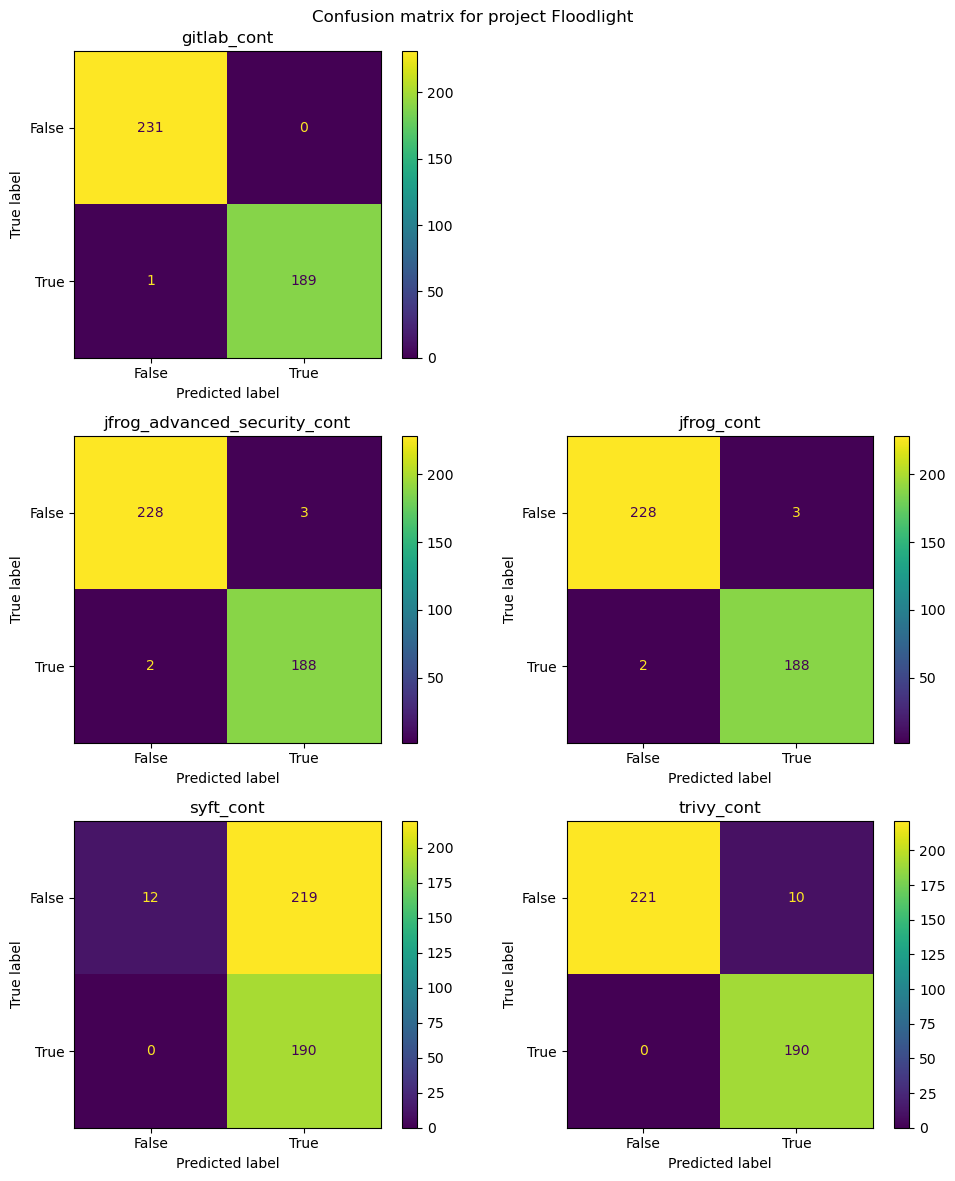

Project: Generator_2


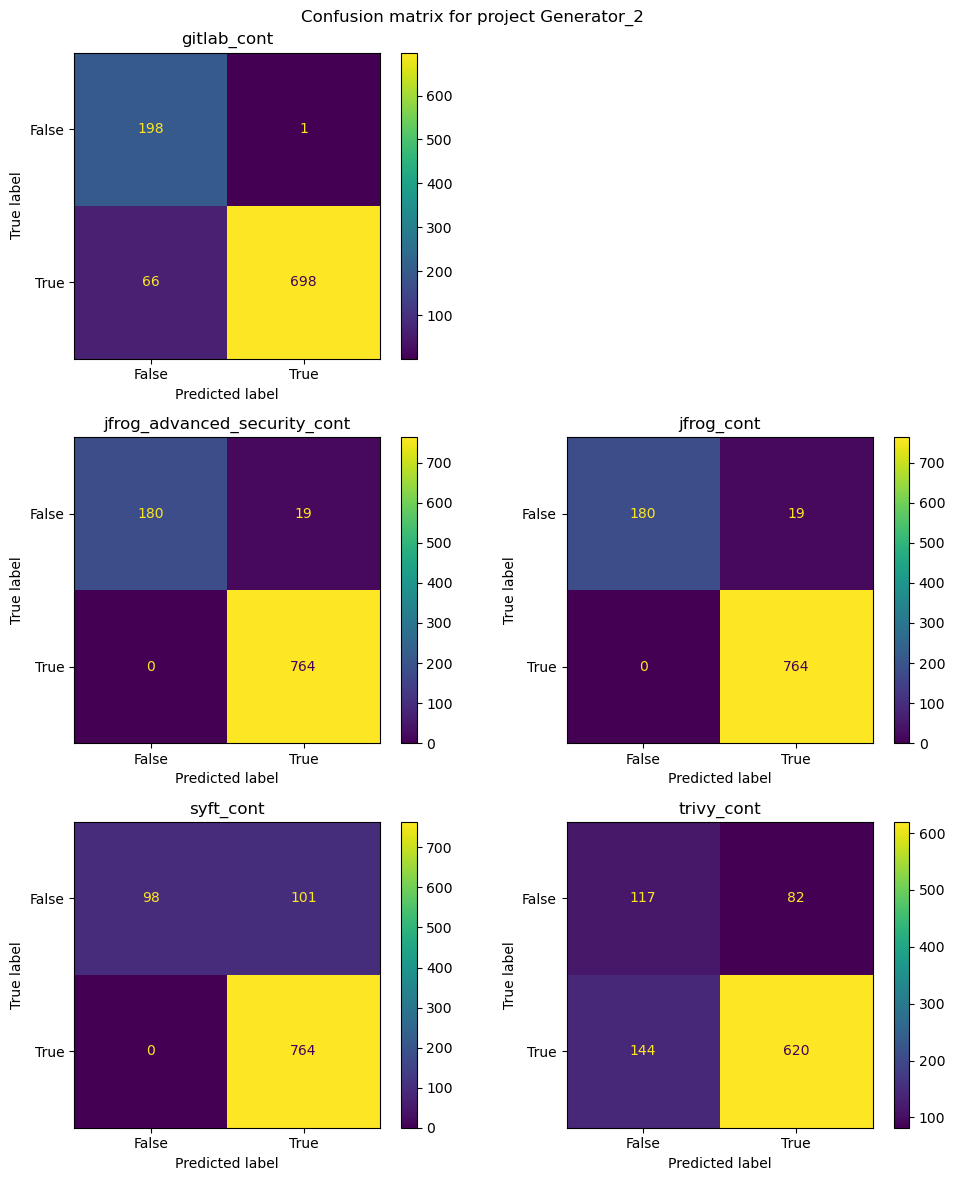

Project: iEdgeMicroService


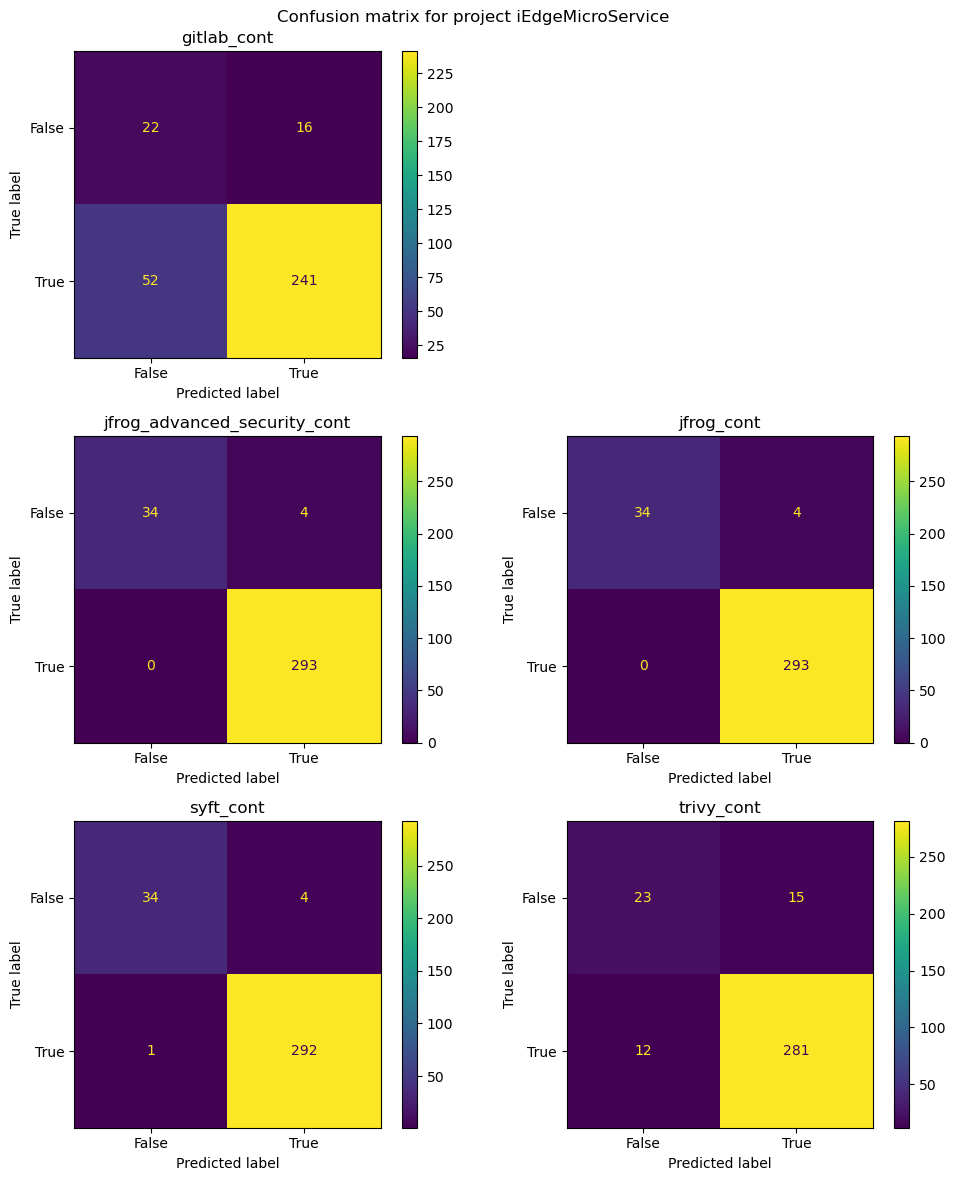

Project: Juice_Shop


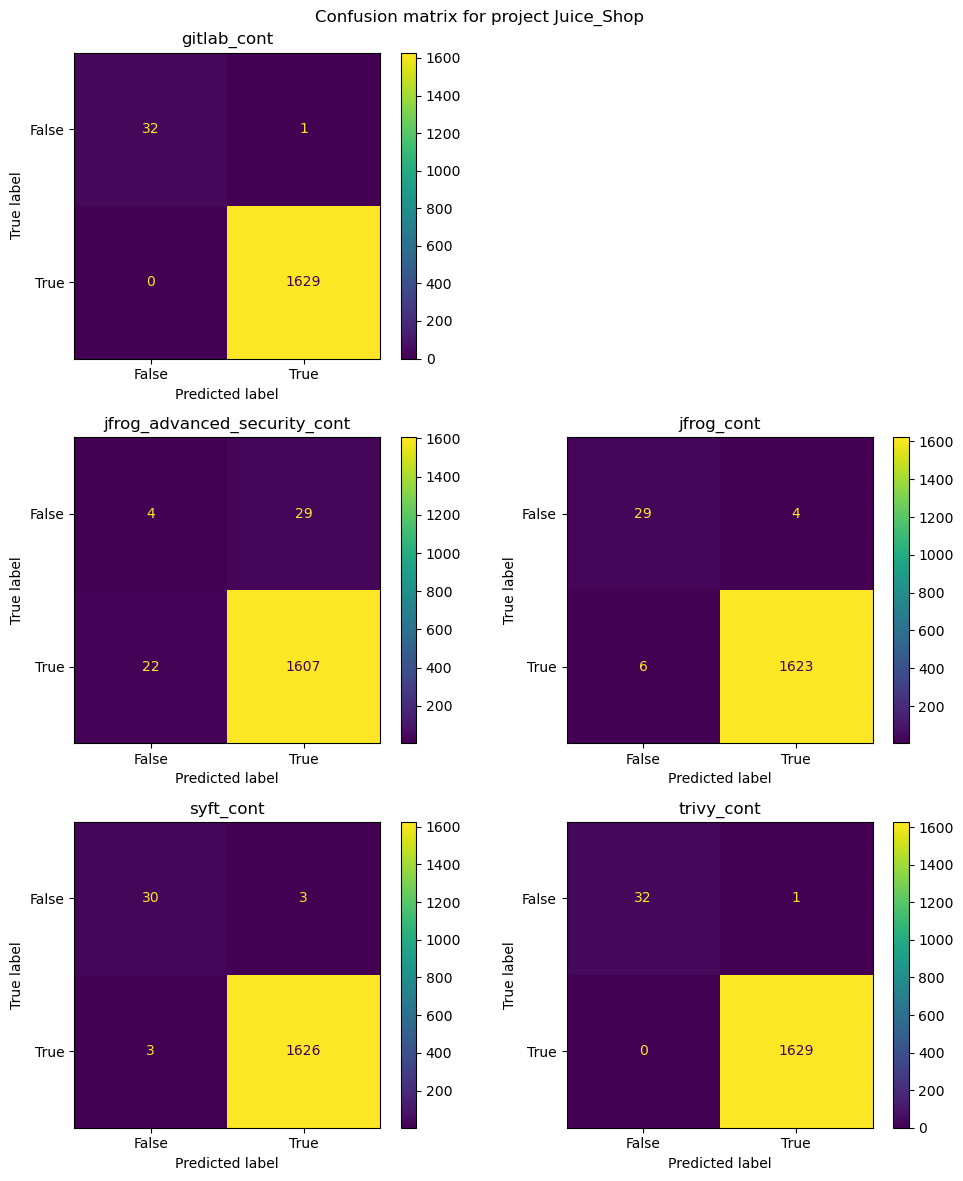

Project: NMP


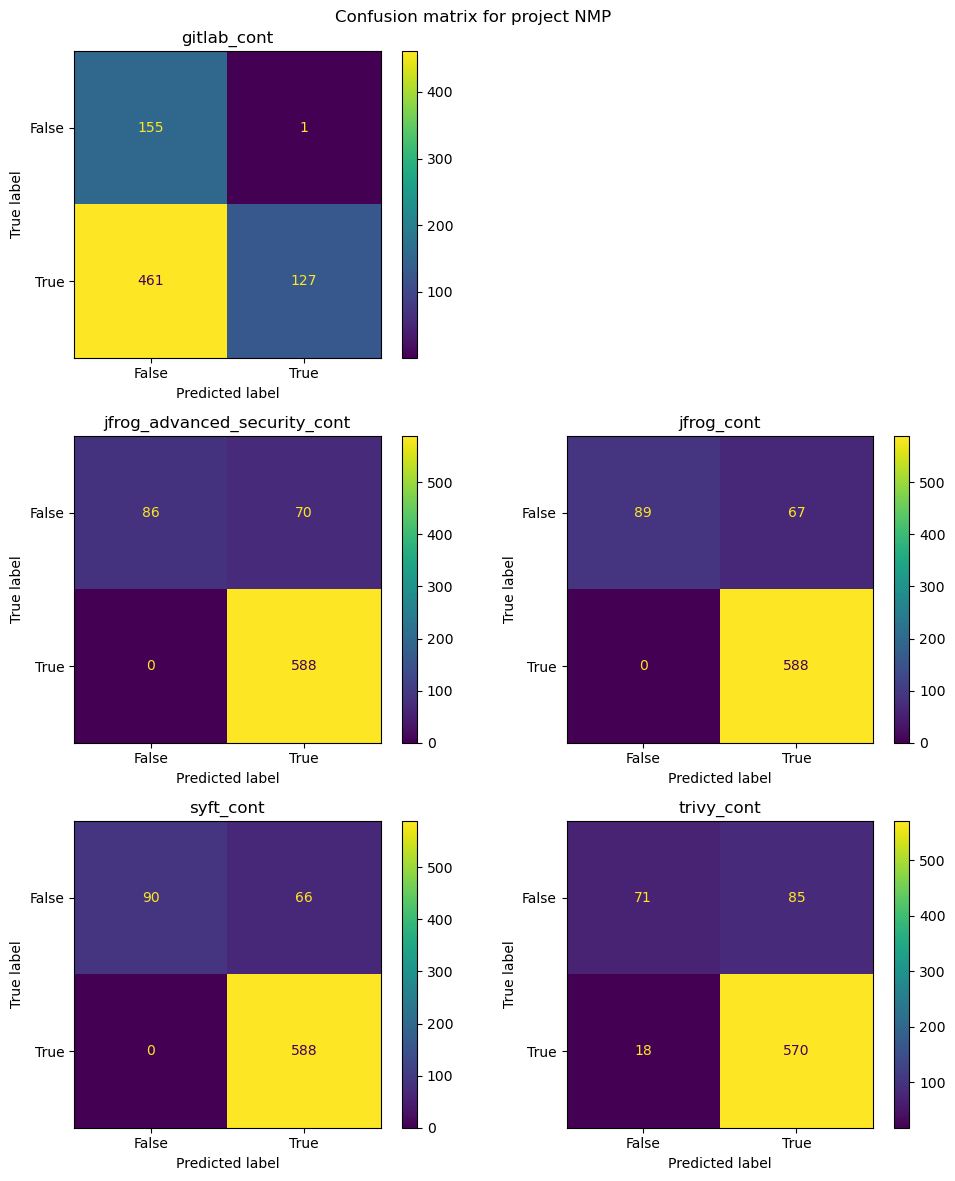

Project: pm-dashboard-frontend


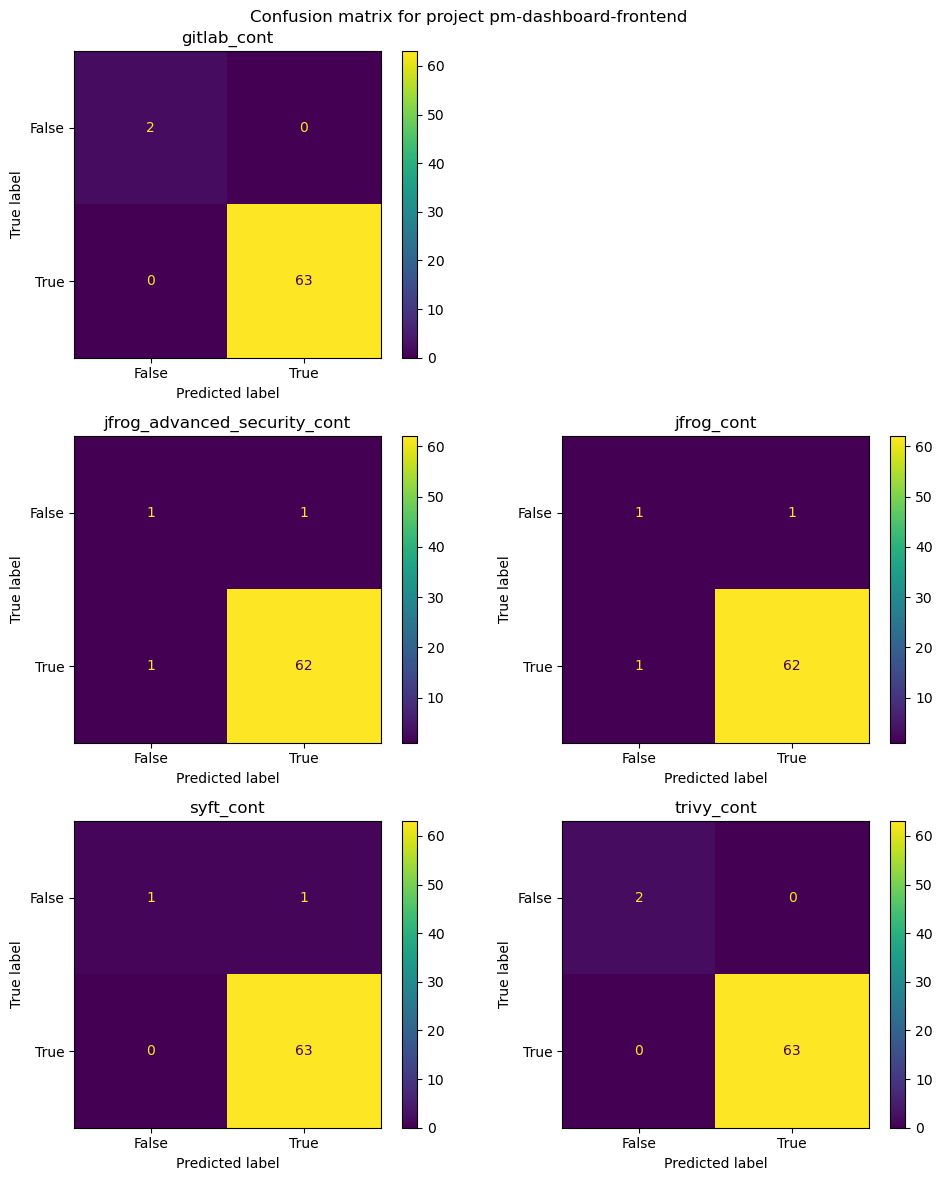

Project: pm-lst-kpi-module


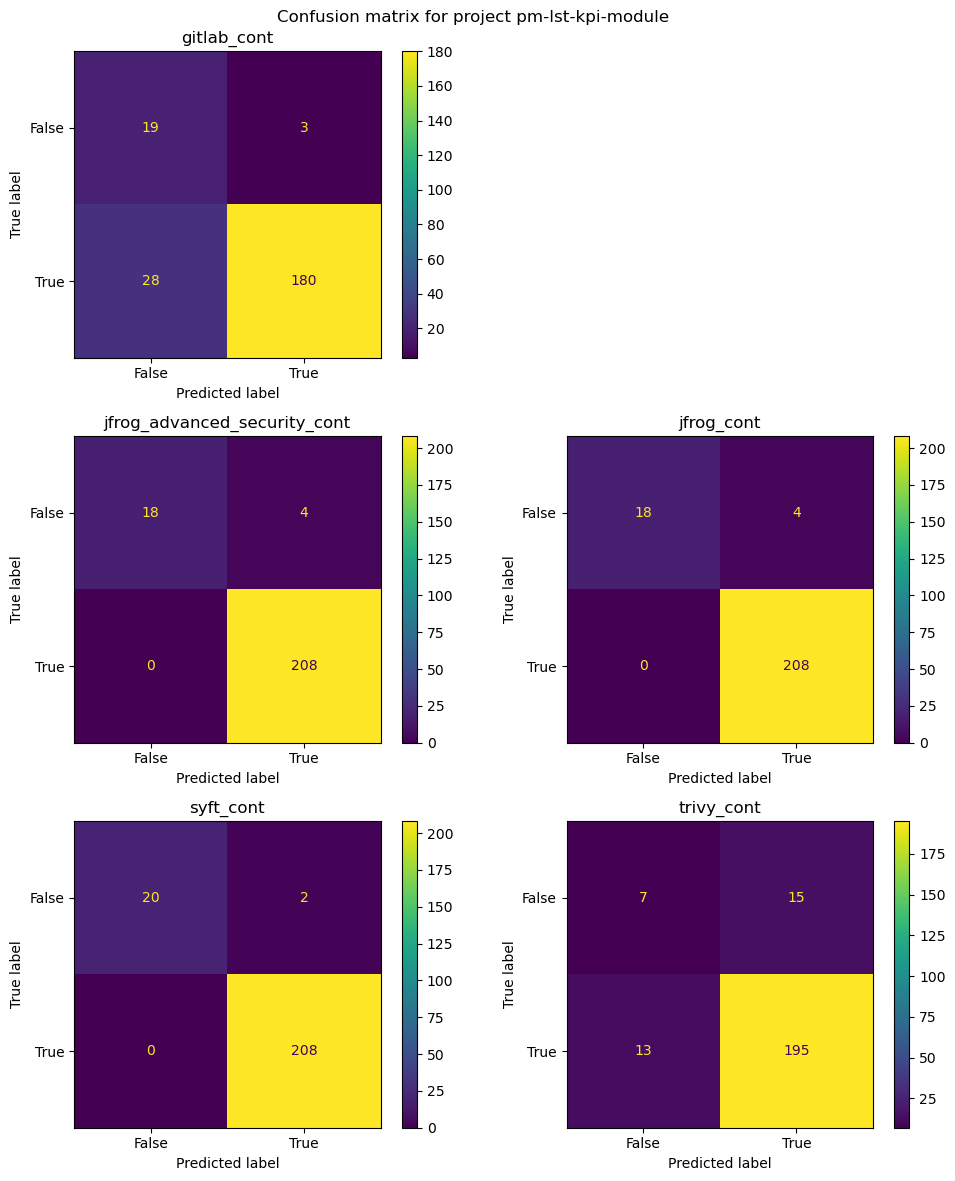

Project: pm-mongo


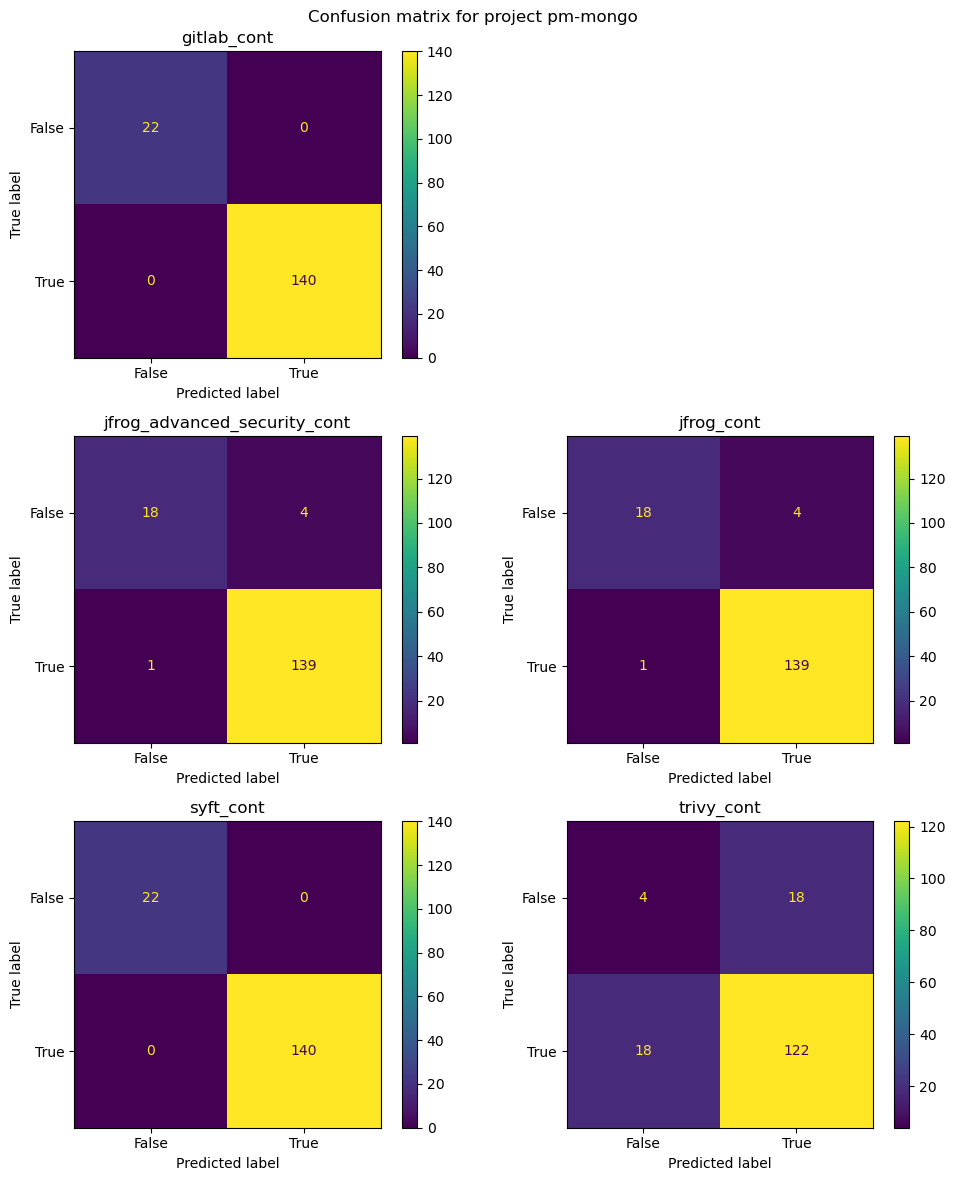

Project: RDCS_RDCP-Client


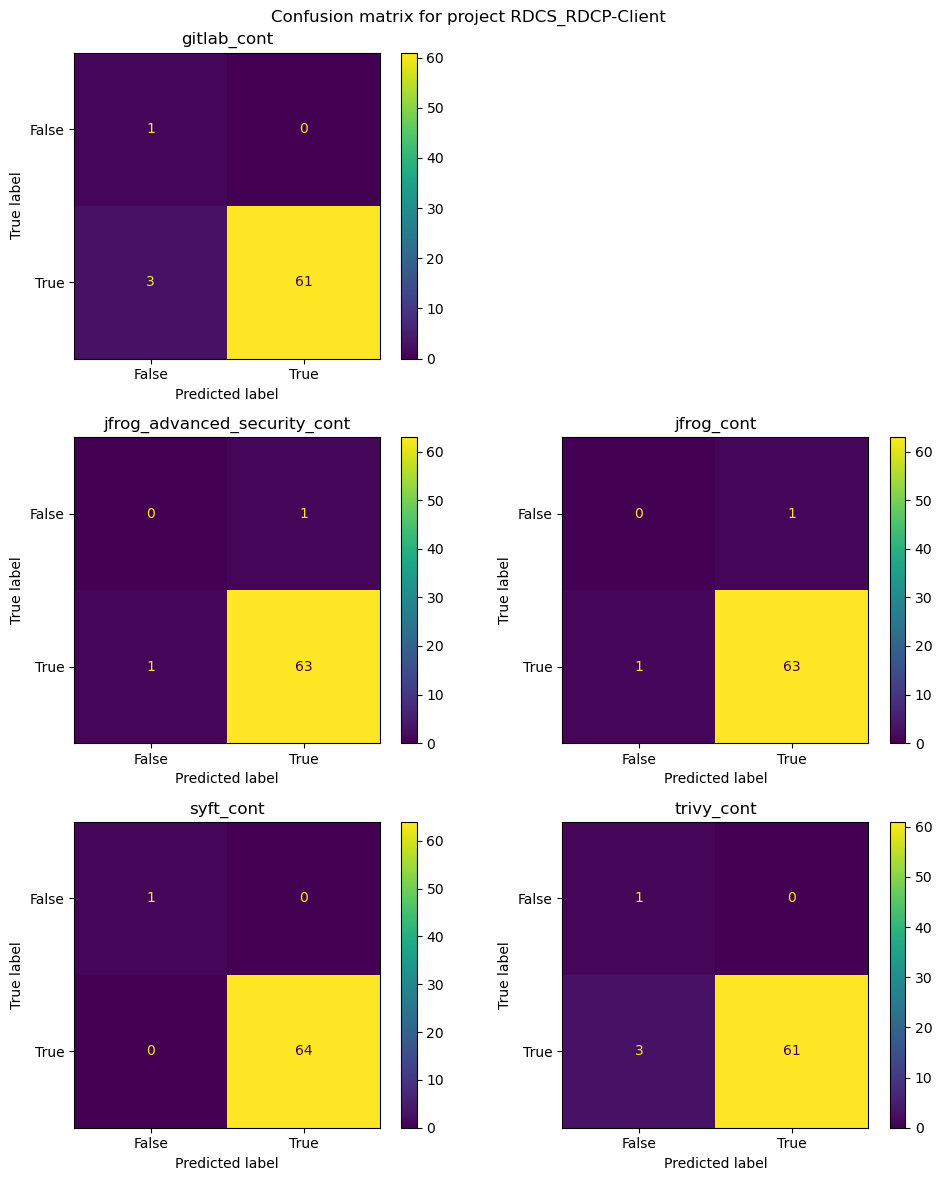

Project: RT-Cosmo


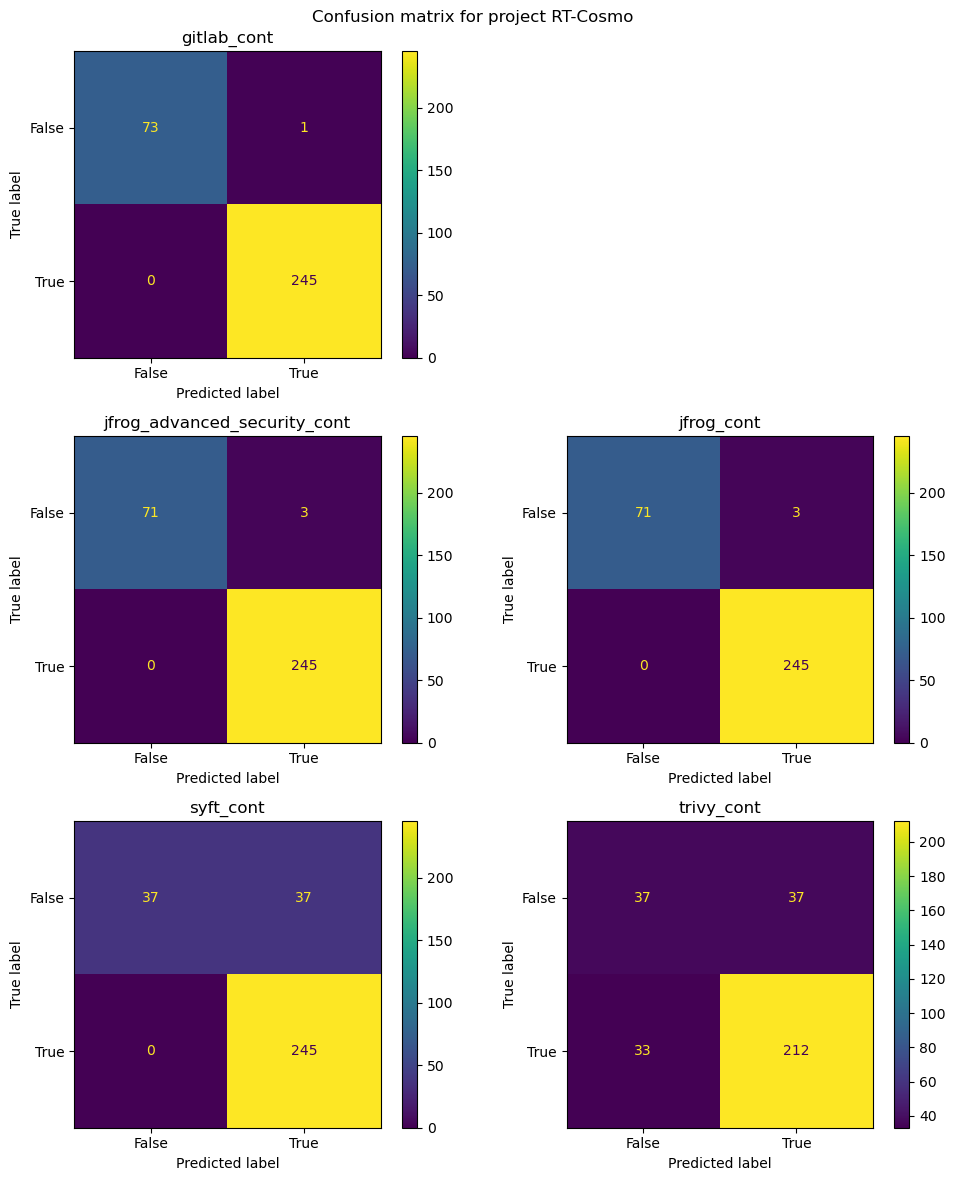

Project: vul_flask_app


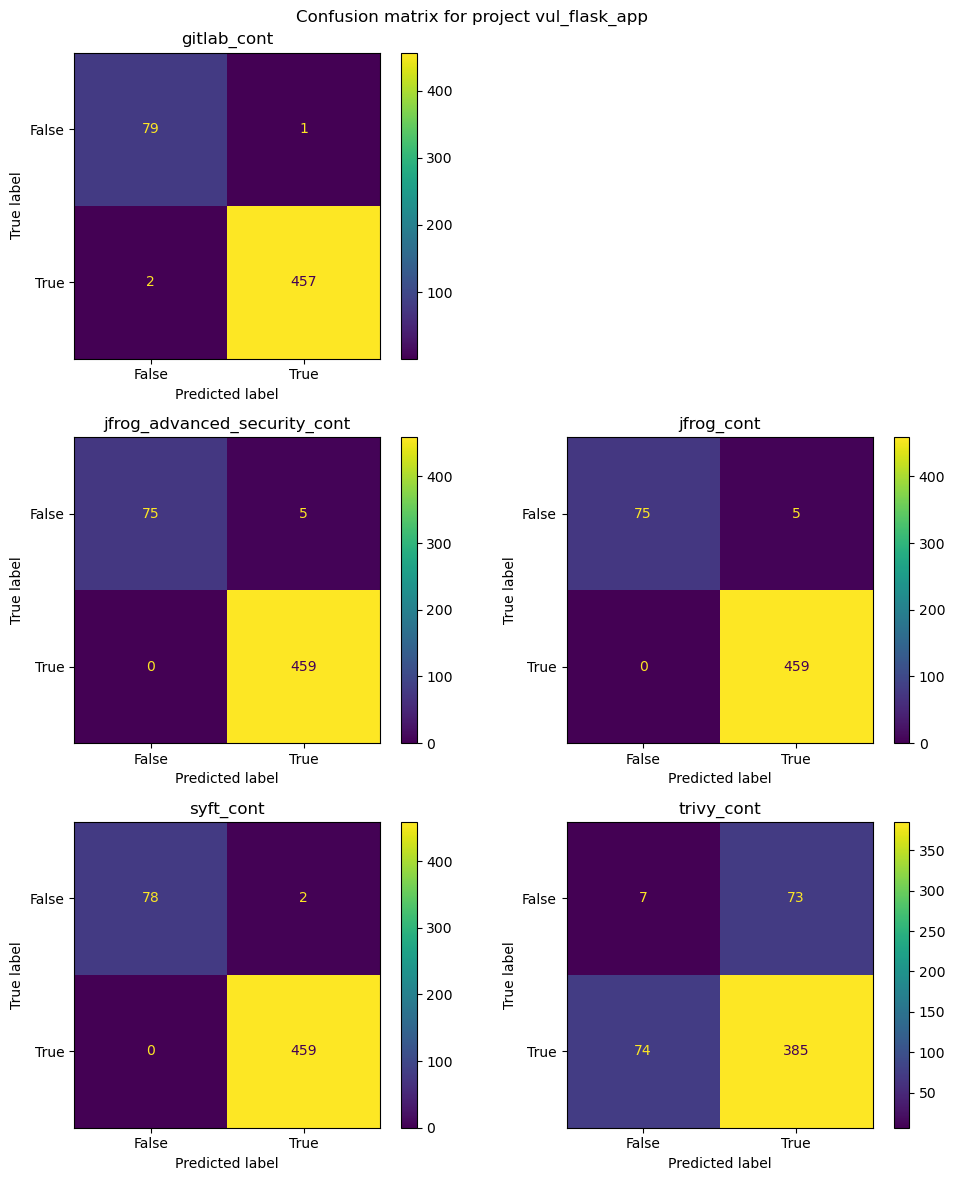

Project: Vulnerable_Flask_App


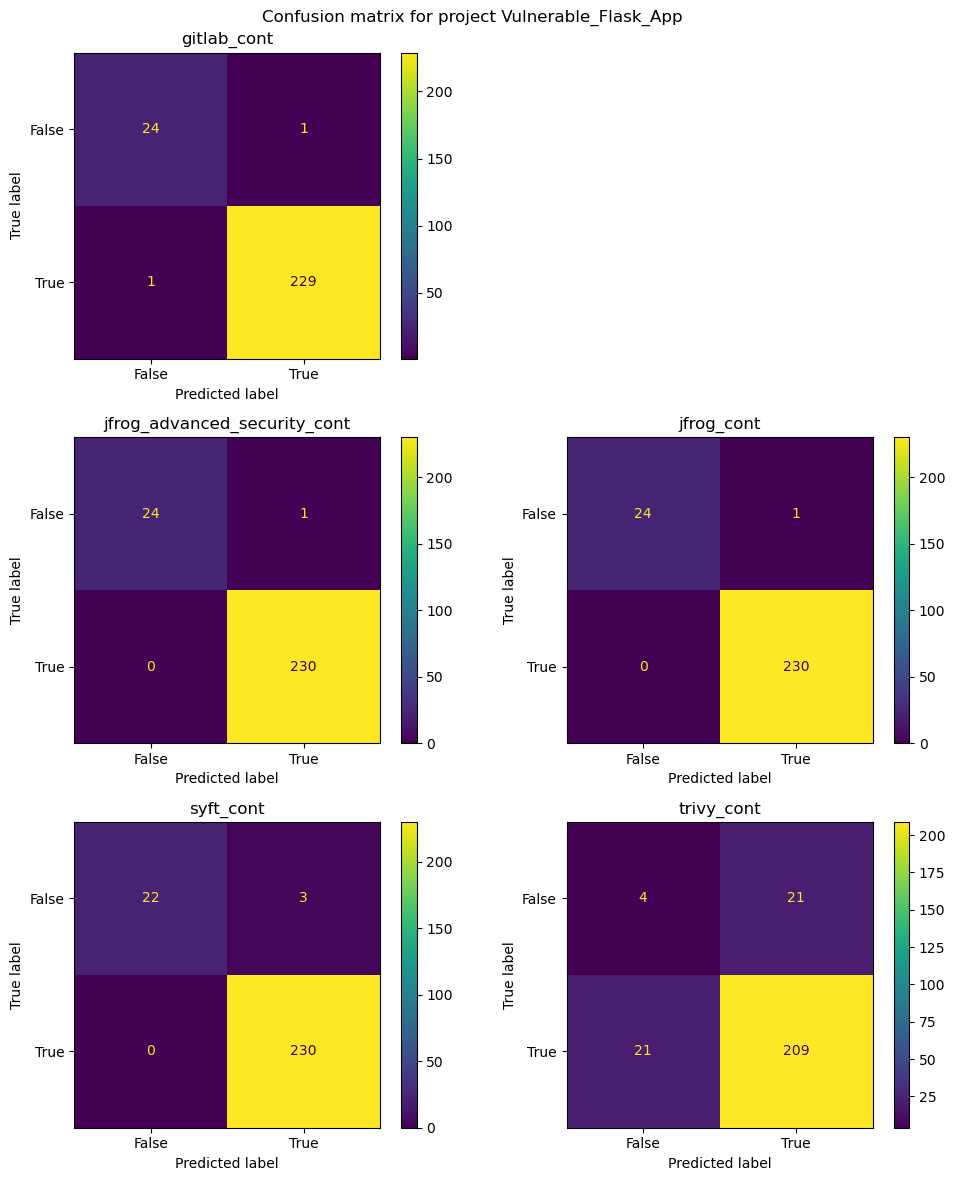

Project: WebGoat


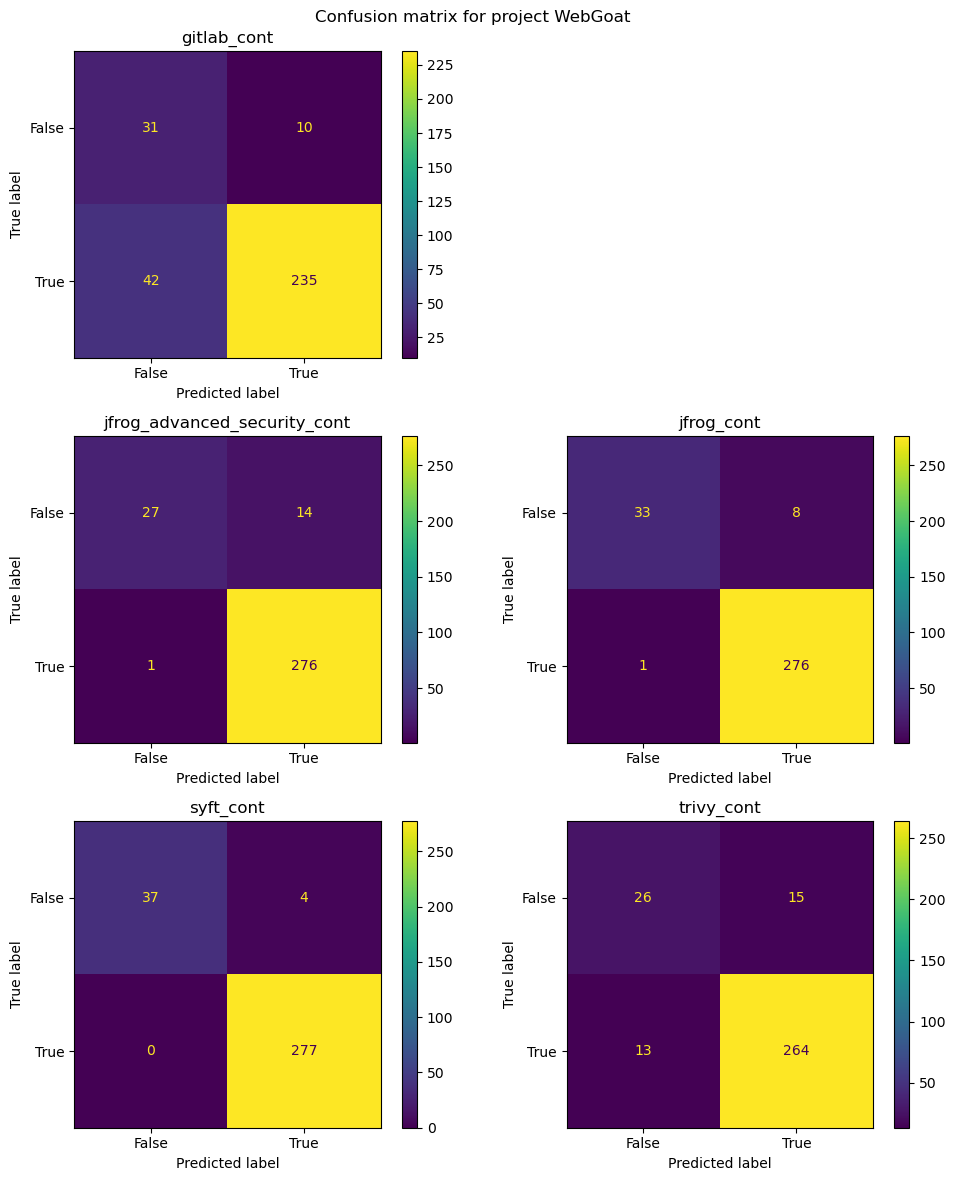

In [53]:
for project_name, project_version in in_scope:
    
    print(f"Project: {project_name}")
    
    # get project data in data frame
    project_scanner_data = dt_instance.collect_all_scanner_data(project_name, project_version)

    target_field = 'name_proc1_version'
    # Create target field information so that the results from the various scanners can be compared
    # The best result was achieved by taking the p_name, appliying proc1 to it and adding the p_version

    def proc1(x):
        return x.split(':')[-1]

    # Apply the function proc1 to column "name" and add the result as column "name_proc1" using .assign()
    project_scanner_data = {df_name: df.assign(name_proc1_version=(df["name"].apply(proc1).astype(str) + ':' + 
                                                                df['version'].fillna('').astype(str)))  
                            for df_name, df in project_scanner_data.items()}

    # Put scanner names and corresponding data frames in list
    scanner_names = list(project_scanner_data.keys())
    data_frames = list(project_scanner_data.values())

    # Merge the data frames to create scanner_data_df
    # these are the aggregated scanner findings with duplicates removed
    scanner_data_df= pd.concat(data_frames).drop_duplicates(subset=[target_field]).reset_index(drop=True)

    # Reduce the number of columns in scanner_data_df
    col_names = ['name', 'version', target_field]
    scanner_data_df = scanner_data_df[col_names]

    # Define the reference scanners for the automatic labeling
    # If 2 of these 3 scanners provide the same value in 'target_field' it is considered a 'TP'
    keys_to_extract = ['gitlab_cont', 'jfrog_advanced_security_cont', 'syft_cont']
    labeling_data_frames = {key: project_scanner_data[key][target_field] for key in keys_to_extract}

    # Create list with the 3 data frames that are the reference 
    labeling_data_frames_list = list(labeling_data_frames.values())

    # Helper function to label data
    # if 2 of 3 data frames have the same value it is labeled as TP
    def label_data(row, data_frames):
        count_sum = sum((df == row[target_field]).any() for df in data_frames)
        return 'TP' if count_sum >= 2 else 'FP'

    # Apply the labeling function to scanner_data_df
    scanner_data_df['labeling'] = scanner_data_df.apply(lambda row: label_data(row, labeling_data_frames_list), axis=1)

    # Add predictions from all scanners (pred_<scanner_name>
    for col, df in zip(scanner_names, data_frames):
        scanner_data_df[f'pred_{col}'] = scanner_data_df.apply(lambda row: 'P' if (df[target_field] == row[target_field]).any() else 'N', axis=1)

    ## Label the predictions A, B and C in label_A, label_B and label_C
    #def eval_labels(row, scanner_names):
    #    for col in scanner_names:
    #        if row[f'pred_{col}'] == 'P' and row['labeling'] == 'TP':
    #            row[f'label_{col}'] = 'TP'
    #        elif row[f'pred_{col}'] == 'P' and row['labeling'] == 'FP':
    #            row[f'label_{col}'] = 'FP'
    #        elif row[f'pred_{col}'] == 'N' and row['labeling'] == 'TP':
    #            row[f'label_{col}'] = 'FN'
    #        elif row[f'pred_{col}'] == 'N' and row['labeling'] == 'FP':
    #            row[f'label_{col}'] = 'TN'
    #    return row

    ## label the predictions of the scanners
    #scanner_data_df = scanner_data_df.apply(eval_labels, axis=1, args=(scanner_names, ))


    # Create visualization
    target_output_file = f"SBOM_confucion_matrix_{project_name}_{target_field}"
    create_SBOM_confusion_matrix(project_name, scanner_names, scanner_data_df, target_output_file)

In [15]:
scanner_data_df

name   version             name_proc1_p_version  \
0                    alpine    3.17.0                          alpine:   
1         alpine-baselayout  3.4.0-r0       alpine-baselayout:3.4.0-r0   
2    alpine-baselayout-data  3.4.0-r0  alpine-baselayout-data:3.4.0-r0   
3               alpine-keys    2.4-r1               alpine-keys:2.4-r1   
4                  alsa-lib  1.2.8-r0                alsa-lib:1.2.8-r0   
..                      ...       ...                              ...   
938            oracle-r2dbc       1.0                 oracle-r2dbc:1.0   
939                r2dbc-h2       1.0                     r2dbc-h2:1.0   
940           r2dbc-mariadb       1.0                r2dbc-mariadb:1.0   
941             r2dbc-mssql       1.0                  r2dbc-mssql:1.0   
942             r2dbc-mysql       1.0                  r2dbc-mysql:1.0   

    labeling pred_gitlab_cont pred_jfrog_advanced_security_cont  \
0         TP                P                                 N   
1         TP                P                                 P   
2         TP                P                                 P   
3         TP                P                                 P   
4         TP                P                                 P   
..       ...              ...                               ...   
938       FP                N                                 N   
939       FP                N                                 N   
940       FP                N                                 N   
941       FP                N                                 N   
942       FP                N                                 N   

    pred_jfrog_cont pred_syft_cont pred_trivy_cont  
0                 N              P               P  
1                 N              P               P  
2                 N              P               P  
3                 N              P               P  
4                 N              P               P  
..              ...            ...             ...  
938               N              N               P  
939               N              N               P  
940               N              N               P  
941               N              N               P  
942               N              N               P  

[943 rows x 9 columns]

In [8]:
scanner_names = list(project_scanner_data.keys())
data_frames = list(project_scanner_data.values())

['gitlab_cont',
 'jfrog_advanced_security_cont',
 'jfrog_cont',
 'syft_cont',
 'trivy_cont']

In [28]:
scanner_data_df[['labeling', 'pred_gitlab_cont', 'label_gitlab_cont']]

labeling pred_gitlab_cont label_gitlab_cont
0         TP                P                TP
1         TP                P                TP
2         TP                P                TP
3         TP                P                TP
4         TP                P                TP
..       ...              ...               ...
938       FP                N                TN
939       FP                N                TN
940       FP                N                TN
941       FP                N                TN
942       FP                N                TN

[943 rows x 3 columns]

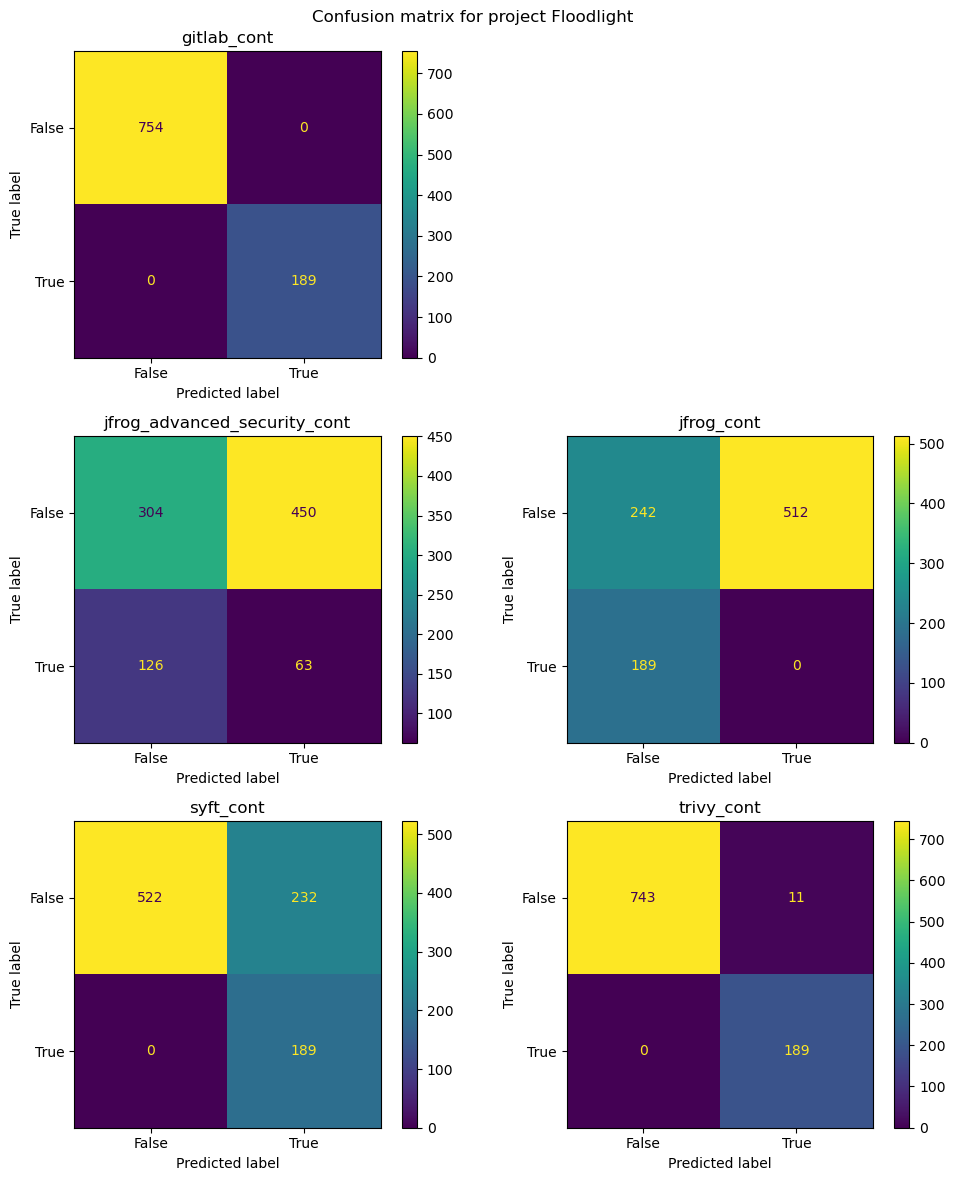

0      1
1      1
2      1
3      1
4      1
      ..
938    0
939    0
940    0
941    0
942    0
Name: labeling, Length: 943, dtype: int64

In [ ]:
scanner_data_df['labeling'].replace({'TP': 1, 'FP': 0}).to_numpy()

In [48]:
scanner_data_df['pred_gitlab_cont'].replace({'P': 1, 'N': 0})

0      1
1      1
2      1
3      1
4      1
      ..
938    0
939    0
940    0
941    0
942    0
Name: pred_gitlab_cont, Length: 943, dtype: int64

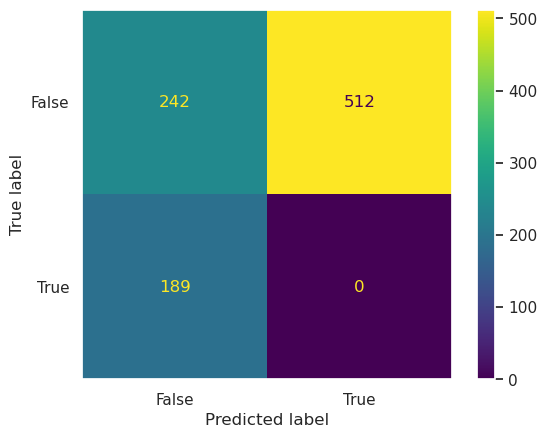

In [59]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = scanner_data_df['labeling'].replace({'TP': 1, 'FP': 0}).to_numpy()
predicted = scanner_data_df['pred_jfrog_cont'].replace({'P': 1, 'N': 0}).to_numpy()

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()

plt.grid(False)
plt.show()

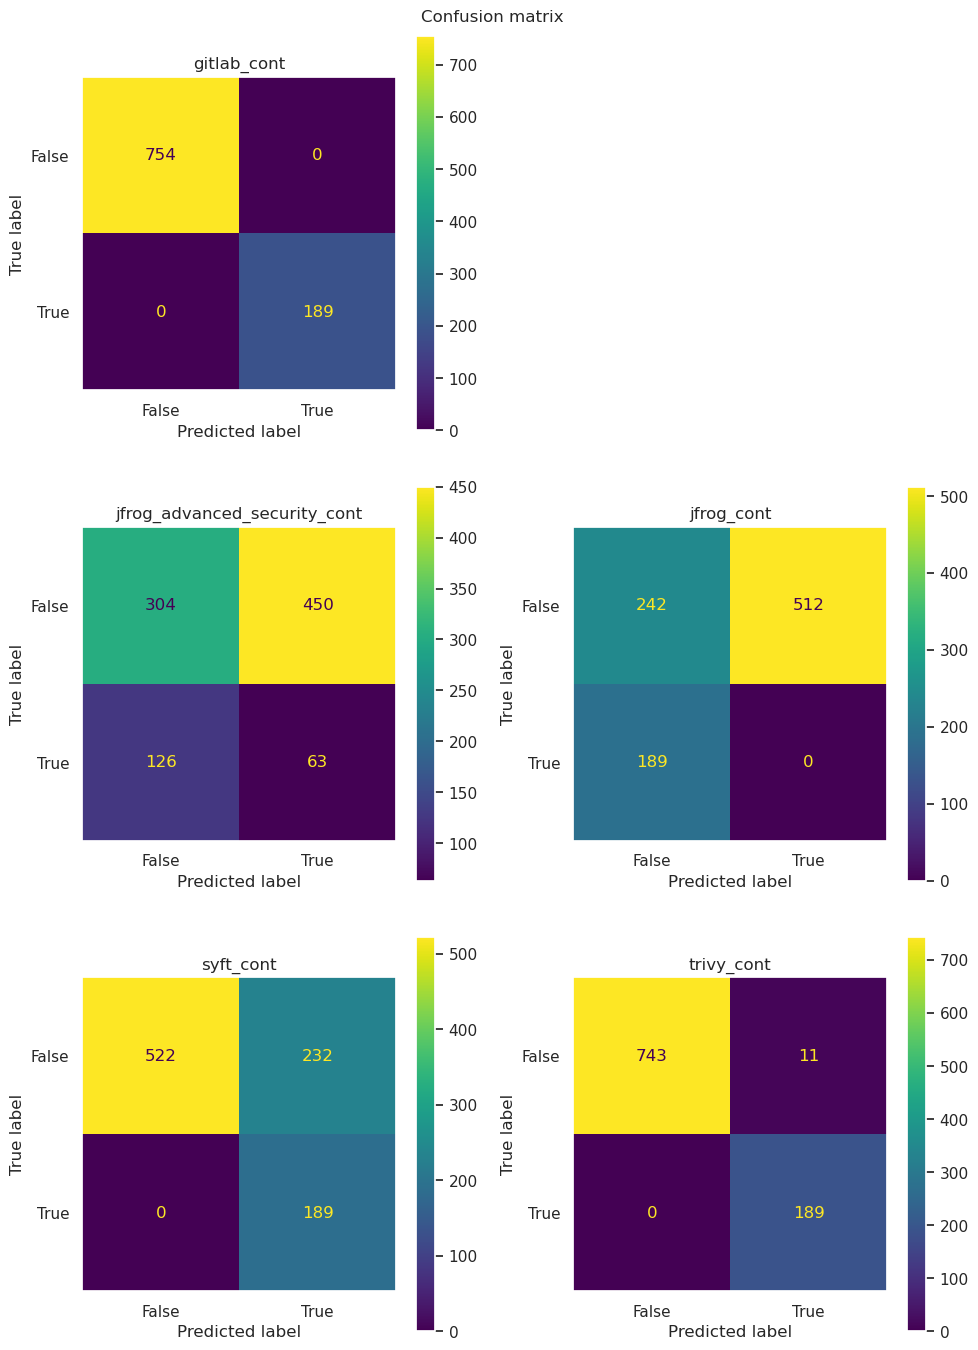

In [76]:
import matplotlib.pyplot as plt


plot_title = "Confusion matrix"


# Create the figure and subplots
fig, axes = plt.subplots(3, 2, figsize=(10, 14))

# Set a title for the entire subplot grid
fig.suptitle(plot_title, fontsize=12)

# Adjust the spacing between the title and subplots
plt.subplots_adjust(top=0.9)

fig_index = [(0, 0), (1, 0), (1, 1), (2,0), (2,1)]

# Iterate over the scanners and populate each subplot
for i, scanner in enumerate(scanner_names):
    # Get the actual and predicted values for the current scanner
    actual = scanner_data_df['labeling'].replace({'TP': 1, 'FP': 0}).to_numpy()
    predicted = scanner_data_df['pred_' + scanner].replace({'P': 1, 'N': 0}).to_numpy()

    # Compute the confusion matrix
    confusion_matrix = metrics.confusion_matrix(actual, predicted)

    # Create a ConfusionMatrixDisplay object
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=[False, True])

    # Plot the confusion matrix on the current subplot
    cm_display.plot(ax=axes[fig_index[i]])
    axes[fig_index[i]].set_title(scanner)

    # Remove the grid from each subplot
    axes[fig_index[i]].grid(False)

# Hide the subplot at position (0, 1)
#axs[0, 1].set_visible(False)
# Hide the subplot at position (0, 1)
axes[0, 1].remove()

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.4, hspace=0.4)
    
# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


In [60]:
scanner_names

['gitlab_cont',
 'jfrog_advanced_security_cont',
 'jfrog_cont',
 'syft_cont',
 'trivy_cont']

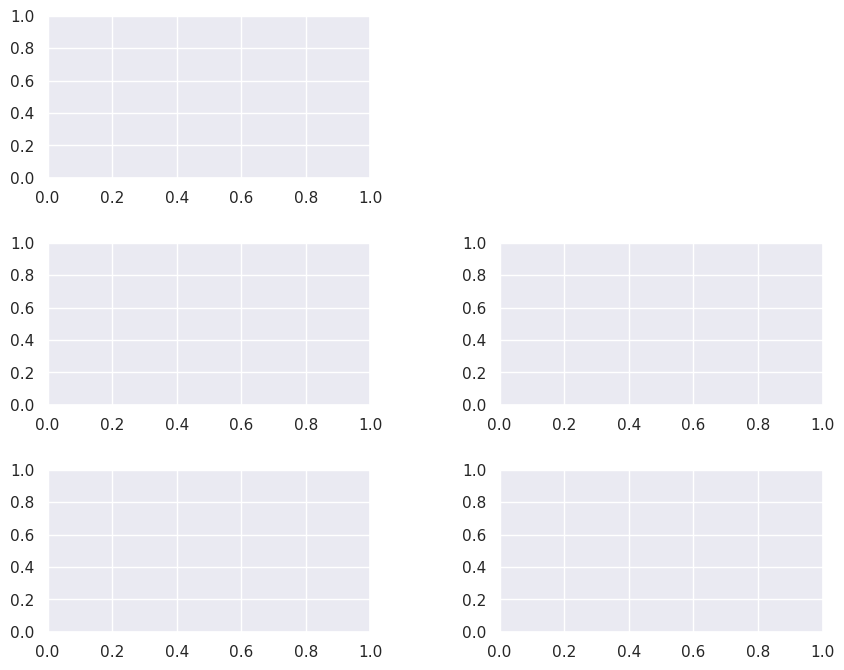

In [70]:
import matplotlib.pyplot as plt

# Create a 3x2 subplot grid
fig, axs = plt.subplots(3, 2, figsize=(10, 8))

# Hide the subplot at position (0, 1)
axs[0, 1].remove()

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.4, hspace=0.4)

# Show the plot
plt.show()


# Workarea

## Analyze names and p_names for 2 projects

In [163]:
# Sample data frames
data_A = {'name': ['A', 'B', 'C'], 'version': [1, 2, 3]}
data_B = {'name': ['A', 'D', 'E'], 'version': [1, 2, 3]}
data_C = {'name': ['A', 'B', 'F'], 'version': [1, 2, 3]}

df_A = pd.DataFrame(data_A)
df_B = pd.DataFrame(data_B)
df_C = pd.DataFrame(data_C)

scanner_names = ['A', 'B', 'C']
data_frames = [df_A, df_B, df_C]

# Merge the data frames to create df_ABC
df_aggregated = pd.concat(data_frames).drop_duplicates().reset_index(drop=True)

# Helper function to label data
def label_data(row, data_frames):
    count_sum = sum(((df['name'] == row['name']) & (df['version'] == row['version'])).any() for df in data_frames)
    return 'TP' if count_sum >= 2 else 'FP'
# Apply the labeling function to df_ABC
df_aggregated['labeling'] = df_aggregated.apply(lambda row: label_data(row, data_frames), axis=1)

# Add predictions 'pred_A', 'pred_B', and 'pred_C' to df_ABC
for col, df in zip(scanner_names, data_frames):
    df_aggregated[f'pred_{col}'] = df_aggregated.apply(lambda row: 'P' if ((df['name'] == row['name']) & (df['version'] == row['version'])).any() else 'N', axis=1)

# Label the predictions A, B and C in label_A, label_B and label_C
def eval_labels(row, scanner_names):
    for col in scanner_names:
        if row[f'pred_{col}'] == 'P' and row['labeling'] == 'TP':
            row[f'label_{col}'] = 'TP'
        elif row[f'pred_{col}'] == 'P' and row['labeling'] == 'FP':
            row[f'label_{col}'] = 'FP'
        elif row[f'pred_{col}'] == 'N' and row['labeling'] == 'TP':
            row[f'label_{col}'] = 'FN'
        elif row[f'pred_{col}'] == 'N' and row['labeling'] == 'FP':
            row[f'label_{col}'] = 'TN'
    return row

# label the predictions of the scanners
df_aggregated = df_aggregated.apply(eval_labels, axis=1, args=(scanner_names, ))

## Improved version

In [187]:
# Sample data frames
data_A = {'name': ['A', 'B', 'C'], 'version': [1, 2, 3]}
data_B = {'name': ['A', 'D', 'E'], 'version': [1, 2, 3]}
data_C = {'name': ['A', 'B', 'F'], 'version': [1, 2, 3]}

df_A = pd.DataFrame(data_A)
df_B = pd.DataFrame(data_B)
df_C = pd.DataFrame(data_C)

scanner_names = ['A', 'B', 'C']
data_frames = [df_A, df_B, df_C]

# Merge the data frames to create df_ABC
df_aggregated = pd.concat(data_frames).drop_duplicates().reset_index(drop=True)

# Helper function to label data
def label_data(row, data_frames):
    count_sum = sum(((df['name'] == row['name']) & (df['version'] == row['version'])).any() for df in data_frames)
    return 'TP' if count_sum >= 2 else 'FP'
# Apply the labeling function to df_ABC
df_aggregated['labeling'] = df_aggregated.apply(lambda row: label_data(row, data_frames), axis=1)

# Add predictions 'pred_A', 'pred_B', and 'pred_C' to df_ABC
for col, df in zip(scanner_names, data_frames):
    df_aggregated[f'pred_{col}'] = df_aggregated.apply(lambda row: 'P' if ((df['name'] == row['name']) & (df['version'] == row['version'])).any() else 'N', axis=1)

# Label the predictions A, B and C in label_A, label_B and label_C
def eval_labels(row, scanner_names):
    for col in scanner_names:
        if row[f'pred_{col}'] == 'P' and row['labeling'] == 'TP':
            row[f'label_{col}'] = 'TP'
        elif row[f'pred_{col}'] == 'P' and row['labeling'] == 'FP':
            row[f'label_{col}'] = 'FP'
        elif row[f'pred_{col}'] == 'N' and row['labeling'] == 'TP':
            row[f'label_{col}'] = 'FN'
        elif row[f'pred_{col}'] == 'N' and row['labeling'] == 'FP':
            row[f'label_{col}'] = 'TN'
    return row

# label the predictions of the scanners
df_aggregated = df_aggregated.apply(eval_labels, axis=1, args=(scanner_names, ))

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data (replace with your actual data)
projects = ['Project 1', 'Project 2', 'Project 3']
scanners = ['Scanner A', 'Scanner B', 'Scanner C', 'Scanner D', 'Scanner E']

# Replace these labels with your actual data
data = np.array([
    ['TP', 'FP', 'TN', 'FN', 'TP'],
    ['FN', 'TN', 'FP', 'TP', 'TN'],
    ['TN', 'TP', 'FN', 'FP', 'FN']
])




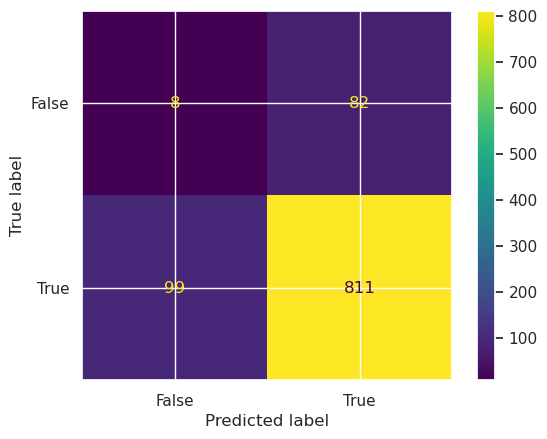

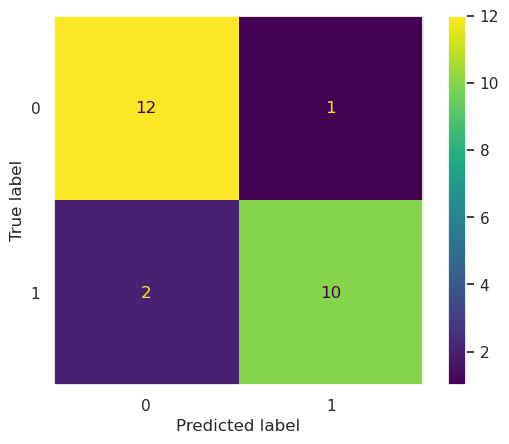

In [57]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

X, y = make_classification(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
clf = SVC(random_state=0)
clf.fit(X_train, y_train)
SVC(random_state=0)
y_pred = clf.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)



plt.grid(False)
plt.show()